In [1]:
import os, time, math
import math
from math import sqrt
from ann_visualizer.visualize import ann_viz
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.models import Model
#from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
from tune_sklearn import TuneGridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
reg_decision_model=DecisionTreeRegressor()
from sklearn.model_selection import StratifiedKFold
from hyperopt import tpe,hp,Trials
import xgboost as xgb
from hyperopt.fmin import fmin

In [2]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [23]:
data=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Buffer Paper/R_exported_buffer_paper_2019_Six_cities_data.csv")
data.head()

,Unnamed: 0,site_id,site_name,type,year,region,travel_pattern,AADBT,stv_adb,stv_c_adb,...,Bike.Share.best_tm,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi,rowIndex
0,1,P001BEN,Colorado Ave.,permanent,2019,Bend,2.0,46.209524,6.561644,2.616438,...,3056.0,1.248328,7.709046,10.644986,28.863905,35.305839,108.195110,0.512552,0.113341,1
1,2,P002BEN,Franklin Ave. Both Sides,permanent,2019,Bend,2.0,220.426625,6.958904,3.068493,...,3056.0,0.000000,0.000000,3.995612,49.828057,65.959899,230.465979,0.282730,0.426931,2
2,3,P003BEN,Galveston Ave. Both Sides,permanent,2019,Bend,3.0,127.953968,13.726027,4.369863,...,3056.0,1.191490,6.758242,27.855287,31.094049,41.330493,98.318063,0.499890,0.010863,3
3,4,P004BEN,Newport Ave. Both Sides,permanent,2019,Bend,1.0,109.378321,7.027397,2.178082,...,3056.0,0.722608,8.910716,26.495791,28.563976,54.080251,118.796144,0.344087,0.010368,4
4,5,P005BEN,Portland Ave. Both Sides,permanent,2019,Bend,2.0,61.295238,5.260274,1.698630,...,3056.0,5.137481,7.813417,12.608750,31.528644,55.880389,182.273542,0.559726,0.005038,5


In [30]:
pct=data.groupby(['region'])['travel_pattern'].value_counts(normalize=True)
pct

region     travel_pattern
Bend       2.0               0.619048
           3.0               0.301587
           1.0               0.079365
Boulder    2.0               0.727273
           3.0               0.181818
           1.0               0.090909
Charlotte  3.0               0.642857
           1.0               0.214286
           2.0               0.142857
Dallas     3.0               0.967742
           2.0               0.032258
Eugene     2.0               0.558442
           1.0               0.259740
           3.0               0.181818
Portland   1.0               0.534091
           2.0               0.306818
           3.0               0.159091
Name: travel_pattern, dtype: float64

In [35]:
pct1=data['travel_pattern'].value_counts(normalize=True)
pct1

2.0    0.422535
3.0    0.309859
1.0    0.267606
Name: travel_pattern, dtype: float64

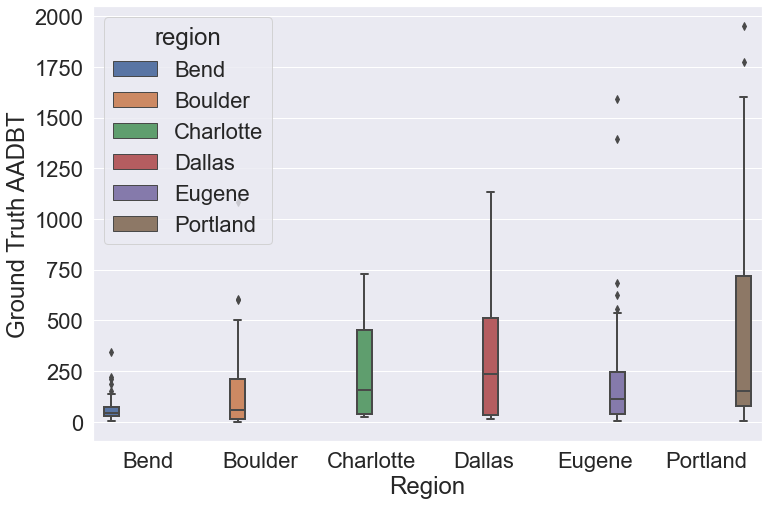

In [10]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(12, 8))
g = sns.boxplot(x="region", y="AADBT",hue="region",data=data, linewidth=2.0)
g1=g.set( xlabel = "Region", ylabel = "Ground Truth AADBT")
plt.show()

0.6913485785215692


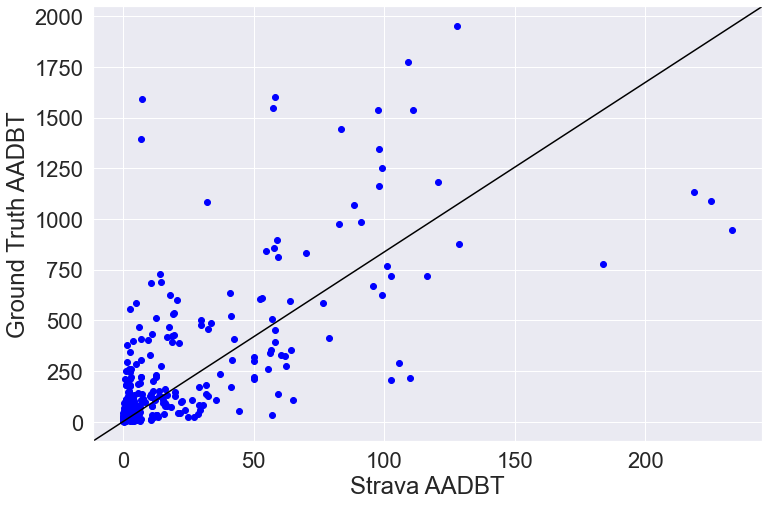

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
print(data['stv_adb'].corr(data['AADBT']))
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['stv_adb'], data['AADBT'], c='blue')
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('Strava AADBT')
plt.ylabel('Ground Truth AADBT')
plt.show()

0.4588096367041709


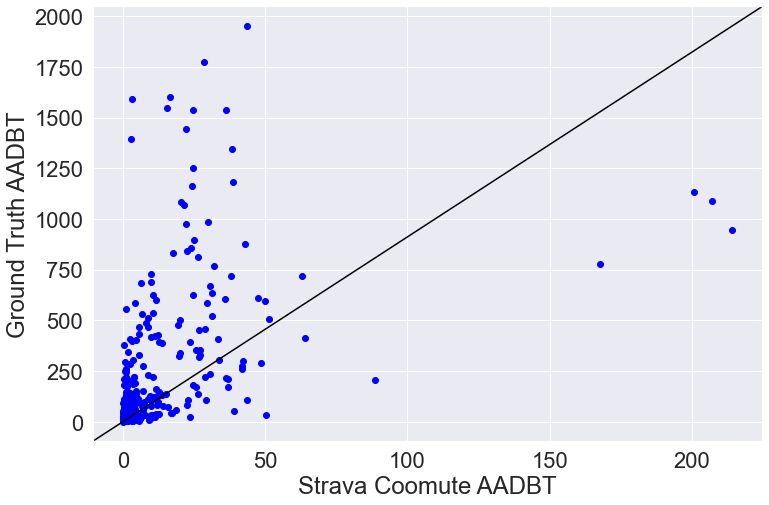

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
print(data['stv_nc_adb'].corr(data['AADBT']))
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['stv_nc_adb'], data['AADBT'], c='blue')
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('Strava Coomute AADBT')
plt.ylabel('Ground Truth AADBT')
plt.show()

0.4588096367041709


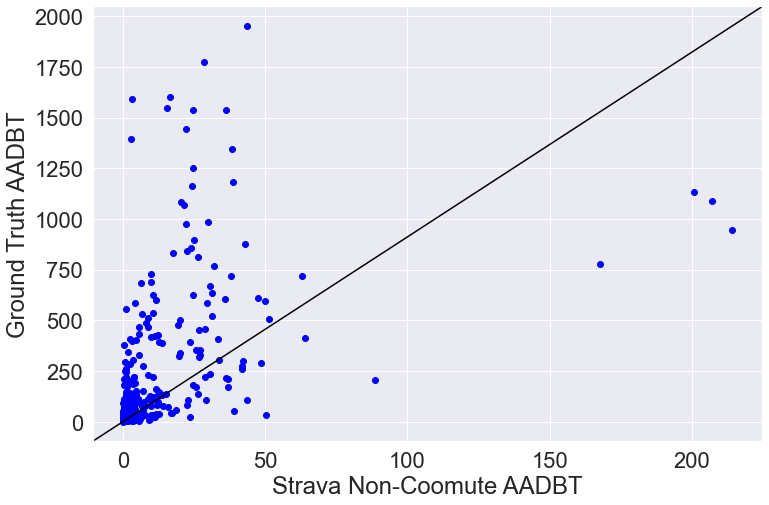

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
print(data['stv_nc_adb'].corr(data['AADBT']))
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['stv_nc_adb'], data['AADBT'], c='blue')
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('Strava Non-Coomute AADBT')
plt.ylabel('Ground Truth AADBT')
plt.show()

0.5633528102192339


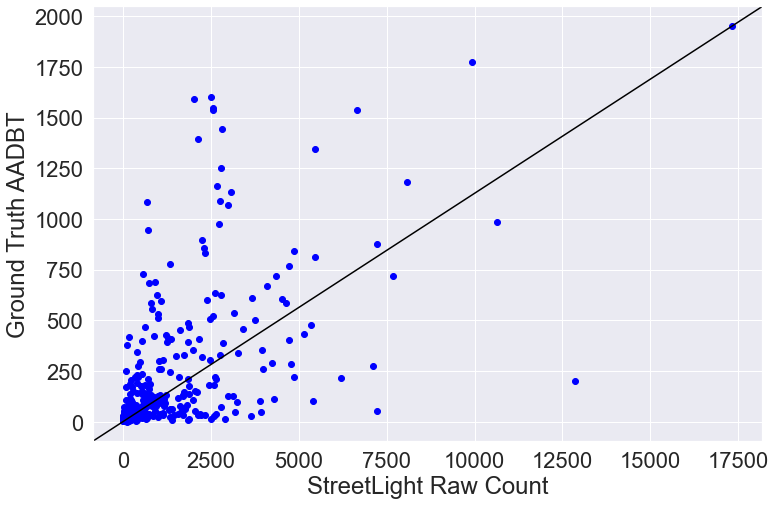

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
print(data['stl_raw'].corr(data['AADBT']))
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['stl_raw'], data['AADBT'], c='blue')
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('StreetLight Raw Count')
plt.ylabel('Ground Truth AADBT')
plt.show()

In [5]:
track=data[['site_id','site_name','region', 'AADBT']]
track['index']=track.index
track.head()

C:\Users\mxm5116\AppData\Local\Temp/ipykernel_3584/2363949684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['index']=track.index


,site_id,site_name,region,AADBT,index
0,P001BEN,Colorado Ave.,Bend,46.209524,0
1,P002BEN,Franklin Ave. Both Sides,Bend,220.426625,1
2,P003BEN,Galveston Ave. Both Sides,Bend,127.953968,2
3,P004BEN,Newport Ave. Both Sides,Bend,109.378321,3
4,P005BEN,Portland Ave. Both Sides,Bend,61.295238,4


In [6]:
# Clean the data
an_data=data._get_numeric_data()
nan_values = an_data. isna()
nan_columns = nan_values. any()
columns_with_nan = an_data. columns[nan_columns]. tolist()
print(columns_with_nan)

['travel_pattern', 'Bike.Share.Origin_otm', 'Bike.Share.Destination_otm', 'Bike.Share.Crossing_otm', 'Bike.Share.route_otm', 'Bike.Share.Origin_qm', 'Bike.Share.Destination_qm', 'Bike.Share.Crossing_qm', 'Bike.Share.route_qm', 'Bike.Share.Origin_hm', 'Bike.Share.Destination_hm', 'Bike.Share.Crossing_hm', 'Bike.Share.route_hm', 'Bike.Share.Origin_tfm', 'Bike.Share.Destination_tfm', 'Bike.Share.Crossing_tfm', 'Bike.Share.route_tfm', 'Bike.Share.Origin_om', 'Bike.Share.Destination_om', 'Bike.Share.Crossing_om', 'Bike.Share.route_om', 'Bike.Share.Origin_ohm', 'Bike.Share.Destination_ohm', 'Bike.Share.Crossing_ohm', 'Bike.Share.route_ohm', 'Bike.Share.Origin_tm', 'Bike.Share.Destination_tm', 'Bike.Share.Crossing_tm', 'Bike.Share.route_tm', 'Bike.Share.Origin_otm_net', 'Bike.Share.Destination_otm_net', 'Bike.Share.Crossing_otm_net', 'Bike.Share.route_otm_net', 'Bike.Share.Origin_qm_net', 'Bike.Share.Destination_qm_net', 'Bike.Share.Crossing_qm_net', 'Bike.Share.route_qm_net', 'Bike.Share.Ori

In [7]:
rf_data=an_data.drop(an_data. columns[nan_columns]. tolist(),axis=1)
rf_data=rf_data.drop(['Unnamed: 0','year','latitude','longitude','rowIndex'],axis=1)
rf_data.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,log_stl_raw,log_stv_stl,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,0,...,8.067776,10.090865,1.248328,7.709046,10.644986,28.863905,35.305839,108.195110,0.512552,0.113341
1,220.426625,6.958904,3.068493,2617,0,1,0,0,0,0,...,7.870166,9.944457,0.000000,0.000000,3.995612,49.828057,65.959899,230.465979,0.282730,0.426931
2,127.953968,13.726027,4.369863,3128,0,1,0,0,0,0,...,8.048469,10.738085,1.191490,6.758242,27.855287,31.094049,41.330493,98.318063,0.499890,0.010863
3,109.378321,7.027397,2.178082,1998,0,1,0,0,0,0,...,7.600402,9.683263,0.722608,8.910716,26.495791,28.563976,54.080251,118.796144,0.344087,0.010368
4,61.295238,5.260274,1.698630,1387,0,0,1,0,0,0,...,7.235619,9.069843,5.137481,7.813417,12.608750,31.528644,55.880389,182.273542,0.559726,0.005038


In [9]:
corrMatrix = rf_data.corr()
pd.DataFrame.to_csv(corrMatrix,'E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Buffer Paper/corrMatrix_AN_all.csv')

In [ ]:
# rf_data1=rf_data[['AADBT','stv_c_adb','stl_raw','log_stv_stl','primary_binary','secondary_binary','tertiary_binary','residential_binary','path_binary',
# 'cycleway_binary','footway_binary','cycleway_lane_binary','Distance.to.Commercial.Area','Distance.to.Industrial.Area','Distance.to.Residential.Center',
# 'Distance.to.Retail.Center','Distance.to.Grass.Center','Distance.to.Park.Center','Distance.to.Water.Body','Distance.to.Forest.Center'
# ,'min_dist_to_school','Point.Speed','Bike.Commuter_tm','Intersection_Density_tm',
# 'Industrial.Area_qm_net','Residential_Road_otm_net','Grass.Area_hm_net','Park.Area_ohm','Water.Area_qm','Bicycle.Parking_tm_net','Bus.Stops_tm',
# 'School_tm','college_tm_net','University_tm','OSM_node_Density_tm','Primary_ohm','Secondary_tm','Tertiary_tm','Path_hm_net','Footway_tm',
# 'Student.Access_tm','pct_at_least_college_education_tm_net','Median_HH_income_otm','population_density_tm','employment_density_tm',
# 'Temp_avg_otm','Hum_avg_otm','Precipitation_otm','Number.of.jobs_tm_net','cycleway_lane_all_om','cycleway_track_all_tm','slope_ohm',
# 'pct_white_om','maxspeed_ohm_net','pct_male_ohm','sep_bikeway_otm_net','BikeFac_binary','BikeFac_ohm_net','BikeFac_onstreet_om',
# 'Distance_to_CBD_mi']]
#'Distance.to.CBD','Distance_to_Water_Body_mi'

# All buffer Sizes

In [1202]:
rf_data1=rf_data[['AADBT','stv_c_adb',
'stl_raw',
'log_stv_stl',
'tertiary_binary',
'path_binary',
'Distance.to.Forest.Center',
'min_dist_to_college',
'min_dist_to_university',
'Bike.Commuter_tm',
'Intersection_Density_tm',
'Industrial.Area_qm_net',
'Residential_Road_otm_net',
'Park.Area_ohm',
'Bicycle.Parking_tm_net',
'Bus.Stops_tm',
'School_tm',
'college_tm_net',            
'University_tm',
'OSM_node_Density_tm',
'Primary_ohm',
'Tertiary_tm',
'Path_hm_net',
'Footway_tm',
'Student.Access_tm',
'pct_at_least_college_education_tm_net',
'population_density_tm',
'employment_density_tm',
'Number.of.jobs_tm_net',
'cycleway_track_all_tm',
'sep_bikeway_otm_net',
'Distance_to_CBD_mi'
]]

In [1203]:
data_all=rf_data1.drop(['population_density_tm','Intersection_Density_tm','Bicycle.Parking_tm_net','Bus.Stops_tm','OSM_node_Density_tm','employment_density_tm','college_tm_net','Distance_to_CBD_mi','Number.of.jobs_tm_net','stl_raw','min_dist_to_university','Bike.Commuter_tm'],axis=1)

In [1204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data_all.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1205]:
# Check the VIF for further filter of the data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [1206]:
vif_data

,feature,VIF
0,const,88.920469
1,stv_c_adb,4.037486
2,log_stv_stl,4.060530
3,tertiary_binary,1.226218
4,path_binary,1.693246
5,Distance.to.Forest.Center,1.815515
6,min_dist_to_college,2.003319
7,Industrial.Area_qm_net,2.384297
8,Residential_Road_otm_net,2.673136
9,Park.Area_ohm,1.482870


In [1207]:
#pd.DataFrame.to_csv(vif_data,'F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Buffer Paper/VIF_A_N.csv')

In [1208]:
vif_data1=vif_data.loc[vif_data['VIF']<=5]
vif_data1

,feature,VIF
1,stv_c_adb,4.037486
2,log_stv_stl,4.060530
3,tertiary_binary,1.226218
4,path_binary,1.693246
5,Distance.to.Forest.Center,1.815515
6,min_dist_to_college,2.003319
7,Industrial.Area_qm_net,2.384297
8,Residential_Road_otm_net,2.673136
9,Park.Area_ohm,1.482870
10,School_tm,3.387117


In [1209]:
vif_data1['feature']

1                                 stv_c_adb
2                               log_stv_stl
3                           tertiary_binary
4                               path_binary
5                 Distance.to.Forest.Center
6                       min_dist_to_college
7                    Industrial.Area_qm_net
8                  Residential_Road_otm_net
9                             Park.Area_ohm
10                                School_tm
11                            University_tm
12                              Primary_ohm
13                              Tertiary_tm
14                              Path_hm_net
15                               Footway_tm
16                        Student.Access_tm
17    pct_at_least_college_education_tm_net
18                    cycleway_track_all_tm
19                      sep_bikeway_otm_net
Name: feature, dtype: object

# Now lets select 0.1 mile buffer variabe

In [1210]:
rf_data2=rf_data.loc[:,~rf_data.columns.str.contains('qm', case=False)] 
rf_data3=rf_data2.loc[:,~rf_data2.columns.str.contains('hm', case=False)] 
rf_data4=rf_data3.loc[:,~rf_data3.columns.str.contains('tfm', case=False)] 
rf_data5=rf_data4.loc[:,~rf_data4.columns.str.contains('om', case=False)] 
rf_data6=rf_data5.loc[:,~rf_data5.columns.str.contains('ohm', case=False)] 
rf_data7=rf_data6.loc[:,~rf_data6.columns.str.contains('tm', case=False)]
# keep the data for one-tenth mile buffer only
rf_data8=rf_data.loc[:,rf_data.columns.str.contains('otm', case=False)]
rf_data9=pd.concat([rf_data7, rf_data8.reindex(rf_data7.index)], axis=1)
rf_data9.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,slope_otm_net,Temp_avg_otm_net,Hum_avg_otm_net,Precipitation_otm_net,sep_bikeway_otm,BikeFac_otm,BikeFac_onstreet_otm,sep_bikeway_otm_net,BikeFac_otm_net,Park_acres_otm
0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,0,...,1.742248,48.478082,61.352877,0.028959,2029.105822,0.614959,0.614959,195.782541,0.395530,1.248328
1,220.426625,6.958904,3.068493,2617,0,1,0,0,0,0,...,2.408299,48.478082,61.352877,0.028959,889.554467,0.439320,0.270844,889.554467,0.336709,0.000000
2,127.953968,13.726027,4.369863,3128,0,1,0,0,0,0,...,1.097476,48.478082,61.352877,0.028959,532.785145,0.100906,0.100906,367.727918,0.069645,1.191490
3,109.378321,7.027397,2.178082,1998,0,1,0,0,0,0,...,2.485532,48.478082,61.352877,0.028959,482.127357,0.091312,0.091312,429.433108,0.081332,0.722608
4,61.295238,5.260274,1.698630,1387,0,0,1,0,0,0,...,0.000000,48.478082,61.352877,0.028959,1118.572694,0.328949,0.328949,691.451073,0.278187,5.137481


In [1211]:
corrMatrix1 = rf_data9.corr()
corrMatrix1

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,slope_otm_net,Temp_avg_otm_net,Hum_avg_otm_net,Precipitation_otm_net,sep_bikeway_otm,BikeFac_otm,BikeFac_onstreet_otm,sep_bikeway_otm_net,BikeFac_otm_net,Park_acres_otm
AADBT,1.000000,0.691349,0.734261,0.563353,-0.089504,-0.089987,-0.215239,0.060670,0.259477,0.089271,...,-0.011952,0.198497,0.128525,0.166397,0.166042,0.136017,0.067165,0.210284,0.124372,0.118860
stv_adb,0.691349,1.000000,0.763331,0.460712,-0.045819,-0.002297,-0.095177,0.024144,0.171482,-0.032325,...,-0.008305,0.280032,-0.077144,0.058352,0.030642,0.032979,-0.033526,-0.003829,0.020197,0.236305
stv_c_adb,0.734261,0.763331,1.000000,0.614351,-0.072056,0.041851,-0.167485,0.175909,0.272769,-0.095544,...,-0.076818,0.090904,0.088822,0.009130,-0.006667,0.062001,0.014461,0.008388,0.095561,-0.048625
stl_raw,0.563353,0.460712,0.614351,1.000000,0.035996,0.163431,-0.186925,-0.128496,0.312011,-0.077424,...,-0.107054,0.021405,0.067893,-0.018278,0.080783,0.277861,0.248053,0.098532,0.303417,-0.034803
primary_binary,-0.089504,-0.045819,-0.072056,0.035996,1.000000,-0.084963,-0.085827,-0.097803,-0.032947,-0.084096,...,-0.005158,-0.074718,-0.128732,-0.124083,-0.038566,-0.002322,-0.024064,-0.102400,-0.025570,-0.055711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BikeFac_otm,0.136017,0.032979,0.062001,0.277861,-0.002322,0.079319,-0.156169,-0.378630,0.248482,0.305606,...,-0.060154,-0.062562,0.147392,0.098656,0.740767,1.000000,0.827458,0.554802,0.711089,-0.046294
BikeFac_onstreet_otm,0.067165,-0.033526,0.014461,0.248053,-0.024064,0.161260,-0.134997,-0.350437,0.064445,0.366255,...,-0.059441,-0.080014,0.251823,0.160736,0.377722,0.827458,1.000000,0.477916,0.771978,-0.061590
sep_bikeway_otm_net,0.210284,-0.003829,0.008388,0.098532,-0.102400,-0.027382,-0.187770,-0.282012,0.258994,0.404535,...,-0.027869,0.139801,0.149012,0.266968,0.671069,0.554802,0.477916,1.000000,0.590291,0.046523
BikeFac_otm_net,0.124372,0.020197,0.095561,0.303417,-0.025570,0.141957,-0.112680,-0.306765,0.213120,0.141450,...,-0.077574,-0.065802,0.165828,0.103844,0.313158,0.711089,0.771978,0.590291,1.000000,-0.093116


In [1212]:
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.2]
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(rf_data9[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1213]:
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'path_binary', 'Distance.to.forest', 'Distance.to.Forest.Center',
       'Distance.to.CBD', 'min_dist_to_college', 'min_dist_to_university',
       'stv_nc_adb', 'tertiary_no_bike_lane_binary',
       'tertiary_bike_lane_binary', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Percentage.of.Bike.Commuter_otm', 'Industrial.Area_otm',
       'Bus.Stops_otm', 'OSM_node_Density_otm', 'Footway_otm', 'bridge_otm',
       'pct_at_least_college_education_otm', 'Bike.Commuter_otm_net',
       'Percentage.of.Bike.Commuter_otm_net', 'Industrial.Area_otm_net',
       'Residential_Road_otm_net', 'Bus.Stops_otm_net', 'Path_otm_net',
       'Footway_otm_net', 'sep_bikeway_otm_net'],
      dtype='object')

In [1214]:
data1=rf_data9[top_corr_features]
data11=data1.drop(['stv_adb','log_stv_adb', 'log_stv_c_adb','log_stv_nc_adb', 'log_stl_raw','Distance.to.CBD','tertiary_no_bike_lane_binary','Distance.to.Forest.Center','Percentage.of.Bike.Commuter_otm','min_dist_to_university','Footway_otm_net','Bus.Stops_otm_net','tertiary_bike_lane_binary','stl_raw'],axis=1)

In [1215]:
# rf_data99=rf_data[['AADBT','stv_c_adb', 'stl_raw', 'tertiary_binary',
#        'path_binary', 'Distance.to.forest', 'Distance.to.Forest.Center',
#         'min_dist_to_college', 'min_dist_to_university',
#        'stv_nc_adb', 
#        'tertiary_bike_lane_binary','log_stv_stl', 'Distance_to_CBD_mi',
#        'Percentage.of.Bike.Commuter_otm', 'Industrial.Area_otm',
#        'Bus.Stops_otm', 'OSM_node_Density_otm', 'Footway_otm', 'bridge_otm',
#        'pct_at_least_college_education_otm', 'Bike.Commuter_otm_net',
#        'Percentage.of.Bike.Commuter_otm_net', 'Industrial.Area_otm_net',
#        'Residential_Road_otm_net', 'Bus.Stops_otm_net', 'Path_otm_net',
#        'Footway_otm_net', 'sep_bikeway_otm_net']]

In [1216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data11.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1217]:

# Check the VIF for further filter of the data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [1218]:
vif_data

,feature,VIF
0,const,107.234173
1,stv_c_adb,3.457554
2,tertiary_binary,1.211269
3,path_binary,1.874848
4,Distance.to.forest,1.971486
5,min_dist_to_college,2.756033
6,stv_nc_adb,1.692036
7,log_stv_stl,4.065420
8,Distance_to_CBD_mi,3.604805
9,Industrial.Area_otm,3.271981


In [1219]:
#vif_data1=vif_data.loc[vif_data['VIF']<=5]
#vif_data1

In [1220]:
vif_data['feature']

0                                   const
1                               stv_c_adb
2                         tertiary_binary
3                             path_binary
4                      Distance.to.forest
5                     min_dist_to_college
6                              stv_nc_adb
7                             log_stv_stl
8                      Distance_to_CBD_mi
9                     Industrial.Area_otm
10                          Bus.Stops_otm
11                   OSM_node_Density_otm
12                            Footway_otm
13                             bridge_otm
14     pct_at_least_college_education_otm
15                  Bike.Commuter_otm_net
16    Percentage.of.Bike.Commuter_otm_net
17                Industrial.Area_otm_net
18               Residential_Road_otm_net
19                           Path_otm_net
20                    sep_bikeway_otm_net
Name: feature, dtype: object

# Now select 0.25 mile buffer

In [1221]:
rf_data8=rf_data.loc[:,rf_data.columns.str.contains('qm', case=False)]
rf_data9=pd.concat([rf_data7, rf_data8.reindex(rf_data7.index)], axis=1)
rf_data9.columns.shape

(148,)

In [1222]:
corrMatrix1 = rf_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.2]
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(rf_data9[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1223]:
data2=rf_data9[top_corr_features]
data22=data2.drop(['stv_adb','log_stv_adb', 'log_stv_c_adb','log_stv_nc_adb', 'log_stl_raw','Distance.to.CBD','bike.commuter.density_qm','tertiary_no_bike_lane_binary','Distance.to.Forest.Center','Bike.Commuter_qm_net','Percentage.of.Bike.Commuter_qm','bike.commuter.density_qm_net','min_dist_to_university','tertiary_bike_lane_binary','Bicycle.Parking_qm_net','Bus.Stops_qm_net','Footway_qm_net','stl_raw','Bike.Commuter_qm'],axis=1)

In [1224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data22.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1225]:
# Check the VIF for further filter of the data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,66.131126
1,stv_c_adb,3.582258
2,tertiary_binary,1.201931
3,path_binary,1.499716
4,Distance.to.forest,2.095406
5,min_dist_to_college,3.023238
6,stv_nc_adb,1.813036
7,log_stv_stl,4.071405
8,Distance_to_CBD_mi,3.810179
9,Total.Commuter_qm,2.572577


In [1226]:
#vif_data1=vif_data.loc[vif_data['VIF']<=5]
#vif_data1

In [1227]:
vif_data['feature']

0                                     const
1                                 stv_c_adb
2                           tertiary_binary
3                               path_binary
4                        Distance.to.forest
5                       min_dist_to_college
6                                stv_nc_adb
7                               log_stv_stl
8                        Distance_to_CBD_mi
9                         Total.Commuter_qm
10                       Bicycle.Parking_qm
11                             Bus.Stops_qm
12                      OSM_node_Density_qm
13                               Primary_qm
14                               Footway_qm
15        pct_at_least_college_education_qm
16                        Number.of.jobs_qm
17       Percentage.of.Bike.Commuter_qm_net
18                   Industrial.Area_qm_net
19                  Residential_Road_qm_net
20                  OSM_node_Density_qm_net
21                              Path_qm_net
22    pct_at_least_college_educa

# Run 0.5 mile buffer

In [1228]:
rf_data8=rf_data.loc[:,rf_data.columns.str.contains('hm', case=False)]
rf_data9=pd.concat([rf_data7, rf_data8.reindex(rf_data7.index)], axis=1)
rf_data10=rf_data9.loc[:,~rf_data9.columns.str.contains('ohm', case=False)]
rf_data10.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,Temp_avg_hm_net,Hum_avg_hm_net,Precipitation_hm_net,sep_bikeway_hm,BikeFac_hm,BikeFac_onstreet_hm,sep_bikeway_hm_net,BikeFac_hm_net,school_college_hm,Park_acres_hm
0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,0,...,48.478082,61.352877,0.028959,16141.281360,5.241413,5.097525,8226.788063,3.565952,3,10.644986
1,220.426625,6.958904,3.068493,2617,0,1,0,0,0,0,...,48.478082,61.352877,0.028959,4091.843380,5.617990,5.429112,2418.948981,2.748207,2,3.995612
2,127.953968,13.726027,4.369863,3128,0,1,0,0,0,0,...,48.478082,61.352877,0.028959,10263.045300,3.231008,3.126321,8156.981385,2.213339,3,27.855287
3,109.378321,7.027397,2.178082,1998,0,1,0,0,0,0,...,48.478082,61.352877,0.028959,10591.062550,4.809335,4.766779,6657.914592,3.120323,3,26.495791
4,61.295238,5.260274,1.698630,1387,0,0,1,0,0,0,...,48.478082,61.352877,0.028959,7561.538615,5.373341,5.373341,4029.161672,3.608611,0,12.608750


In [1229]:
corrMatrix1 = rf_data10.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.2]
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(rf_data9[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1230]:
data3=rf_data10[top_corr_features]
data33=data3.drop(['stv_adb','log_stv_adb', 'log_stv_c_adb','log_stv_nc_adb', 'log_stl_raw','Distance.to.CBD','bike.commuter.density_hm','tertiary_no_bike_lane_binary','employment_density_hm_net','bike.commuter.density_hm_net','HH_density_hm','population_density_hm','Distance.to.Forest.Center','Total.Commuter_hm_net','Percentage.of.Bike.Commuter_hm','population_density_hm_net','Bike.Commuter_hm','Bicycle.Parking_hm_net','Bus.Stops_hm_net','employment_density_hm','HH_density_hm_net','min_dist_to_university','Footway_hm_net','OSM_node_Density_hm','Number.of.jobs_hm','tertiary_bike_lane_binary','Bike.Commuter_hm_net','Bus.Stops_hm','Total.Commuter_hm','pct_at_least_college_education_hm','stl_raw'],axis=1)

In [1231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data33.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1232]:
# Check the VIF for further filter of the data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,70.526567
1,stv_c_adb,3.553870
2,tertiary_binary,1.251344
3,path_binary,1.704092
4,Distance.to.forest,2.038586
5,min_dist_to_college,2.975629
6,stv_nc_adb,1.856541
7,log_stv_stl,3.961732
8,Distance_to_CBD_mi,3.672025
9,Intersection_Density_hm,4.159916


In [1233]:
#vif_data1=vif_data.loc[vif_data['VIF']<=5]
#vif_data1

In [1234]:
vif_data['feature']

0                                     const
1                                 stv_c_adb
2                           tertiary_binary
3                               path_binary
4                        Distance.to.forest
5                       min_dist_to_college
6                                stv_nc_adb
7                               log_stv_stl
8                        Distance_to_CBD_mi
9                   Intersection_Density_hm
10                       Bicycle.Parking_hm
11                               college_hm
12                               Primary_hm
13                              Tertiary_hm
14                               Footway_hm
15                    cycleway_track_all_hm
16                        Student.Access_hm
17       Percentage.of.Bike.Commuter_hm_net
18                   Industrial.Area_hm_net
19                  Residential_Road_hm_net
20                  OSM_node_Density_hm_net
21                           Primary_hm_net
22                              

# 0.75 mile buffer variable selections

In [1235]:
rf_data8=rf_data.loc[:,rf_data.columns.str.contains('tfm', case=False)]
rf_data9=pd.concat([rf_data7, rf_data8.reindex(rf_data7.index)], axis=1)
rf_data10=rf_data9.loc[:,~rf_data9.columns.str.contains('ohm', case=False)]
rf_data10.shape

(312, 149)

In [1236]:
corrMatrix1 = rf_data10.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.2]
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(rf_data9[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1237]:
data4=rf_data10[top_corr_features]
data44=data4.drop(['stv_adb','log_stv_adb', 'log_stv_c_adb','log_stv_nc_adb', 'log_stl_raw','Distance.to.CBD','bike.commuter.density_tfm','tertiary_no_bike_lane_binary','Distance.to.forest','population_density_tfm_net','bike.commuter.density_tfm_net','HH_density_tfm_net','employment_density_tfm','Total.Commuter_tfm_net','population_density_tfm','Percentage.of.Bike.Commuter_tfm_net','employment_density_tfm_net','OSM_node_Density_tfm_net','min_dist_to_university','pct_at_least_college_education_tfm','Bus.Stops_tfm_net','tertiary_bike_lane_binary','Bicycle.Parking_tfm_net','Bike.Commuter_tfm_net','stl_raw','Intersection_Density_tfm'],axis=1)

In [1238]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data44.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1239]:
# Check the VIF for further filter of the data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,68.399424
1,stv_c_adb,3.528672
2,tertiary_binary,1.217135
3,path_binary,1.552419
4,Distance.to.Forest.Center,2.344486
5,min_dist_to_college,2.859647
6,stv_nc_adb,1.844485
7,log_stv_stl,4.080195
8,Distance_to_CBD_mi,3.873175
9,Percentage.of.Bike.Commuter_tfm,2.646446


In [1240]:
#vif_data1=vif_data.loc[vif_data['VIF']<=5]
#vif_data1

In [1241]:
vif_data['feature']

0                                      const
1                                  stv_c_adb
2                            tertiary_binary
3                                path_binary
4                  Distance.to.Forest.Center
5                        min_dist_to_college
6                                 stv_nc_adb
7                                log_stv_stl
8                         Distance_to_CBD_mi
9            Percentage.of.Bike.Commuter_tfm
10                      OSM_node_Density_tfm
11                            HH_density_tfm
12              Intersection_Density_tfm_net
13                   Industrial.Area_tfm_net
14                            School_tfm_net
15                           college_tfm_net
16                           Primary_tfm_net
17                          Tertiary_tfm_net
18                              Path_tfm_net
19                           Footway_tfm_net
20                cycleway_track_all_tfm_net
21                    Student.Access_tfm_net
22    pct_

# Run 1.0 mile buffer Model

In [1242]:
rf_data8=rf_data.loc[:,rf_data.columns.str.contains('_om', case=False)]
rf_data9=rf_data.loc[:,rf_data.columns.str.contains('_om_net', case=False)]
rf_data10=pd.concat([rf_data8, rf_data9.reindex(rf_data8.index)], axis=1)
rf_data12=pd.concat([rf_data7, rf_data8.reindex(rf_data7.index)], axis=1)
rf_data12.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,slope_om_net,Temp_avg_om_net,Hum_avg_om_net,Precipitation_om_net,sep_bikeway_om,BikeFac_om,BikeFac_onstreet_om,sep_bikeway_om_net,BikeFac_om_net,Park_acres_om
0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,0,...,1.807770,48.478082,61.352877,0.028959,47477.56680,24.506152,23.845532,35001.51393,15.616797,35.305839
1,220.426625,6.958904,3.068493,2617,0,1,0,0,0,0,...,1.742249,48.478082,61.352877,0.028959,36209.91970,19.693226,19.245858,21772.75413,12.788902,65.959899
2,127.953968,13.726027,4.369863,3128,0,1,0,0,0,0,...,2.240183,48.478082,61.352877,0.028959,51530.47621,21.213084,17.486429,25354.47209,12.814490,41.330493
3,109.378321,7.027397,2.178082,1998,0,1,0,0,0,0,...,2.256581,48.478082,61.352877,0.028959,32914.57296,20.598480,18.836272,20762.70934,13.484632,54.080251
4,61.295238,5.260274,1.698630,1387,0,0,1,0,0,0,...,0.000000,48.478082,61.352877,0.028959,29151.19331,21.391827,19.822288,14571.25813,12.228374,55.880389


In [1243]:
corrMatrix1 = rf_data12.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.25]
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(rf_data12[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1244]:
data5=rf_data12[top_corr_features]
data55=data5.drop(['stv_adb','log_stv_adb', 'log_stv_c_adb','log_stv_nc_adb', 'log_stl_raw','Bike.Commuter_om_net','bike.commuter.density_om','Percentage.of.Bike.Commuter_om','population_density_om_net','HH_density_om_net','HH_density_om','population_density_om','bike.commuter.density_om_net','Total.Commuter_om','Bicycle.Parking_om','Total.Commuter_om_net','OSM_node_Density_om','employment_density_om_net','Footway_om_net','pct_at_least_college_education_om_net','cycleway_track_all_om','Percentage.of.Bike.Commuter_om_net','cycleway_track_all_om_net','OSM_node_Density_om_net','Student.Access_om_net','employment_density_om','Number.of.jobs_om_net','Bus.Stops_om','Primary_om_net','stl_raw','college_om_net','Bicycle.Parking_om_net','Number.of.jobs_om','Bike.Commuter_om'],axis=1)

In [1245]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data55.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1246]:
# Check the VIF for further filter of the data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,71.403337
1,stv_c_adb,2.990383
2,path_binary,1.541157
3,min_dist_to_college,1.888911
4,stv_nc_adb,1.908713
5,log_stv_stl,3.768370
6,Intersection_Density_om,4.061482
7,college_om,2.294998
8,Primary_om,2.843218
9,Tertiary_om,4.184515


In [1247]:
vif_data['feature']

0                                 const
1                             stv_c_adb
2                           path_binary
3                   min_dist_to_college
4                            stv_nc_adb
5                           log_stv_stl
6               Intersection_Density_om
7                            college_om
8                            Primary_om
9                           Tertiary_om
10                           Footway_om
11                    Student.Access_om
12    pct_at_least_college_education_om
13                     Bus.Stops_om_net
14                        School_om_net
15                      Tertiary_om_net
16                          Path_om_net
Name: feature, dtype: object

# Run 1.5 mile Buffer 

In [1248]:
rf_data1=rf_data.loc[:,~rf_data.columns.str.contains('_otm', case=False)]
rf_data2=rf_data1.loc[:,~rf_data1.columns.str.contains('_qm', case=False)]
rf_data3=rf_data2.loc[:,~rf_data2.columns.str.contains('_hm', case=False)]
rf_data4=rf_data3.loc[:,~rf_data3.columns.str.contains('_tfm', case=False)]
rf_data5=rf_data4.loc[:,~rf_data4.columns.str.contains('_om', case=False)]
rf_data6=rf_data5.loc[:,~rf_data5.columns.str.contains('_tm', case=False)]
rf_data6.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,sep_bikeway_ohm_net,BikeFac_ohm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,0,...,60971.18678,33.203417,2.023089,1.285490,1.598419,8.067776,10.090865,108.195110,0.512552,0.113341
1,220.426625,6.958904,3.068493,2617,0,1,0,0,0,0,...,52411.79064,27.702900,2.074291,1.403273,1.587276,7.870166,9.944457,230.465979,0.282730,0.426931
2,127.953968,13.726027,4.369863,3128,0,1,0,0,0,0,...,67283.59369,29.903869,2.689617,1.680802,2.337582,8.048469,10.738085,98.318063,0.499890,0.010863
3,109.378321,7.027397,2.178082,1998,0,1,0,0,0,0,...,47873.90545,29.851699,2.082860,1.156278,1.766325,7.600402,9.683263,118.796144,0.344087,0.010368
4,61.295238,5.260274,1.698630,1387,0,0,1,0,0,0,...,46345.18729,31.115168,1.834224,0.992744,1.517683,7.235619,9.069843,182.273542,0.559726,0.005038


In [1249]:
corrMatrix1 = rf_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.25]
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(rf_data6[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1250]:
data6=rf_data6[top_corr_features]
data66=data6.drop(['stv_adb','log_stv_adb', 'log_stv_c_adb','log_stv_nc_adb', 'log_stl_raw','bike.commuter.density_ohm','employment_density_ohm_net','population_density_ohm','HH_density_ohm','HH_density_ohm_net','bike.commuter.density_ohm_net','population_density_ohm_net','Total.Commuter_ohm_net','Percentage.of.Bike.Commuter_ohm','Total.Commuter_ohm','Bicycle.Parking_ohm_net','Bike.Commuter_ohm','Bus.Stops_ohm_net','OSM_node_Density_ohm','pct_at_least_college_education_ohm_net','Bicycle.Parking_ohm','Number.of.jobs_ohm_net','Intersection_Density_ohm_net','cycleway_track_all_ohm','college_ohm','Footway_ohm_net','employment_density_ohm','Student.Access_ohm_net','Percentage.of.Bike.Commuter_ohm_net','School_ohm','college_ohm_net','Tertiary_ohm_net','Number.of.jobs_ohm','Primary_ohm_net','Bike.Commuter_ohm_net','Intersection_Density_ohm'],axis=1)

In [1251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data66.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1252]:
# Check the VIF for further filter of the data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,82.544600
1,stv_c_adb,2.857687
2,stl_raw,3.127020
3,path_binary,1.517082
4,min_dist_to_college,1.773790
5,Bus.Stops_ohm,3.937430
6,Primary_ohm,3.229561
7,Tertiary_ohm,2.805140
8,Footway_ohm,2.896903
9,Student.Access_ohm,2.761794


In [1253]:
vif_data['feature']

0                                  const
1                              stv_c_adb
2                                stl_raw
3                            path_binary
4                    min_dist_to_college
5                          Bus.Stops_ohm
6                            Primary_ohm
7                           Tertiary_ohm
8                            Footway_ohm
9                     Student.Access_ohm
10    pct_at_least_college_education_ohm
11                        School_ohm_net
12              OSM_node_Density_ohm_net
13                          Path_ohm_net
14            cycleway_track_all_ohm_net
15                            stv_nc_adb
16                           log_stv_stl
Name: feature, dtype: object

# Run 2.0 mile buffer

In [1254]:
# Run 2 mile Buffer RF Model

In [1255]:
rf_data1=rf_data.loc[:,~rf_data.columns.str.contains('_otm', case=False)]
rf_data2=rf_data1.loc[:,~rf_data1.columns.str.contains('_qm', case=False)]
rf_data3=rf_data2.loc[:,~rf_data2.columns.str.contains('_hm', case=False)]
rf_data4=rf_data3.loc[:,~rf_data3.columns.str.contains('_tfm', case=False)]
rf_data5=rf_data4.loc[:,~rf_data4.columns.str.contains('_om', case=False)]
rf_data6=rf_data5.loc[:,~rf_data5.columns.str.contains('_ohm', case=False)]
rf_data6.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,BikeFac_onstreet_tm,sep_bikeway_tm_net,BikeFac_tm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,0,...,76.808645,116621.72730,57.739067,2.023089,1.285490,1.598419,8.067776,10.090865,0.512552,0.113341
1,220.426625,6.958904,3.068493,2617,0,1,0,0,0,0,...,76.675704,112209.70950,58.699022,2.074291,1.403273,1.587276,7.870166,9.944457,0.282730,0.426931
2,127.953968,13.726027,4.369863,3128,0,1,0,0,0,0,...,75.256963,109300.85250,54.308968,2.689617,1.680802,2.337582,8.048469,10.738085,0.499890,0.010863
3,109.378321,7.027397,2.178082,1998,0,1,0,0,0,0,...,73.221971,105821.84770,57.632743,2.082860,1.156278,1.766325,7.600402,9.683263,0.344087,0.010368
4,61.295238,5.260274,1.698630,1387,0,0,1,0,0,0,...,72.903232,89953.08027,53.971717,1.834224,0.992744,1.517683,7.235619,9.069843,0.559726,0.005038


In [1256]:
corrMatrix1 = rf_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.35]
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(rf_data6[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1257]:
data7=rf_data6[top_corr_features]
data77=data7.drop(['stv_adb','log_stv_adb', 'log_stv_c_adb','log_stv_nc_adb', 'log_stl_raw','bike.commuter.density_tm','HH_density_tm','bike.commuter.density_tm_net','Bicycle.Parking_tm','Total.Commuter_tm','employment_density_tm_net','population_density_tm','Bike.Commuter_tm_net','Bicycle.Parking_tm_net','Bus.Stops_tm','Intersection_Density_tm','cycleway_track_all_tm','Total.Commuter_tm_net','college_tm','Number.of.jobs_tm_net','employment_density_tm','Bus.Stops_tm_net','college_tm_net','Number.of.jobs_tm','OSM_node_Density_tm','Primary_tm_net'],axis=1)

In [1258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data77.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1259]:
# Check the VIF for further filter of the data
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,27.686497
1,stv_c_adb,2.793180
2,stl_raw,2.800609
3,Bike.Commuter_tm,3.984536
4,School_tm,3.418174
5,Primary_tm,2.329215
6,Tertiary_tm,2.655951
7,Student.Access_tm,1.832890
8,cycleway_track_all_tm_net,2.375855
9,HH_density_tm_net,2.748729


In [1260]:
vif_data['feature'][1:]

1                     stv_c_adb
2                       stl_raw
3              Bike.Commuter_tm
4                     School_tm
5                    Primary_tm
6                   Tertiary_tm
7             Student.Access_tm
8     cycleway_track_all_tm_net
9             HH_density_tm_net
10                   stv_nc_adb
11                  log_stv_stl
Name: feature, dtype: object

In [1261]:
vif_data['VIF'].idxmin()

7

In [1262]:
vif_data.drop([vif_data['VIF'].idxmin()],axis='index')

,feature,VIF
0,const,27.686497
1,stv_c_adb,2.793180
2,stl_raw,2.800609
3,Bike.Commuter_tm,3.984536
4,School_tm,3.418174
5,Primary_tm,2.329215
6,Tertiary_tm,2.655951
8,cycleway_track_all_tm_net,2.375855
9,HH_density_tm_net,2.748729
10,stv_nc_adb,1.884898


# Portland Generalized Modal data

In [1263]:
P_data=data[data['region']=='Portland']
P_data.head()

,Unnamed: 0,site_id,site_name,type,year,region,travel_pattern,AADBT,stv_adb,stv_c_adb,...,Bike.Share.best_tm,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi,rowIndex
224,225,P001POR,HAWTHORNE BR north side,permanent,2019,Portland,1.0,1775.363690,109.219178,80.945205,...,303222.0,2.532664,6.985360,24.117618,6.985360,66.650573,113.195792,0.315109,0.049033,225
225,226,P002POR,HAWTHORNE BR south side,permanent,2019,Portland,2.0,1537.211111,111.027397,74.904110,...,304246.0,0.000000,5.366635,23.795831,5.366635,70.113770,113.414613,0.403667,0.111882,226
226,227,P003POR,"SW MOODY AVE, WEST SIDE CYCLE TRACK",permanent,2019,Portland,1.0,1346.261310,98.109589,59.917808,...,259355.0,0.000000,0.027482,13.117664,0.027482,49.214257,81.480702,1.005728,0.848626,227
227,228,P004POR,STEEL BR lower deck,permanent,2019,Portland,1.0,1951.052146,128.041096,84.410959,...,310223.0,0.187564,3.716239,11.537631,3.716239,57.695648,111.057680,1.028972,0.015873,228
228,229,P005POR,BROADWAY BR north side,permanent,2019,Portland,1.0,1182.406584,120.712329,82.164384,...,300850.0,0.000000,0.000000,7.536517,0.000000,37.898346,107.614898,1.277080,0.154749,229


In [1264]:
# Clean the data
an_data=P_data._get_numeric_data()
nan_values = an_data. isna()
nan_columns = nan_values. any()
columns_with_nan = an_data. columns[nan_columns]. tolist()
print(columns_with_nan)

['Bike.Share.route_otm', 'Bike.Share.route_qm', 'Bike.Share.route_hm', 'Bike.Share.route_tfm', 'Bike.Share.route_om', 'Bike.Share.route_ohm', 'Bike.Share.route_tm', 'Bike.Share.route_otm_net', 'Bike.Share.route_qm_net', 'Bike.Share.route_hm_net', 'Bike.Share.route_tfm_net', 'Bike.Share.route_om_net', 'Bike.Share.route_ohm_net', 'Bike.Share.route_tm_net']


In [1265]:
p1_data=an_data.drop(an_data. columns[nan_columns]. tolist(),axis=1)
p1_data=p1_data.drop(['Unnamed: 0','year','latitude','longitude','rowIndex','Bike.Share.Origin_otm',
 'Bike.Share.Destination_otm',
 'Bike.Share.Crossing_otm','Bike.Share.Origin_qm',
 'Bike.Share.Destination_qm',
 'Bike.Share.Crossing_qm','Bike.Share.Origin_tfm',
 'Bike.Share.Destination_tfm',
 'Bike.Share.Crossing_tfm','Bike.Share.Origin_om',
 'Bike.Share.Destination_om',
 'Bike.Share.Crossing_om','Bike.Share.Origin_ohm',
 'Bike.Share.Destination_ohm',
 'Bike.Share.Crossing_ohm','Bike.Share.Origin_tm',
 'Bike.Share.Destination_tm',
 'Bike.Share.Crossing_tm','Bike.Share.Origin_qm_net',
 'Bike.Share.Destination_qm_net',
 'Bike.Share.Crossing_qm_net','Bike.Share.Origin_otm_net',
 'Bike.Share.Destination_otm_net',
 'Bike.Share.Crossing_otm_net','Bike.Share.Origin_hm_net',
 'Bike.Share.Destination_hm_net',
 'Bike.Share.Crossing_hm_net','Bike.Share.Origin_tfm_net',
 'Bike.Share.Destination_tfm_net',
 'Bike.Share.Crossing_tfm_net','Bike.Share.Origin_om_net',
 'Bike.Share.Destination_om_net',
 'Bike.Share.Crossing_om_net','Bike.Share.Origin_ohm_net',
 'Bike.Share.Destination_ohm_net',
 'Bike.Share.Crossing_ohm_net', 'Bike.Share.Origin_tm_net',
 'Bike.Share.Destination_tm_net',
 'Bike.Share.Crossing_tm_net','Bike.Share.best_otm',
 'Bike.Share.best_qm',
 'Bike.Share.best_hm',
 'Bike.Share.best_tfm',
 'Bike.Share.best_om',
 'Bike.Share.best_ohm',
 'Bike.Share.best_tm','Bike.Share.Origin_hm',
 'Bike.Share.Destination_hm',
 'Bike.Share.Crossing_hm'],axis=1)

p1_data.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,log_stl_raw,log_stv_stl,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
224,1.0,1775.363690,109.219178,80.945205,9915,0,0,0,0,1,...,9.201905,13.904376,2.532664,6.985360,24.117618,6.985360,66.650573,113.195792,0.315109,0.049033
225,2.0,1537.211111,111.027397,74.904110,6663,0,0,0,0,1,...,8.804475,13.523219,0.000000,5.366635,23.795831,5.366635,70.113770,113.414613,0.403667,0.111882
226,1.0,1346.261310,98.109589,59.917808,5466,0,0,0,0,0,...,8.606485,13.202711,0.000000,0.027482,13.117664,0.027482,49.214257,81.480702,1.005728,0.848626
227,1.0,1951.052146,128.041096,84.410959,17323,0,0,0,0,1,...,9.759848,14.619979,0.187564,3.716239,11.537631,3.716239,57.695648,111.057680,1.028972,0.015873
228,1.0,1182.406584,120.712329,82.164384,8077,0,0,0,0,1,...,8.996900,13.798560,0.000000,0.000000,7.536517,0.000000,37.898346,107.614898,1.277080,0.154749


In [1266]:
p1_data.columns.tolist()

['travel_pattern',
 'AADBT',
 'stv_adb',
 'stv_c_adb',
 'stl_raw',
 'primary_binary',
 'secondary_binary',
 'tertiary_binary',
 'residential_binary',
 'path_binary',
 'cycleway_binary',
 'footway_binary',
 'cycleway_lane_binary',
 'cycleway_track_all_binary',
 'lanes',
 'Distance.to.Commercial.Area',
 'Distance.to.Commercial.Area.Center',
 'Distance.to.Industrial.Area',
 'Distance.to.Industrial.Center',
 'Distance.to.Residential.Area',
 'Distance.to.Residential.Center',
 'Distance.to.Retail.Area',
 'Distance.to.Retail.Center',
 'Distance.to.Grass',
 'Distance.to.Grass.Center',
 'Distance.to.Park',
 'Distance.to.Park.Center',
 'Distance.to.Water.Body',
 'Distance.to.Water.Center',
 'Distance.to.forest',
 'Distance.to.Forest.Center',
 'Distance.to.CBD',
 'min_dist_to_school',
 'min_dist_to_college',
 'min_dist_to_university',
 'Point.Speed',
 'Point.Bridge',
 'Total.Commuter_otm',
 'Bike.Commuter_otm',
 'Percentage.of.Bike.Commuter_otm',
 'bike.commuter.density_otm',
 'Intersection_Densi

In [1267]:
corrMatrix = p1_data.corr()
pd.DataFrame.to_csv(corrMatrix,'F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Buffer Paper/corrMatrix_Portland_AN_all.csv')

# All Buffer

In [1268]:
p2_data=p1_data[['AADBT','stv_c_adb',
'log_stl_raw',
'log_stv_stl',
'stv_nc_adb',
'tertiary_binary',
'path_binary',
'Distance.to.Commercial.Area',
'Distance.to.Industrial.Area',
'Distance.to.Residential.Center',
'Distance.to.Retail.Area',
'Distance.to.Grass',
'min_dist_to_college',
'Total.Commuter_tm',
'Industrial.Area_otm',
'Residential_Road_otm_net',
'Water.Area_tm_net',
'OSM_node_Density_tm',
'Primary_tm',
'Secondary_tm',
'Path_tm_net',
'Cycleway_ohm',
'maxspeed_otm',
'bridge_otm_net',
'pct_male_ohm',
'pct_female_ohm',
'Median_HH_income_otm_net',
'HH_density_tm',
'population_density_tm',
'employment_density_tm',
'Number.of.jobs_tm',
'Intersection_Density_om',
'Commercial.Area_hm',
'Retail.Area_hm',
'Grass.Area_tfm_net',
'Bus.Stops_tm',
'University_tm',
'cycleway_lane_all_tm',
'pct_at_least_college_education_tm',
'college_ohm_net',
'cycleway_track_all_om',
'Student.Access_tm',
'slope_ohm',
'Bike.Commuter_tm',
'Bicycle.Parking_tm_net',
'pct_white_tm',
'pct_African_American_tm',
'Median.Age_otm_net',
'sep_bikeway_binary',
'BikeFac_binary',
'sep_bikeway_ohm_net',
'BikeFac_ohm_net',
'BikeFac_onstreet_tm',
'tertiary_no_bike_lane_binary',
'tertiary_bike_lane_binary',
'Distance_to_CBD_mi'
]]

In [1269]:
corrMatrix1 = p2_data.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_c_adb', 'log_stl_raw', 'log_stv_stl', 'stv_nc_adb',
       'tertiary_binary', 'path_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Industrial.Area', 'Distance.to.Residential.Center',
       'Distance.to.Retail.Area', 'Distance.to.Grass', 'min_dist_to_college',
       'Total.Commuter_tm', 'Industrial.Area_otm', 'Residential_Road_otm_net',
       'Water.Area_tm_net', 'OSM_node_Density_tm', 'Primary_tm',
       'Secondary_tm', 'Path_tm_net', 'Cycleway_ohm', 'maxspeed_otm',
       'bridge_otm_net', 'pct_male_ohm', 'pct_female_ohm',
       'Median_HH_income_otm_net', 'HH_density_tm', 'population_density_tm',
       'employment_density_tm', 'Number.of.jobs_tm', 'Intersection_Density_om',
       'Commercial.Area_hm', 'Retail.Area_hm', 'Grass.Area_tfm_net',
       'Bus.Stops_tm', 'University_tm', 'cycleway_lane_all_tm',
       'pct_at_least_college_education_tm', 'college_ohm_net',
       'cycleway_track_all_om', 'Student.Access_tm', 'slope_ohm',
       'Bike.

In [1270]:
pdata0=p2_data[top_corr_features]
data00=pdata0.drop(['log_stl_raw','pct_female_ohm','tertiary_no_bike_lane_binary','tertiary_bike_lane_binary','employment_density_tm','Total.Commuter_tm','HH_density_tm','BikeFac_onstreet_tm','OSM_node_Density_tm','population_density_tm','pct_white_tm','Number.of.jobs_tm','Bicycle.Parking_tm_net','Bus.Stops_tm',
                    'Student.Access_tm','Secondary_tm','Water.Area_tm_net','college_ohm_net','Primary_tm','Path_tm_net','Commercial.Area_hm',
                   'log_stv_stl','cycleway_track_all_om','Intersection_Density_om','cycleway_lane_all_tm','sep_bikeway_ohm_net','stv_nc_adb','pct_male_ohm',
                   'BikeFac_binary','sep_bikeway_binary'],axis=1)

In [1271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = data00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1272]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,1026.258418
1,stv_c_adb,3.823194
2,tertiary_binary,2.290782
3,path_binary,3.246569
4,Distance.to.Commercial.Area,2.687886
5,Distance.to.Industrial.Area,2.768704
6,Distance.to.Residential.Center,2.559877
7,Distance.to.Retail.Area,2.067093
8,Distance.to.Grass,4.513718
9,min_dist_to_college,3.650519


In [1273]:
vif_data['feature']


0                                 const
1                             stv_c_adb
2                       tertiary_binary
3                           path_binary
4           Distance.to.Commercial.Area
5           Distance.to.Industrial.Area
6        Distance.to.Residential.Center
7               Distance.to.Retail.Area
8                     Distance.to.Grass
9                   min_dist_to_college
10                  Industrial.Area_otm
11             Residential_Road_otm_net
12                         Cycleway_ohm
13                         maxspeed_otm
14                       bridge_otm_net
15             Median_HH_income_otm_net
16                       Retail.Area_hm
17                   Grass.Area_tfm_net
18                        University_tm
19    pct_at_least_college_education_tm
20                            slope_ohm
21                     Bike.Commuter_tm
22              pct_African_American_tm
23                   Median.Age_otm_net
24                      BikeFac_ohm_net


In [1274]:
# while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
#     p2_data
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
#     if vif_data['VIF'].max()<=5:
#         break
#     vif_data=vif_data['feature'][1:]
#     vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
#     X_dataf1 = p2_data[vif_data['feature'].tolist()]
#     #X_dataf.replace(0, 1)
#     X = add_constant(X_dataf1)
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X.columns
  

# Portland 0.1 mile buffer

In [1275]:
p1_data2=p1_data.loc[:,~p1_data.columns.str.contains('qm', case=False)] 
p1_data3=p1_data2.loc[:,~p1_data2.columns.str.contains('hm', case=False)] 
p1_data4=p1_data3.loc[:,~p1_data3.columns.str.contains('tfm', case=False)] 
p1_data5=p1_data4.loc[:,~p1_data4.columns.str.contains('om', case=False)] 
p1_data6=p1_data5.loc[:,~p1_data5.columns.str.contains('ohm', case=False)] 
p1_data7=p1_data6.loc[:,~p1_data6.columns.str.contains('tm', case=False)]
# keep the data for one-tenth mile buffer only
p1_data8=p1_data.loc[:,p1_data.columns.str.contains('otm', case=False)]
p1_data9=pd.concat([p1_data7, p1_data8.reindex(p1_data7.index)], axis=1)
p1_data9.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,slope_otm_net,Temp_avg_otm_net,Hum_avg_otm_net,Precipitation_otm_net,sep_bikeway_otm,BikeFac_otm,BikeFac_onstreet_otm,sep_bikeway_otm_net,BikeFac_otm_net,Park_acres_otm
224,1.0,1775.363690,109.219178,80.945205,9915,0,0,0,0,1,...,0.000000,54.164932,69.331507,0.070274,4829.982437,1.131649,0.251502,3895.491784,1.029416,2.532664
225,2.0,1537.211111,111.027397,74.904110,6663,0,0,0,0,1,...,0.000000,54.164932,69.331507,0.070274,2101.268030,0.397967,0.000000,2594.714346,0.770046,0.000000
226,1.0,1346.261310,98.109589,59.917808,5466,0,0,0,0,0,...,1.422465,54.164932,69.331507,0.070274,1745.868816,0.330657,0.319540,2794.245012,0.529213,0.000000
227,1.0,1951.052146,128.041096,84.410959,17323,0,0,0,0,1,...,0.000000,54.164932,69.331507,0.070274,1693.885194,0.320812,0.000000,0.000000,0.000000,0.187564
228,1.0,1182.406584,120.712329,82.164384,8077,0,0,0,0,1,...,0.000000,54.164932,69.331507,0.070274,1894.405743,1.516449,1.283489,1218.749097,1.285570,0.000000


In [1276]:
corrMatrix1 = p1_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.25]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'tertiary_binary', 'path_binary', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.CBD',
       'Point.Bridge', 'stv_nc_adb', 'sep_bikeway_binary', 'BikeFac_binary',
       'tertiary_no_bike_lane_binary', 'tertiary_bike_lane_binary',
       'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw',
       'log_stv_stl', 'Distance_to_CBD_mi', 'Industrial.Area_otm',
       'Residential_Road_otm', 'OSM_node_Density_otm', 'Primary_otm',
       'Path_otm', 'bridge_otm', 'population_density_otm',
       'employment_density_otm', 'Industrial.Area_otm_net',
       'Residential_Road_otm_net', 'Water.Area_otm_net',
       'OSM_node_Density_otm_net', 'Primary_otm_net', 'Path_otm_net',
       'Cycleway_otm_net', 'bridge_otm_net', 'pct_female_otm_net',
       'Median_HH_income_otm_net', 'populat

In [1280]:
pdata0=p1_data9[top_corr_features]
pdata00=pdata0.drop(['log_stl_raw','stv_adb','travel_pattern','Distance.to.CBD','Path_otm_net','tertiary_no_bike_lane_binary','tertiary_bike_lane_binary','employment_density_otm_net','Distance.to.Grass.Center','log_stv_adb','employment_density_otm','sep_bikeway_otm','sep_bikeway_otm_net','stl_raw','Primary_otm','log_stv_c_adb','log_stv_nc_adb','sep_bikeway_binary','Residential_Road_otm','stv_nc_adb','log_stv_stl','BikeFac_otm','Industrial.Area_otm','bridge_otm','BikeFac_binary','OSM_node_Density_otm_net'],axis=1)

In [1281]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = pdata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1282]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,261.481799
1,stv_c_adb,3.936794
2,tertiary_binary,1.785611
3,path_binary,3.947589
4,Distance.to.Industrial.Area,2.912693
5,Distance.to.Industrial.Center,2.845311
6,Distance.to.Residential.Center,2.986834
7,Distance.to.Grass,2.484058
8,Point.Bridge,4.520283
9,Distance_to_CBD_mi,3.065766


In [1283]:
vif_data['feature']

0                              const
1                          stv_c_adb
2                    tertiary_binary
3                        path_binary
4        Distance.to.Industrial.Area
5      Distance.to.Industrial.Center
6     Distance.to.Residential.Center
7                  Distance.to.Grass
8                       Point.Bridge
9                 Distance_to_CBD_mi
10              OSM_node_Density_otm
11                          Path_otm
12            population_density_otm
13           Industrial.Area_otm_net
14          Residential_Road_otm_net
15                Water.Area_otm_net
16                   Primary_otm_net
17                  Cycleway_otm_net
18                    bridge_otm_net
19                pct_female_otm_net
20          Median_HH_income_otm_net
21        population_density_otm_net
22                   BikeFac_otm_net
Name: feature, dtype: object

# Portland 0.25 mile buffer

In [1284]:
p1_data8=p1_data.loc[:,p1_data.columns.str.contains('qm', case=False)]
p1_data9=pd.concat([p1_data7, p1_data8.reindex(p1_data7.index)], axis=1)
p1_data9.columns.shape

(149,)

In [1285]:
corrMatrix1 = p1_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'tertiary_binary', 'path_binary', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Area',
       'Distance.to.Residential.Center', 'Distance.to.Retail.Area',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.CBD',
       'min_dist_to_college', 'Point.Speed', 'Point.Bridge', 'stv_nc_adb',
       'sep_bikeway_binary', 'BikeFac_binary', 'tertiary_no_bike_lane_binary',
       'tertiary_bike_lane_binary', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Total.Commuter_qm', 'Industrial.Area_qm', 'Residential_Road_qm',
       'OSM_node_Density_qm', 'Primary_qm', 'Secondary_qm', 'Path_qm',
       'Cycleway_qm', 'maxspeed_qm', 'bridge_qm', 'population_density_qm',
       'employment_density_qm', 'Number.of.jobs_qm', 'Industrial.Area_qm_net',
       'Residential_Road_qm_net', 'OSM_node_Den

In [1286]:
pdata1=p1_data9[top_corr_features]
pdata11=pdata1.drop(['travel_pattern','stl_raw','tertiary_no_bike_lane_binary','log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw','stv_adb','Distance.to.CBD','Cycleway_qm','Path_qm_net','tertiary_bike_lane_binary','employment_density_qm','employment_density_qm_net','Path_qm','Distance.to.Grass.Center','population_density_qm','sep_bikeway_qm','BikeFac_qm_net','Distance.to.Residential.Center','Residential_Road_qm_net','stv_nc_adb','path_binary','Secondary_qm','Primary_qm','Residential_Road_qm','log_stv_stl','OSM_node_Density_qm','BikeFac_qm','BikeFac_binary','bridge_qm','Number.of.jobs_qm_net','Tertiary_qm_net','sep_bikeway_qm_net','sep_bikeway_binary','Distance_to_CBD_mi'],axis=1)
#pdata11=pdata1.drop(['travel_pattern','Bike.Share.best_otm','Bike.Share.Crossing_otm','Bike.Share.Origin_otm_net','Bike.Share.Destination_otm_net','Bike.Share.Crossing_otm_net','Distance.to.CBD','log_stv_adb' ,'log_stv_c_adb','log_stv_nc_adb','log_stl_raw','stl_raw','tertiary_no_bike_lane_binary','Path_otm_net','stv_adb','tertiary_bike_lane_binary','population_density_otm_net','population_density_otm','Distance.to.Grass.Center','sep_bikeway_otm','sep_bikeway_otm_net','sep_bikeway_binary','Primary_otm_net','Industrial.Area_otm_net','BikeFac_otm_net','Residential_Road_otm','log_stv_stl','bridge_otm','BikeFac_binary','employment_density_otm_net','Point.Bridge','stv_nc_adb'],axis=1)
pdata11.shape

(88, 23)

In [1287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = pdata11.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1288]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,386.182617
1,stv_c_adb,2.785031
2,tertiary_binary,2.046286
3,Distance.to.Industrial.Area,4.338348
4,Distance.to.Industrial.Center,4.621522
5,Distance.to.Residential.Area,2.634749
6,Distance.to.Retail.Area,1.703493
7,Distance.to.Grass,3.158372
8,min_dist_to_college,2.776295
9,Point.Speed,2.493677


In [1289]:
vif_data['feature']

0                             const
1                         stv_c_adb
2                   tertiary_binary
3       Distance.to.Industrial.Area
4     Distance.to.Industrial.Center
5      Distance.to.Residential.Area
6           Distance.to.Retail.Area
7                 Distance.to.Grass
8               min_dist_to_college
9                       Point.Speed
10                     Point.Bridge
11                Total.Commuter_qm
12               Industrial.Area_qm
13                      maxspeed_qm
14                Number.of.jobs_qm
15           Industrial.Area_qm_net
16          OSM_node_Density_qm_net
17                   Primary_qm_net
18                 Secondary_qm_net
19                  Cycleway_qm_net
20                    bridge_qm_net
21          Median_HH_income_qm_net
22        population_density_qm_net
Name: feature, dtype: object

In [1290]:
%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pdata11
X_dataf = pdata11.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = pdata11[vif_data['feature'].tolist()]
vif_data

Wall time: 0 ns


,feature,VIF
1,stv_c_adb,2.785031
2,tertiary_binary,2.046286
3,Distance.to.Industrial.Area,4.338348
4,Distance.to.Industrial.Center,4.621522
5,Distance.to.Residential.Area,2.634749
6,Distance.to.Retail.Area,1.703493
7,Distance.to.Grass,3.158372
8,min_dist_to_college,2.776295
9,Point.Speed,2.493677
10,Point.Bridge,2.564558


In [1291]:
vif_data['feature']

1                         stv_c_adb
2                   tertiary_binary
3       Distance.to.Industrial.Area
4     Distance.to.Industrial.Center
5      Distance.to.Residential.Area
6           Distance.to.Retail.Area
7                 Distance.to.Grass
8               min_dist_to_college
9                       Point.Speed
10                     Point.Bridge
11                Total.Commuter_qm
12               Industrial.Area_qm
13                      maxspeed_qm
14                Number.of.jobs_qm
15           Industrial.Area_qm_net
16          OSM_node_Density_qm_net
17                   Primary_qm_net
18                 Secondary_qm_net
19                  Cycleway_qm_net
20                    bridge_qm_net
21          Median_HH_income_qm_net
22        population_density_qm_net
Name: feature, dtype: object

# Portland 0.5 mile Buffer

In [1292]:
p1_data8=p1_data.loc[:,p1_data.columns.str.contains('hm', case=False)]
p1_data9=pd.concat([p1_data7, p1_data8.reindex(p1_data7.index)], axis=1)
p1_data10=p1_data9.loc[:,~p1_data9.columns.str.contains('ohm', case=False)]
p1_data10.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,Temp_avg_hm_net,Hum_avg_hm_net,Precipitation_hm_net,sep_bikeway_hm,BikeFac_hm,BikeFac_onstreet_hm,sep_bikeway_hm_net,BikeFac_hm_net,school_college_hm,Park_acres_hm
224,1.0,1775.363690,109.219178,80.945205,9915,0,0,0,0,1,...,54.164932,69.331507,0.070274,27328.10383,11.180662,6.315295,17034.864960,6.218730,3,24.117618
225,2.0,1537.211111,111.027397,74.904110,6663,0,0,0,0,1,...,54.164932,69.331507,0.070274,27814.88421,10.685974,5.818339,17512.878270,6.949038,2,23.795831
226,1.0,1346.261310,98.109589,59.917808,5466,0,0,0,0,0,...,54.164932,69.331507,0.070274,16861.87533,6.952576,5.829893,9458.086618,3.628847,5,13.117664
227,1.0,1951.052146,128.041096,84.410959,17323,0,0,0,0,1,...,54.164932,69.331507,0.070274,18778.04721,12.809169,9.675731,11644.433000,5.128670,2,11.537631
228,1.0,1182.406584,120.712329,82.164384,8077,0,0,0,0,1,...,54.164932,69.331507,0.070274,14167.53855,11.781868,9.715788,7338.333731,7.859357,2,7.536517


In [1293]:
corrMatrix1 = p1_data10.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.25]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'tertiary_binary', 'path_binary', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.CBD',
       'Point.Bridge', 'stv_nc_adb', 'sep_bikeway_binary', 'BikeFac_binary',
       'tertiary_no_bike_lane_binary', 'tertiary_bike_lane_binary',
       'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw',
       'log_stv_stl', 'Distance_to_CBD_mi', 'Commercial.Area_hm',
       'Retail.Area_hm', 'Bus.Stops_hm', 'OSM_node_Density_hm', 'Primary_hm',
       'Tertiary_hm', 'Path_hm', 'Cycleway_hm', 'pct_male_hm', 'pct_female_hm',
       'pct_at_least_college_education_hm', 'Number.of.jobs_hm',
       'Commercial.Area_hm_net', 'Industrial.Area_hm_net', 'Grass.Area_hm_net',
       'OSM_node_Density_hm_net', 'Primary_hm_net', 'Secondary_hm_net',
       'Tertiary_hm_net', 'Path_hm_net', 'bridge_hm_

In [1294]:
pdata1=p1_data10[top_corr_features]
pdata11=pdata1.drop(['travel_pattern','stl_raw','tertiary_no_bike_lane_binary','log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw','stv_adb','Distance.to.CBD','tertiary_bike_lane_binary','sep_bikeway_hm','pct_female_hm_net','BikeFac_onstreet_hm','pct_female_hm','sep_bikeway_hm_net','Distance.to.Grass','Point.Bridge','pct_at_least_college_education_hm_net','Number.of.jobs_hm_net','BikeFac_hm_net','sep_bikeway_binary','stv_nc_adb','OSM_node_Density_hm_net','OSM_node_Density_hm','Tertiary_hm_net','Path_hm_net','pct_male_hm_net','Distance.to.Grass.Center','log_stv_stl','BikeFac_hm','Primary_hm','Commercial.Area_hm_net','Number.of.jobs_hm','Grass.Area_hm_net'],axis=1)

In [1295]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = pdata11.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1296]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,1710.999996
1,stv_c_adb,4.914353
2,tertiary_binary,2.230432
3,path_binary,3.533251
4,Distance.to.Industrial.Area,3.484606
5,Distance.to.Industrial.Center,3.144559
6,Distance.to.Residential.Center,1.778500
7,BikeFac_binary,4.366332
8,Distance_to_CBD_mi,4.024310
9,Commercial.Area_hm,2.249816


In [1297]:
%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pdata11
X_dataf = pdata11.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = pdata11[vif_data['feature'].tolist()]
vif_data

Wall time: 0 ns


,feature,VIF
1,stv_c_adb,4.880926
2,tertiary_binary,2.217649
3,path_binary,2.425548
4,Distance.to.Industrial.Area,3.375716
5,Distance.to.Industrial.Center,3.112838
6,Distance.to.Residential.Center,1.764937
7,BikeFac_binary,4.325766
8,Distance_to_CBD_mi,4.021365
9,Commercial.Area_hm,2.247706
10,Retail.Area_hm,1.996780


In [1298]:
vif_data['feature']

1                             stv_c_adb
2                       tertiary_binary
3                           path_binary
4           Distance.to.Industrial.Area
5         Distance.to.Industrial.Center
6        Distance.to.Residential.Center
7                        BikeFac_binary
8                    Distance_to_CBD_mi
9                    Commercial.Area_hm
10                       Retail.Area_hm
11                         Bus.Stops_hm
12                          Tertiary_hm
13                          Cycleway_hm
14                          pct_male_hm
15    pct_at_least_college_education_hm
16               Industrial.Area_hm_net
17                       Primary_hm_net
18                     Secondary_hm_net
19                        bridge_hm_net
Name: feature, dtype: object

# 0.75 mile buffer

In [1299]:
p1_data8=p1_data.loc[:,p1_data.columns.str.contains('tfm', case=False)]
p1_data9=pd.concat([p1_data7, p1_data8.reindex(p1_data7.index)], axis=1)
p1_data10=p1_data9.loc[:,~p1_data9.columns.str.contains('ohm', case=False)]
p1_data10.shape

(88, 150)

In [1300]:
corrMatrix1 = p1_data10.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.25]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'tertiary_binary', 'path_binary', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.CBD',
       'Point.Bridge', 'stv_nc_adb', 'sep_bikeway_binary', 'BikeFac_binary',
       'tertiary_no_bike_lane_binary', 'tertiary_bike_lane_binary',
       'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw',
       'log_stv_stl', 'Distance_to_CBD_mi', 'Industrial.Area_tfm',
       'Residential_Road_tfm', 'OSM_node_Density_tfm', 'Primary_tfm',
       'Secondary_tfm', 'Path_tfm', 'bridge_tfm', 'population_density_tfm',
       'employment_density_tfm', 'Number.of.jobs_tfm',
       'Industrial.Area_tfm_net', 'Retail.Area_tfm_net', 'Grass.Area_tfm_net',
       'Bicycle.Parking_tfm_net', 'Bus.Stops_tfm_net',
       'OSM_node_Density_tfm_net', 'Primary_tfm_net', 'Secondary_tfm_net',
       'Tertiary

In [1301]:
pdata1=p1_data10[top_corr_features]
pdata11=pdata1.drop(['travel_pattern','stl_raw','tertiary_no_bike_lane_binary','log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw','stv_adb','Distance.to.CBD','tertiary_bike_lane_binary','sep_bikeway_tfm','sep_bikeway_tfm_net','Distance.to.Grass','Point.Bridge','pct_at_least_college_education_tfm_net','Number.of.jobs_tfm_net','BikeFac_tfm_net','sep_bikeway_binary','stv_nc_adb','OSM_node_Density_tfm_net','OSM_node_Density_tfm','Tertiary_tfm_net','Path_tfm_net','pct_male_tfm_net','Distance.to.Grass.Center','log_stv_stl','BikeFac_tfm','Primary_tfm','Number.of.jobs_tfm','Grass.Area_tfm_net',
                    'employment_density_tfm','Industrial.Area_tfm_net','Residential_Road_tfm','Secondary_tfm_net',
                    'Bicycle.Parking_tfm_net','Retail.Area_tfm_net'],axis=1)

In [1302]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = pdata11.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1303]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,1722.368214
1,stv_c_adb,4.994670
2,tertiary_binary,1.887207
3,path_binary,3.060068
4,Distance.to.Industrial.Area,3.872260
5,Distance.to.Industrial.Center,2.977758
6,Distance.to.Residential.Center,1.629988
7,BikeFac_binary,3.339859
8,Distance_to_CBD_mi,2.533343
9,Industrial.Area_tfm,1.956223


In [1304]:
%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pdata11
X_dataf = pdata11.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = pdata11[vif_data['feature'].tolist()]
vif_data

Wall time: 0 ns


,feature,VIF
1,stv_c_adb,4.994670
2,tertiary_binary,1.887207
3,path_binary,3.060068
4,Distance.to.Industrial.Area,3.872260
5,Distance.to.Industrial.Center,2.977758
6,Distance.to.Residential.Center,1.629988
7,BikeFac_binary,3.339859
8,Distance_to_CBD_mi,2.533343
9,Industrial.Area_tfm,1.956223
10,Secondary_tfm,2.449589


In [1305]:
vif_data['feature']

1                          stv_c_adb
2                    tertiary_binary
3                        path_binary
4        Distance.to.Industrial.Area
5      Distance.to.Industrial.Center
6     Distance.to.Residential.Center
7                     BikeFac_binary
8                 Distance_to_CBD_mi
9                Industrial.Area_tfm
10                     Secondary_tfm
11                          Path_tfm
12                        bridge_tfm
13            population_density_tfm
14                 Bus.Stops_tfm_net
15                   Primary_tfm_net
16                  Cycleway_tfm_net
17                pct_female_tfm_net
Name: feature, dtype: object

# portland 1 mile buffer

In [1306]:
p1_data8=p1_data.loc[:,p1_data.columns.str.contains('_om', case=False)]
p1_data9=p1_data.loc[:,p1_data.columns.str.contains('_om_net', case=False)]
p1_data10=pd.concat([p1_data8, p1_data9.reindex(p1_data8.index)], axis=1)
p1_data12=pd.concat([p1_data7, p1_data8.reindex(p1_data7.index)], axis=1)
p1_data12.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,slope_om_net,Temp_avg_om_net,Hum_avg_om_net,Precipitation_om_net,sep_bikeway_om,BikeFac_om,BikeFac_onstreet_om,sep_bikeway_om_net,BikeFac_om_net,Park_acres_om
224,1.0,1775.363690,109.219178,80.945205,9915,0,0,0,0,1,...,0.000000,54.164932,69.331507,0.070274,59529.06164,34.356258,25.928075,47870.89106,25.866599,66.650573
225,2.0,1537.211111,111.027397,74.904110,6663,0,0,0,0,1,...,0.000000,54.164932,69.331507,0.070274,59210.24525,33.761018,25.498225,48511.37404,26.320156,70.113770
226,1.0,1346.261310,98.109589,59.917808,5466,0,0,0,0,0,...,3.000628,54.164932,69.331507,0.070274,54232.62402,27.637736,21.089580,36123.49685,15.394518,49.214257
227,1.0,1951.052146,128.041096,84.410959,17323,0,0,0,0,1,...,0.000000,54.164932,69.331507,0.070274,38766.44078,37.317251,30.902969,31829.98229,23.230175,57.695648
228,1.0,1182.406584,120.712329,82.164384,8077,0,0,0,0,1,...,0.000000,54.164932,69.331507,0.070274,31239.01252,34.001681,29.093835,17955.08952,22.789381,37.898346


In [1307]:
corrMatrix1 = p1_data12.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.25]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'tertiary_binary', 'path_binary', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.CBD',
       'Point.Bridge', 'stv_nc_adb', 'sep_bikeway_binary', 'BikeFac_binary',
       'tertiary_no_bike_lane_binary', 'tertiary_bike_lane_binary',
       'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw',
       'log_stv_stl', 'Distance_to_CBD_mi', 'Intersection_Density_om',
       'Bicycle.Parking_om', 'Bus.Stops_om', 'college_om',
       'OSM_node_Density_om', 'Primary_om', 'Secondary_om', 'Tertiary_om',
       'Path_om', 'Cycleway_om', 'cycleway_lane_all_om',
       'cycleway_track_all_om', 'pct_male_om', 'pct_female_om',
       'Student.Access_om', 'pct_at_least_college_education_om',
       'Number.of.jobs_om', 'Industrial.Area_om_net', 'Retail.Area_om_net',
       'Grass.Area_om_net'

In [1308]:
pdata1=p1_data12[top_corr_features]
pdata11=pdata1.drop(['travel_pattern','stl_raw','tertiary_no_bike_lane_binary','log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw','stv_adb','Distance.to.CBD','tertiary_bike_lane_binary','sep_bikeway_om_net','Path_om_net','Cycleway_om_net','Path_om','pct_female_om_net','BikeFac_onstreet_om','pct_male_om_net','pct_female_om','BikeFac_om','stv_nc_adb','log_stv_stl'],axis=1)

In [1309]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = pdata11.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1310]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,27676.969678
1,stv_c_adb,9.901309
2,tertiary_binary,3.233677
3,path_binary,37.199249
4,Distance.to.Industrial.Area,25.082938
5,Distance.to.Industrial.Center,20.130742
6,Distance.to.Residential.Center,6.257930
7,Distance.to.Grass,930.563418
8,Distance.to.Grass.Center,909.671303
9,Point.Bridge,9.901200


In [1311]:
%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pdata11
X_dataf = pdata11.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = pdata11[vif_data['feature'].tolist()]
vif_data

Wall time: 0 ns


,feature,VIF
1,stv_c_adb,3.403151
2,tertiary_binary,1.997788
3,path_binary,2.667006
4,Distance.to.Industrial.Center,2.123783
5,Distance.to.Residential.Center,2.234882
6,Distance.to.Grass.Center,2.521352
7,Point.Bridge,2.847841
8,BikeFac_binary,2.661172
9,Intersection_Density_om,3.554493
10,Cycleway_om,3.123048


In [1312]:
vif_data['feature']

1                             stv_c_adb
2                       tertiary_binary
3                           path_binary
4         Distance.to.Industrial.Center
5        Distance.to.Residential.Center
6              Distance.to.Grass.Center
7                          Point.Bridge
8                        BikeFac_binary
9               Intersection_Density_om
10                          Cycleway_om
11                cycleway_track_all_om
12                          pct_male_om
13    pct_at_least_college_education_om
14               Industrial.Area_om_net
15                   Retail.Area_om_net
16                    Grass.Area_om_net
17                     Secondary_om_net
18                Student.Access_om_net
Name: feature, dtype: object

# Portland 1.5 Mile Buffer

In [1313]:
p1_data1=p1_data.loc[:,~p1_data.columns.str.contains('_otm', case=False)]
p1_data2=p1_data1.loc[:,~p1_data1.columns.str.contains('_qm', case=False)]
p1_data3=p1_data2.loc[:,~p1_data2.columns.str.contains('_hm', case=False)]
p1_data4=p1_data3.loc[:,~p1_data3.columns.str.contains('_tfm', case=False)]
p1_data5=p1_data4.loc[:,~p1_data4.columns.str.contains('_om', case=False)]
p1_data6=p1_data5.loc[:,~p1_data5.columns.str.contains('_tm', case=False)]
p1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,sep_bikeway_ohm_net,BikeFac_ohm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
224,1.0,1775.363690,109.219178,80.945205,9915,0,0,0,0,1,...,71203.37451,44.845269,4.702471,4.406051,3.376699,9.201905,13.904376,113.195792,0.315109,0.049033
225,2.0,1537.211111,111.027397,74.904110,6663,0,0,0,0,1,...,71761.60733,44.574785,4.718743,4.329471,3.614244,8.804475,13.523219,113.414613,0.403667,0.111882
226,1.0,1346.261310,98.109589,59.917808,5466,0,0,0,0,0,...,63170.31750,29.958385,4.596226,4.109526,3.668467,8.606485,13.202711,81.480702,1.005728,0.848626
227,1.0,1951.052146,128.041096,84.410959,17323,0,0,0,0,1,...,53582.69558,48.835481,4.860131,4.447474,3.798409,9.759848,14.619979,111.057680,1.028972,0.015873
228,1.0,1182.406584,120.712329,82.164384,8077,0,0,0,0,1,...,38452.80702,45.119279,4.801660,4.420819,3.677514,8.996900,13.798560,107.614898,1.277080,0.154749


In [1314]:
corrMatrix1 = p1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'tertiary_binary', 'path_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Area',
       'Distance.to.Residential.Center', 'Distance.to.Retail.Area',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.CBD',
       'min_dist_to_college', 'Point.Speed', 'Point.Bridge',
       'Total.Commuter_ohm', 'Bike.Commuter_ohm',
       'Percentage.of.Bike.Commuter_ohm', 'bike.commuter.density_ohm',
       'Intersection_Density_ohm', 'Industrial.Area_ohm', 'Retail.Area_ohm',
       'Bicycle.Parking_ohm', 'Bus.Stops_ohm', 'college_ohm',
       'OSM_node_Density_ohm', 'Primary_ohm', 'Secondary_ohm', 'Tertiary_ohm',
       'Path_ohm', 'Cycleway_ohm', 'Footway_ohm', 'cycleway_lane_all_ohm',
       'cycleway_track_all_ohm', 'pct_white_ohm', 'pct_African_American_ohm',
       'pct_mal

In [1315]:
pdata1=p1_data6[top_corr_features]
pdata11=pdata1.drop(['travel_pattern','stl_raw','tertiary_no_bike_lane_binary','log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw','stv_adb','Distance.to.CBD','tertiary_bike_lane_binary','sep_bikeway_ohm_net','Path_ohm_net','Cycleway_ohm_net','Path_ohm','pct_female_ohm_net','BikeFac_onstreet_ohm','pct_male_ohm_net','pct_female_ohm','BikeFac_ohm','stv_nc_adb','log_stv_stl'],axis=1)

In [1316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = pdata11.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1317]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,2.325933e+06
1,stv_c_adb,2.075317e+02
2,tertiary_binary,5.990241e+01
3,path_binary,3.035753e+03
4,Distance.to.Commercial.Area,6.348692e+04
...,...,...
69,sep_bikeway_binary,4.291804e+03
70,BikeFac_binary,6.385077e+02
71,sep_bikeway_ohm,1.555792e+03
72,BikeFac_ohm_net,2.367225e+04


In [1318]:
%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pdata11
X_dataf = pdata11.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = pdata11[vif_data['feature'].tolist()]
vif_data

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 0 ns


,feature,VIF
1,stv_c_adb,3.107817
2,tertiary_binary,2.015100
3,path_binary,4.706347
4,Distance.to.Commercial.Area.Center,2.506599
5,Distance.to.Residential.Area,2.066342
6,Distance.to.Retail.Area,1.705025
7,Distance.to.Grass.Center,3.452972
8,min_dist_to_college,2.684679
9,Point.Speed,4.364317
10,Industrial.Area_ohm,3.376452


In [1319]:
vif_data['feature']

1                               stv_c_adb
2                         tertiary_binary
3                             path_binary
4      Distance.to.Commercial.Area.Center
5            Distance.to.Residential.Area
6                 Distance.to.Retail.Area
7                Distance.to.Grass.Center
8                     min_dist_to_college
9                             Point.Speed
10                    Industrial.Area_ohm
11                        Retail.Area_ohm
12                           Cycleway_ohm
13                           pct_male_ohm
14    Percentage.of.Bike.Commuter_ohm_net
15                Industrial.Area_ohm_net
16                     Grass.Area_ohm_net
17                        Footway_ohm_net
18                 Student.Access_ohm_net
19                          slope_ohm_net
20                     sep_bikeway_binary
21                        sep_bikeway_ohm
22                     Distance_to_CBD_mi
Name: feature, dtype: object

# Portland 2.0 mile buffer

In [1320]:
p1_data1=p1_data.loc[:,~p1_data.columns.str.contains('_otm', case=False)]
p1_data2=p1_data1.loc[:,~p1_data1.columns.str.contains('_qm', case=False)]
p1_data3=p1_data2.loc[:,~p1_data2.columns.str.contains('_hm', case=False)]
p1_data4=p1_data3.loc[:,~p1_data3.columns.str.contains('_tfm', case=False)]
p1_data5=p1_data4.loc[:,~p1_data4.columns.str.contains('_om', case=False)]
p1_data6=p1_data5.loc[:,~p1_data5.columns.str.contains('_ohm', case=False)]
p1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,BikeFac_onstreet_tm,sep_bikeway_tm_net,BikeFac_tm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
224,1.0,1775.363690,109.219178,80.945205,9915,0,0,0,0,1,...,67.691203,92941.98212,66.712079,4.702471,4.406051,3.376699,9.201905,13.904376,0.315109,0.049033
225,2.0,1537.211111,111.027397,74.904110,6663,0,0,0,0,1,...,68.502935,92295.70529,66.429052,4.718743,4.329471,3.614244,8.804475,13.523219,0.403667,0.111882
226,1.0,1346.261310,98.109589,59.917808,5466,0,0,0,0,0,...,54.779167,78966.18338,46.407092,4.596226,4.109526,3.668467,8.606485,13.202711,1.005728,0.848626
227,1.0,1951.052146,128.041096,84.410959,17323,0,0,0,0,1,...,65.755245,79526.20183,68.410953,4.860131,4.447474,3.798409,9.759848,14.619979,1.028972,0.015873
228,1.0,1182.406584,120.712329,82.164384,8077,0,0,0,0,1,...,64.123416,72864.35922,64.196776,4.801660,4.420819,3.677514,8.996900,13.798560,1.277080,0.154749


In [1321]:
corrMatrix1 = p1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.30]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'path_binary', 'Distance.to.Industrial.Area', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.CBD', 'Point.Bridge',
       'Total.Commuter_tm', 'Bike.Commuter_tm', 'bike.commuter.density_tm',
       'Intersection_Density_tm', 'Bicycle.Parking_tm', 'Bus.Stops_tm',
       'college_tm', 'OSM_node_Density_tm', 'Primary_tm', 'Secondary_tm',
       'Tertiary_tm', 'Cycleway_tm', 'Footway_tm', 'cycleway_lane_all_tm',
       'cycleway_track_all_tm', 'pct_white_tm', 'pct_male_tm', 'pct_female_tm',
       'Student.Access_tm', 'pct_at_least_college_education_tm',
       'HH_density_tm', 'employment_density_tm', 'Number.of.jobs_tm',
       'Bicycle.Parking_tm_net', 'college_tm_net', 'OSM_node_Density_tm_net',
       'Primary_tm_net', 'Secondary_tm_net', 'Tertiary_tm_net', 'Path_tm_net',
       'Cycleway_tm_net', 'Footway_tm_net', 'cycleway_lane_all_tm_net',
       'cycleway_track_all_tm_net', 'pct_white

In [1322]:
pdata1=p1_data6[top_corr_features]
pdata11=pdata1.drop(['travel_pattern','stl_raw','log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw','stv_adb','Distance.to.CBD','sep_bikeway_tm_net','Path_tm_net','Cycleway_tm_net','pct_female_tm_net','BikeFac_onstreet_tm','pct_male_tm_net','pct_female_tm','BikeFac_tm','stv_nc_adb','log_stv_stl','bike.commuter.density_tm','Total.Commuter_tm','Distance.to.Grass.Center','pct_at_least_college_education_tm_net','HH_density_tm','OSM_node_Density_tm','BikeFac_tm_net','Number.of.jobs_tm_net','Intersection_Density_tm','Number.of.jobs_tm','Bicycle.Parking_tm','Bicycle.Parking_tm_net','employment_density_tm','cycleway_track_all_tm','cycleway_lane_all_tm'],axis=1)

In [1323]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = pdata11.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1324]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,59956.212280
1,stv_c_adb,7.257769
2,path_binary,8.276359
3,Distance.to.Industrial.Area,10.678762
4,Distance.to.Grass,5.527337
5,Point.Bridge,5.430867
6,Bike.Commuter_tm,87.776492
7,Bus.Stops_tm,42.130291
8,college_tm,70.789212
9,Primary_tm,51.926397


In [1325]:
%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pdata11
X_dataf = pdata11.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = pdata11[vif_data['feature'].tolist()]
vif_data

Wall time: 0 ns


,feature,VIF
1,stv_c_adb,3.476596
2,path_binary,3.915043
3,Distance.to.Industrial.Area,1.738954
4,Distance.to.Grass,1.827185
5,Point.Bridge,2.581870
6,Bike.Commuter_tm,2.466841
7,Cycleway_tm,2.199465
8,cycleway_lane_all_tm_net,1.991007
9,cycleway_track_all_tm_net,2.774023
10,pct_white_tm_net,2.108935


In [1326]:
vif_data['feature']

1                       stv_c_adb
2                     path_binary
3     Distance.to.Industrial.Area
4               Distance.to.Grass
5                    Point.Bridge
6                Bike.Commuter_tm
7                     Cycleway_tm
8        cycleway_lane_all_tm_net
9       cycleway_track_all_tm_net
10               pct_white_tm_net
11             sep_bikeway_binary
12                 BikeFac_binary
13             Distance_to_CBD_mi
Name: feature, dtype: object

# Eugene all bufferes

In [1327]:
e_data=data[data['region']=='Eugene']
e_data.head()

,Unnamed: 0,site_id,site_name,type,year,region,travel_pattern,AADBT,stv_adb,stv_c_adb,...,Bike.Share.best_tm,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi,rowIndex
147,148,P001EUG,Fern Ridge Path west of Chambers,permanent,2019,Eugene,2.0,513.408379,12.575342,3.780822,...,147890.0,2.57938,10.240767,38.828042,81.100254,109.983487,177.408835,1.582742,1.272067,148
148,149,P002EUG,Millrace Path @ Booth Kelly,permanent,2019,Eugene,3.0,109.807738,7.780822,2.397260,...,2374.0,0.00000,0.000000,7.688736,32.359430,60.783955,87.937981,3.765385,0.896833,149
149,150,P003EUG,Southbank Path west of Knickerbocker Bridge,permanent,2019,Eugene,2.0,330.297326,10.383562,4.863014,...,182248.0,0.00000,2.580734,52.336410,100.643748,160.837403,250.348289,1.934576,0.329983,150
150,151,P004EUG,North Bank Path south of Greenway Bridge,permanent,2019,Eugene,3.0,429.732467,19.589041,7.342466,...,83568.0,0.06550,26.300129,75.951888,133.116175,253.846733,388.687995,1.526089,0.171903,151
151,152,P005EUG,Alder north of 18th Ave,permanent,2019,Eugene,1.0,410.282143,6.972603,4.479452,...,192315.0,0.00000,0.000000,2.284680,20.413902,48.177451,241.359538,0.917704,0.394418,152


In [1328]:
# Clean the data
an_data=e_data._get_numeric_data()
nan_values = an_data. isna()
nan_columns = nan_values. any()
columns_with_nan = an_data. columns[nan_columns]. tolist()
print(columns_with_nan)

[]


In [1329]:
e1_data=an_data.drop(an_data. columns[nan_columns]. tolist(),axis=1)
e1_data=e1_data.drop(['Unnamed: 0','year','latitude','longitude','rowIndex','Bike.Share.Origin_otm',
 'Bike.Share.Destination_otm',
 'Bike.Share.Crossing_otm','Bike.Share.Origin_qm',
 'Bike.Share.Destination_qm',
 'Bike.Share.Crossing_qm','Bike.Share.Origin_tfm',
 'Bike.Share.Destination_tfm',
 'Bike.Share.Crossing_tfm','Bike.Share.Origin_om',
 'Bike.Share.Destination_om',
 'Bike.Share.Crossing_om','Bike.Share.Origin_ohm',
 'Bike.Share.Destination_ohm',
 'Bike.Share.Crossing_ohm','Bike.Share.Origin_tm',
 'Bike.Share.Destination_tm',
 'Bike.Share.Crossing_tm','Bike.Share.Origin_qm_net',
 'Bike.Share.Destination_qm_net',
 'Bike.Share.Crossing_qm_net','Bike.Share.Origin_otm_net',
 'Bike.Share.Destination_otm_net',
 'Bike.Share.Crossing_otm_net','Bike.Share.Origin_hm_net',
 'Bike.Share.Destination_hm_net',
 'Bike.Share.Crossing_hm_net','Bike.Share.Origin_tfm_net',
 'Bike.Share.Destination_tfm_net',
 'Bike.Share.Crossing_tfm_net','Bike.Share.Origin_om_net',
 'Bike.Share.Destination_om_net',
 'Bike.Share.Crossing_om_net','Bike.Share.Origin_ohm_net',
 'Bike.Share.Destination_ohm_net',
 'Bike.Share.Crossing_ohm_net', 'Bike.Share.Origin_tm_net',
 'Bike.Share.Destination_tm_net',
 'Bike.Share.Crossing_tm_net','Bike.Share.best_otm',
 'Bike.Share.best_qm',
 'Bike.Share.best_hm',
 'Bike.Share.best_tfm',
 'Bike.Share.best_om',
 'Bike.Share.best_ohm',
 'Bike.Share.best_tm','Bike.Share.Origin_hm',
 'Bike.Share.Destination_hm',
 'Bike.Share.Crossing_hm','Bike.Share.route_otm_net',
'Bike.Share.route_otm','Bike.Share.route_qm','Bike.Share.route_tfm','Bike.Share.route_qm_net',
'Bike.Share.route_hm','Bike.Share.route_om'],axis=1)

e1_data.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,log_stl_raw,log_stv_stl,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
147,2.0,513.408379,12.575342,3.780822,985,0,0,0,0,0,...,6.893656,9.501911,2.57938,10.240767,38.828042,81.100254,109.983487,177.408835,1.582742,1.272067
148,3.0,109.807738,7.780822,2.397260,203,0,0,0,0,0,...,5.318120,7.490690,0.00000,0.000000,7.688736,32.359430,60.783955,87.937981,3.765385,0.896833
149,2.0,330.297326,10.383562,4.863014,2766,0,0,0,0,0,...,7.925519,10.357689,0.00000,2.580734,52.336410,100.643748,160.837403,250.348289,1.934576,0.329983
150,3.0,429.732467,19.589041,7.342466,1233,0,0,0,0,0,...,7.118016,10.142775,0.06550,26.300129,75.951888,133.116175,253.846733,388.687995,1.526089,0.171903
151,1.0,410.282143,6.972603,4.479452,2154,0,0,0,0,0,...,7.675546,9.751557,0.00000,0.000000,2.284680,20.413902,48.177451,241.359538,0.917704,0.394418


In [1330]:
corrMatrix1 = e1_data.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.50]
top_corr_features

Index(['AADBT', 'stv_c_adb', 'Bicycle.Parking_otm', 'Footway_otm',
       'University_qm', 'Cycleway_qm', 'Footway_qm', 'University_hm',
       'Path_hm', 'Cycleway_hm', 'Footway_hm', 'Student.Access_hm',
       'Cycleway_tfm', 'Footway_tfm', 'Student.Access_tfm',
       'Median_HH_income_tfm', 'University_om', 'Cycleway_om', 'Footway_om',
       'pct_white_om', 'pct_African_American_om', 'Student.Access_om',
       'Median.Age_om', 'Median_HH_income_om', 'Cycleway_ohm', 'Footway_ohm',
       'Student.Access_ohm', 'Bicycle.Parking_otm_net', 'Footway_otm_net',
       'Grass.Area_qm_net', 'University_qm_net', 'Footway_qm_net',
       'Grass.Area_hm_net', 'Path_hm_net', 'Footway_hm_net', 'Path_tfm_net',
       'Footway_tfm_net', 'University_om_net', 'Median_HH_income_om_net',
       'Median.Age_ohm_net', 'Median_HH_income_ohm_net', 'Park.Area_tm_net',
       'Path_tm_net', 'sep_bikeway_qm', 'sep_bikeway_hm', 'sep_bikeway_tfm',
       'sep_bikeway_om', 'sep_bikeway_ohm', 'sep_bikeway_tm', 

In [1331]:
edata0=e1_data[top_corr_features]
#pdata00=pdata0.drop(['log_stl_raw','stv_adb','travel_pattern','Bike.Share.best_otm','Bike.Share.Destination_otm_net','Bike.Share.Crossing_otm_net','Bike.Share.Origin_otm_net','Distance.to.CBD','Path_otm_net','tertiary_no_bike_lane_binary','tertiary_bike_lane_binary','employment_density_otm_net','Distance.to.Grass.Center','log_stv_adb','employment_density_otm','sep_bikeway_otm','sep_bikeway_otm_net','stl_raw','Primary_otm','log_stv_c_adb','log_stv_nc_adb','sep_bikeway_binary','Residential_Road_otm','stv_nc_adb','log_stv_stl','BikeFac_otm','Industrial.Area_otm','bridge_otm','Bike.Share.Crossing_otm','BikeFac_binary','OSM_node_Density_otm_net'],axis=1)
edata00=edata0.drop(['stv_c_adb','Path_hm','Footway_tfm_net','sep_bikeway_om_net','Median_HH_income_ohm_net','sep_bikeway_hm_net','Median_HH_income_om','Median_HH_income_om_net','Grass.Area_hm_net','Grass.Area_qm_net','Bicycle.Parking_otm_net','Cycleway_tfm','Cycleway_hm','Student.Access_hm','Footway_tfm','University_qm_net','University_qm','University_om_net','University_om'],axis=1)
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(edata00[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1332]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = edata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1333]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF')

,feature,VIF
1,Bicycle.Parking_otm,6.087897
36,log_stv_stl,8.742631
35,log_stv_c_adb,9.096881
8,Median_HH_income_tfm,14.165867
12,pct_African_American_om,15.426251
24,Park.Area_tm_net,19.042503
5,University_hm,21.001388
32,BikeFac_hm,21.213880
11,pct_white_om,24.072579
33,BikeFac_om,32.826066


In [1334]:
%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

edata00
X_dataf = edata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = edata00[vif_data['feature'].tolist()]
vif_data

Wall time: 0 ns


,feature,VIF
1,Bicycle.Parking_otm,1.246144
2,Cycleway_qm,3.211562
3,University_hm,3.450488
4,Median_HH_income_tfm,4.199151
5,pct_white_om,4.233748
6,pct_African_American_om,4.392520
7,Footway_otm_net,1.936023
8,Path_hm_net,2.851958
9,Park.Area_tm_net,3.363550
10,BikeFac_hm,4.736079


In [1335]:
vif_data['feature']

1         Bicycle.Parking_otm
2                 Cycleway_qm
3               University_hm
4        Median_HH_income_tfm
5                pct_white_om
6     pct_African_American_om
7             Footway_otm_net
8                 Path_hm_net
9            Park.Area_tm_net
10                 BikeFac_hm
11              log_stv_c_adb
Name: feature, dtype: object

# 0.1 mile Buffer

In [1336]:
e1_data2=e1_data.loc[:,~e1_data.columns.str.contains('qm', case=False)] 
e1_data3=e1_data2.loc[:,~e1_data2.columns.str.contains('hm', case=False)] 
e1_data4=e1_data3.loc[:,~e1_data3.columns.str.contains('tfm', case=False)] 
e1_data5=e1_data4.loc[:,~e1_data4.columns.str.contains('om', case=False)] 
e1_data6=e1_data5.loc[:,~e1_data5.columns.str.contains('ohm', case=False)] 
e1_data7=e1_data6.loc[:,~e1_data6.columns.str.contains('tm', case=False)]
# keep the data for one-tenth mile buffer only
e1_data8=e1_data.loc[:,e1_data.columns.str.contains('otm', case=False)]
e1_data9=pd.concat([e1_data7, e1_data8.reindex(e1_data7.index)], axis=1)
e1_data9.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,slope_otm_net,Temp_avg_otm_net,Hum_avg_otm_net,Precipitation_otm_net,sep_bikeway_otm,BikeFac_otm,BikeFac_onstreet_otm,sep_bikeway_otm_net,BikeFac_otm_net,Park_acres_otm
147,2.0,513.408379,12.575342,3.780822,985,0,0,0,0,0,...,1.737349,52.194247,75.815616,0.099863,1560.926300,0.541816,0.541816,1521.281034,0.502687,2.57938
148,3.0,109.807738,7.780822,2.397260,203,0,0,0,0,0,...,0.000000,52.194247,75.815616,0.099863,676.098089,0.225905,0.225905,574.861566,0.108875,0.00000
149,2.0,330.297326,10.383562,4.863014,2766,0,0,0,0,0,...,5.405463,52.194247,75.815616,0.099863,3073.451994,0.582093,0.409458,1762.423373,0.333792,0.00000
150,3.0,429.732467,19.589041,7.342466,1233,0,0,0,0,0,...,1.003565,52.194247,75.815616,0.099863,1618.465744,0.306528,0.306528,1390.238470,0.263303,0.06550
151,1.0,410.282143,6.972603,4.479452,2154,0,0,0,0,0,...,2.612067,52.194247,75.815616,0.099863,1054.833556,0.816226,0.816226,994.574294,0.925463,0.00000


In [1337]:
corrMatrix1 = e1_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.Water.Center', 'Distance.to.forest',
       'Distance.to.Forest.Center', 'Distance.to.CBD', 'min_dist_to_college',
       'min_dist_to_university', 'stv_nc_adb', 'tertiary_no_bike_lane_binary',
       'tertiary_bike_lane_binary', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Residential_Road_otm', 'Grass.Area_otm',
       'Forest.Area_otm', 'Bicycle.Parking_otm', 'Bus.Stops_otm',
       'University_otm', 'Cycleway_otm', 'Footway_otm', 'bridge_otm',
       'pct_white_otm', 'pct_African_American_otm', 'pct_male_otm',
       'pct_female_

In [1338]:
edata0=e1_data[top_corr_features]
edata00=edata0.drop(['stv_c_adb','Distance.to.Grass','slope_otm_net'],axis=1)

In [1339]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = edata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1340]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,0.000000e+00
45,slope_otm,1.102102e+01
8,Distance.to.Grass.Center,1.428518e+01
48,Retail.Area_otm_net,1.919543e+01
46,Intersection_Density_otm_net,2.893892e+01
...,...,...
15,Distance.to.CBD,1.132981e+13
26,Distance_to_CBD_mi,2.664852e+13
19,tertiary_no_bike_lane_binary,1.608428e+14
20,tertiary_bike_lane_binary,1.608428e+14


In [1341]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

edata00
X_dataf = edata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = edata00[vif_data['feature'].tolist()]
vif_data

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 2.39 s


,feature,VIF
1,stl_raw,2.341535
2,tertiary_binary,2.053983
3,Distance.to.Industrial.Center,2.924244
4,Distance.to.Retail.Center,4.262430
5,Distance.to.Grass.Center,2.910373
6,Distance.to.Park,1.586226
7,Distance.to.Water.Center,3.972226
8,Distance.to.forest,3.270677
9,log_stv_c_adb,2.695726
10,Grass.Area_otm,2.187367


In [1342]:
vif_data['feature']

1                                stl_raw
2                        tertiary_binary
3          Distance.to.Industrial.Center
4              Distance.to.Retail.Center
5               Distance.to.Grass.Center
6                       Distance.to.Park
7               Distance.to.Water.Center
8                     Distance.to.forest
9                          log_stv_c_adb
10                        Grass.Area_otm
11                       Forest.Area_otm
12                         Bus.Stops_otm
13                         pct_white_otm
14              pct_African_American_otm
15                        pct_female_otm
16                    Student.Access_otm
17    pct_at_least_college_education_otm
18                        Median.Age_otm
19                             slope_otm
20          Intersection_Density_otm_net
21              Residential_Road_otm_net
22                   Retail.Area_otm_net
23               Bicycle.Parking_otm_net
24                    University_otm_net
25              

# Eugene 0.25 mile buffer

In [1343]:
e1_data8=e1_data.loc[:,e1_data.columns.str.contains('qm', case=False)]
e1_data9=pd.concat([e1_data7, e1_data8.reindex(e1_data7.index)], axis=1)
e1_data9.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,slope_qm_net,Temp_avg_qm_net,Hum_avg_qm_net,Precipitation_qm_net,sep_bikeway_qm,BikeFac_qm,BikeFac_onstreet_qm,sep_bikeway_qm_net,BikeFac_qm_net,Park_acres_qm
147,2.0,513.408379,12.575342,3.780822,985,0,0,0,0,0,...,1.808796,52.194247,75.815616,0.099863,7166.254349,3.881654,3.881654,5137.089214,2.182450,10.240767
148,3.0,109.807738,7.780822,2.397260,203,0,0,0,0,0,...,0.000000,52.194247,75.815616,0.099863,1514.051190,0.815407,0.815407,574.861566,0.186416,0.000000
149,2.0,330.297326,10.383562,4.863014,2766,0,0,0,0,0,...,3.304107,52.194247,75.815616,0.099863,10673.515950,2.021499,1.654200,6010.207540,1.138297,2.580734
150,3.0,429.732467,19.589041,7.342466,1233,0,0,0,0,0,...,1.155668,52.194247,75.815616,0.099863,8142.031078,1.831853,1.831853,5884.207495,1.252938,26.300129
151,1.0,410.282143,6.972603,4.479452,2154,0,0,0,0,0,...,1.893339,52.194247,75.815616,0.099863,3406.484822,2.619919,2.619919,3543.305186,3.156309,0.000000


In [1344]:
corrMatrix1 = e1_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.Water.Center', 'Distance.to.forest',
       'Distance.to.Forest.Center', 'Distance.to.CBD', 'min_dist_to_college',
       'min_dist_to_university', 'stv_nc_adb', 'tertiary_no_bike_lane_binary',
       'tertiary_bike_lane_binary', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Percentage.of.Bike.Commuter_qm',
       'Residential_Road_qm', 'Grass.Area_qm', 'Forest.Area_qm',
       'Bicycle.Parking_qm', 'Bus.Stops_qm', 'University_qm', 'Primary_qm',
       'Path_qm', 'Cycleway_qm', 'Footway_qm', 'bridge_qm', 'pct_white_qm',
       'pct_Af

In [1345]:
edata0=e1_data[top_corr_features]
edata00=edata0.drop(['stv_c_adb','Distance.to.Grass','Distance.to.Grass.Center','Grass.Area_qm','Grass.Area_qm_net','bridge_qm_net','stv_nc_adb'],axis=1)

In [1346]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = edata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1347]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,0.000000e+00
2,stl_raw,1.380417e+01
49,Residential_Road_qm_net,2.505199e+01
26,Percentage.of.Bike.Commuter_qm,3.256031e+01
32,Primary_qm,3.337202e+01
...,...,...
18,tertiary_bike_lane_binary,6.792760e+12
54,Path_qm_net,1.014324e+13
33,Path_qm,1.521486e+13
68,sep_bikeway_qm,1.857154e+13


In [1348]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

edata00
X_dataf = edata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = edata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 2.87 s


,feature,VIF
25,slope_qm_net,1.550823
4,Distance.to.Park,1.606335
6,tertiary_bike_lane_binary,1.887334
1,stl_raw,2.011111
7,log_stv_c_adb,2.278311
13,bridge_qm,2.313706
11,University_qm,2.389550
20,pct_female_qm_net,2.487129
17,Bus.Stops_qm_net,2.528738
2,Distance.to.Industrial.Area,2.531172


In [1349]:
vif_data['feature']

1                                   stl_raw
2               Distance.to.Industrial.Area
3                   Distance.to.Retail.Area
4                          Distance.to.Park
5                        Distance.to.forest
6                 tertiary_bike_lane_binary
7                             log_stv_c_adb
8            Percentage.of.Bike.Commuter_qm
9                            Forest.Area_qm
10                       Bicycle.Parking_qm
11                            University_qm
12                               Primary_qm
13                                bridge_qm
14                             pct_white_qm
15                        Number.of.jobs_qm
16                  Residential_Road_qm_net
17                         Bus.Stops_qm_net
18                              Path_qm_net
19              pct_African_American_qm_net
20                        pct_female_qm_net
21                    Student.Access_qm_net
22    pct_at_least_college_education_qm_net
23                        Median

# Eugene 0.5 mile buffer

In [1350]:
e1_data8=e1_data.loc[:,e1_data.columns.str.contains('hm', case=False)]
e1_data9=pd.concat([e1_data7, e1_data8.reindex(e1_data7.index)], axis=1)
e1_data10=e1_data9.loc[:,~e1_data9.columns.str.contains('ohm', case=False)]
e1_data10.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,Hum_avg_hm_net,Precipitation_hm_net,Bike.Share.route_hm_net,sep_bikeway_hm,BikeFac_hm,BikeFac_onstreet_hm,sep_bikeway_hm_net,BikeFac_hm_net,school_college_hm,Park_acres_hm
147,2.0,513.408379,12.575342,3.780822,985,0,0,0,0,0,...,75.815616,0.099863,557.0,19537.849010,9.315511,9.315511,13900.154990,6.963112,3,38.828042
148,3.0,109.807738,7.780822,2.397260,203,0,0,0,0,0,...,75.815616,0.099863,244.0,3996.555127,3.080564,3.080564,6112.033788,2.941423,5,7.688736
149,2.0,330.297326,10.383562,4.863014,2766,0,0,0,0,0,...,75.815616,0.099863,6463.0,44661.588740,8.561418,4.479115,16796.391010,3.272191,0,52.336410
150,3.0,429.732467,19.589041,7.342466,1233,0,0,0,0,0,...,75.815616,0.099863,4826.0,21230.193220,7.421639,7.216028,10369.976270,3.727162,0,75.951888
151,1.0,410.282143,6.972603,4.479452,2154,0,0,0,0,0,...,75.815616,0.099863,243460.0,15015.418970,8.275185,8.110776,24520.625400,11.013575,2,2.284680


In [1351]:
corrMatrix1 = e1_data10.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.Water.Center', 'Distance.to.forest',
       'Distance.to.Forest.Center', 'Distance.to.CBD', 'min_dist_to_college',
       'min_dist_to_university', 'stv_nc_adb', 'tertiary_no_bike_lane_binary',
       'tertiary_bike_lane_binary', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Total.Commuter_hm', 'Bike.Commuter_hm',
       'Percentage.of.Bike.Commuter_hm', 'bike.commuter.density_hm',
       'Residential_Road_hm', 'Grass.Area_hm', 'Water.Area_hm',
       'Bicycle.Parking_hm', 'Bus.Stops_hm', 'University_hm', 'Primary_hm',
       'Path_hm

In [1352]:
edata0=e1_data[top_corr_features]
edata00=edata0.drop(['stv_adb','Distance.to.Grass','Distance.to.Grass.Center','Grass.Area_hm','Grass.Area_hm_net','bridge_hm_net','stv_nc_adb','stl_raw'],axis=1)

In [1353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = edata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1354]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF')

,feature,VIF
39,bridge_hm,8.785549e+01
30,Water.Area_hm,1.423705e+02
55,Bus.Stops_hm_net,1.924205e+02
52,Water.Area_hm_net,2.089852e+02
51,Residential_Road_hm_net,2.503064e+02
...,...,...
35,Path_hm,1.168552e+12
17,tertiary_bike_lane_binary,2.096160e+12
16,tertiary_no_bike_lane_binary,2.096160e+12
28,bike.commuter.density_hm,3.821468e+12


In [1355]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

edata00
X_dataf = edata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = edata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 3.49 s


,feature,VIF
8,Water.Area_hm,1.842730
23,slope_hm_net,1.845923
3,Distance.to.Park.Center,1.947416
6,log_stv_nc_adb,2.158441
7,log_stl_raw,2.210651
19,pct_white_hm_net,2.338638
5,tertiary_bike_lane_binary,2.343796
21,pct_at_least_college_education_hm_net,2.468119
4,Distance.to.forest,2.537646
14,Residential_Road_hm_net,2.568541


In [1356]:
vif_data['feature']

1             Distance.to.Industrial.Center
2                 Distance.to.Retail.Center
3                   Distance.to.Park.Center
4                        Distance.to.forest
5                 tertiary_bike_lane_binary
6                            log_stv_nc_adb
7                               log_stl_raw
8                             Water.Area_hm
9                              Bus.Stops_hm
10                            University_hm
11                               Primary_hm
12                                bridge_hm
13       Percentage.of.Bike.Commuter_hm_net
14                  Residential_Road_hm_net
15                       Forest.Area_hm_net
16                           Primary_hm_net
17                              Path_hm_net
18                          Cycleway_hm_net
19                         pct_white_hm_net
20              pct_African_American_hm_net
21    pct_at_least_college_education_hm_net
22                    Number.of.jobs_hm_net
23                             s

# Eugene 0.75 mile buffer

In [1357]:
e1_data8=e1_data.loc[:,e1_data.columns.str.contains('tfm', case=False)]
e1_data9=pd.concat([e1_data7, e1_data8.reindex(e1_data7.index)], axis=1)
e1_data10=e1_data9.loc[:,~e1_data9.columns.str.contains('ohm', case=False)]
e1_data10.shape

(77, 151)

In [1358]:
corrMatrix1 = e1_data10.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.30]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'Distance.to.Retail.Area',
       'Distance.to.Retail.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.Water.Center', 'Distance.to.forest',
       'Distance.to.Forest.Center', 'Distance.to.CBD', 'min_dist_to_college',
       'min_dist_to_university', 'stv_nc_adb', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Total.Commuter_tfm', 'Bike.Commuter_tfm',
       'Percentage.of.Bike.Commuter_tfm', 'bike.commuter.density_tfm',
       'Grass.Area_tfm', 'Bicycle.Parking_tfm', 'University_tfm',
       'Primary_tfm', 'Path_tfm', 'Cycleway_tfm', 'Footway_tfm',
       'pct_white_tfm', 'pct_African_American_tfm', 'Student.Access_tfm',
       'pct_at_least_college_education_tfm', 'Median.Age_tfm',
       'Median_HH_income_tfm', 'populatio

In [1359]:
edata0=e1_data[top_corr_features]
edata00=edata0.drop(['stv_adb','Distance.to.Grass','Distance.to.Grass.Center','Grass.Area_tfm','Grass.Area_tfm_net','stv_nc_adb','stl_raw'],axis=1)

In [1360]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = edata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1361]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF')

,feature,VIF
40,Forest.Area_tfm_net,4.459397e+01
39,Water.Area_tfm_net,5.280826e+01
26,Primary_tfm,6.854909e+01
24,Bicycle.Parking_tfm,8.461416e+01
12,min_dist_to_university,9.990208e+01
42,Primary_tfm_net,1.479580e+02
33,pct_at_least_college_education_tfm,1.491324e+02
46,pct_white_tfm_net,1.632167e+02
25,University_tfm,1.768710e+02
30,pct_white_tfm,1.870400e+02


In [1362]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

edata00
X_dataf = edata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = edata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.85 s


,feature,VIF
3,Distance.to.Park,1.682641
12,Water.Area_tfm_net,2.110775
16,pct_white_tfm_net,2.179850
14,Primary_tfm_net,2.182421
5,Distance.to.forest,2.447245
13,Forest.Area_tfm_net,2.500008
7,log_stl_raw,2.685891
8,Bicycle.Parking_tfm,2.840244
9,Path_tfm,3.131511
4,Distance.to.Water.Center,3.147303


In [1363]:
vif_data['feature']

1                              stv_c_adb
2                Distance.to.Retail.Area
3                       Distance.to.Park
4               Distance.to.Water.Center
5                     Distance.to.forest
6                         log_stv_nc_adb
7                            log_stl_raw
8                    Bicycle.Parking_tfm
9                               Path_tfm
10    pct_at_least_college_education_tfm
11                population_density_tfm
12                    Water.Area_tfm_net
13                   Forest.Area_tfm_net
14                       Primary_tfm_net
15                      Cycleway_tfm_net
16                     pct_white_tfm_net
17          pct_African_American_tfm_net
Name: feature, dtype: object

# Eugene 1 mile buffer

In [1364]:
e1_data8=e1_data.loc[:,e1_data.columns.str.contains('_om', case=False)]
e1_data9=e1_data.loc[:,e1_data.columns.str.contains('_om_net', case=False)]
e1_data10=pd.concat([e1_data8, e1_data9.reindex(e1_data8.index)], axis=1)
e1_data12=pd.concat([e1_data7, e1_data8.reindex(e1_data7.index)], axis=1)
e1_data12.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,Temp_avg_om_net,Hum_avg_om_net,Precipitation_om_net,Bike.Share.route_om_net,sep_bikeway_om,BikeFac_om,BikeFac_onstreet_om,sep_bikeway_om_net,BikeFac_om_net,Park_acres_om
147,2.0,513.408379,12.575342,3.780822,985,0,0,0,0,0,...,52.194247,75.815616,0.099863,4272.0,32418.59213,20.269532,20.264638,28544.49543,16.209625,109.983487
148,3.0,109.807738,7.780822,2.397260,203,0,0,0,0,0,...,52.194247,75.815616,0.099863,400.0,17612.09841,11.401768,10.966742,21846.48920,10.026571,60.783955
149,2.0,330.297326,10.383562,4.863014,2766,0,0,0,0,0,...,52.194247,75.815616,0.099863,48890.0,109530.01290,27.616772,15.885294,72252.69708,15.894440,160.837403
150,3.0,429.732467,19.589041,7.342466,1233,0,0,0,0,0,...,52.194247,75.815616,0.099863,8653.0,51207.41772,27.362905,26.993746,32880.55259,16.171030,253.846733
151,1.0,410.282143,6.972603,4.479452,2154,0,0,0,0,0,...,52.194247,75.815616,0.099863,357409.0,84027.55882,35.973329,31.055170,102933.75180,45.140987,48.177451


In [1365]:
corrMatrix1 = e1_data12.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.25]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.Water.Center', 'Distance.to.forest',
       'Distance.to.Forest.Center', 'Distance.to.CBD', 'min_dist_to_college',
       'min_dist_to_university', 'stv_nc_adb', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Total.Commuter_om', 'Bike.Commuter_om',
       'Percentage.of.Bike.Commuter_om', 'bike.commuter.density_om',
       'Retail.Area_om', 'Grass.Area_om', 'Bicycle.Parking_om', 'college_om',
       'University_om', 'OSM_node_Density_om', 'Primary_om', 'Secondary_om',
       'Path_om', 'Cycleway_om', 'Footway_om', 'cycleway_lane_all_om

In [1366]:
edata0=e1_data[top_corr_features]
edata00=edata0.drop(['stv_adb','Distance.to.Grass','Distance.to.Grass.Center','stv_nc_adb','stl_raw','Grass.Area_om_net','Grass.Area_om','cycleway_lane_all_om'],axis=1)

In [1367]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = edata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1368]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF')

,feature,VIF
2,tertiary_binary,4.586623e+01
54,college_om_net,1.244583e+02
37,maxspeed_om,1.782571e+02
30,University_om,2.755047e+02
29,college_om,5.871570e+02
...,...,...
57,Path_om_net,1.136555e+12
72,BikeFac_om,1.213091e+12
16,log_stv_adb,2.541535e+12
74,sep_bikeway_om_net,2.998402e+12


In [1369]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

edata00
X_dataf = edata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = edata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 3.45 s


,feature,VIF
1,tertiary_binary,1.546441
3,Distance.to.Park,1.716117
6,log_stv_nc_adb,1.907200
10,maxspeed_om,2.026453
15,pct_white_om_net,2.079911
7,log_stl_raw,2.140585
13,college_om_net,2.160752
5,Distance.to.Forest.Center,2.200217
8,Retail.Area_om,2.509277
2,Distance.to.Industrial.Center,2.581304


In [1370]:
vif_data['feature']

1                        tertiary_binary
2          Distance.to.Industrial.Center
3                       Distance.to.Park
4               Distance.to.Water.Center
5              Distance.to.Forest.Center
6                         log_stv_nc_adb
7                            log_stl_raw
8                         Retail.Area_om
9                    OSM_node_Density_om
10                           maxspeed_om
11    Percentage.of.Bike.Commuter_om_net
12                     Water.Area_om_net
13                        college_om_net
14                        Primary_om_net
15                      pct_white_om_net
16                     HH_density_om_net
Name: feature, dtype: object

# Eugene 1.5 mile buffer Test

In [1371]:
e1_data1=e1_data.loc[:,~e1_data.columns.str.contains('_otm', case=False)]
e1_data2=e1_data1.loc[:,~e1_data1.columns.str.contains('_qm', case=False)]
e1_data3=e1_data2.loc[:,~e1_data2.columns.str.contains('_hm', case=False)]
e1_data4=e1_data3.loc[:,~e1_data3.columns.str.contains('_tfm', case=False)]
e1_data5=e1_data4.loc[:,~e1_data4.columns.str.contains('_om', case=False)]
e1_data6=e1_data5.loc[:,~e1_data5.columns.str.contains('_tm', case=False)]
e1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,sep_bikeway_ohm_net,BikeFac_ohm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
147,2.0,513.408379,12.575342,3.780822,985,0,0,0,0,0,...,41592.31486,31.157091,2.608255,1.564612,2.281823,6.893656,9.501911,177.408835,1.582742,1.272067
148,3.0,109.807738,7.780822,2.397260,203,0,0,0,0,0,...,43380.68769,27.171879,2.172570,1.222969,1.853726,5.318120,7.490690,87.937981,3.765385,0.896833
149,2.0,330.297326,10.383562,4.863014,2766,0,0,0,0,0,...,137974.29400,36.479439,2.432170,1.768664,1.874958,7.925519,10.357689,250.348289,1.934576,0.329983
150,3.0,429.732467,19.589041,7.342466,1233,0,0,0,0,0,...,60210.99915,32.882896,3.024759,2.121359,2.583739,7.118016,10.142775,388.687995,1.526089,0.171903
151,1.0,410.282143,6.972603,4.479452,2154,0,0,0,0,0,...,230364.07390,92.258786,2.076011,1.701005,1.250804,7.675546,9.751557,241.359538,0.917704,0.394418


In [1372]:
corrMatrix1 = e1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.25]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.Water.Center', 'Distance.to.forest',
       'Distance.to.Forest.Center', 'Distance.to.CBD', 'min_dist_to_college',
       'min_dist_to_university', 'Total.Commuter_ohm', 'Bike.Commuter_ohm',
       'Percentage.of.Bike.Commuter_ohm', 'bike.commuter.density_ohm',
       'Retail.Area_ohm', 'Grass.Area_ohm', 'Park.Area_ohm',
       'Bicycle.Parking_ohm', 'college_ohm', 'University_ohm',
       'OSM_node_Density_ohm', 'Primary_ohm', 'Secondary_ohm', 'Path_ohm',
       'Cycleway_ohm', 'Footway_ohm', 'cycleway_lane_all_ohm', 'maxspeed_ohm',
       'pct_white_ohm', 'pct_African_American_ohm', 'pct_male_ohm',
       'pct_female_ohm', 'Studen

In [1373]:
edata0=e1_data[top_corr_features]
edata00=edata0.drop(['stv_adb','Distance.to.Grass','Distance.to.Grass.Center','stv_nc_adb','stl_raw','Grass.Area_ohm_net','Grass.Area_ohm','pct_female_ohm','pct_male_ohm','OSM_node_Density_ohm','cycleway_lane_all_ohm'],axis=1)

In [1374]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

edata00
X_dataf = edata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = edata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 3.73 s


,feature,VIF
5,Distance.to.Park,1.773455
2,tertiary_binary,1.925182
17,log_stl_raw,2.157802
7,Distance.to.Forest.Center,2.479320
6,Distance.to.Water.Center,3.302058
13,pct_white_ohm_net,3.358109
11,Water.Area_ohm_net,3.436196
15,HH_density_ohm_net,3.465803
8,Retail.Area_ohm,3.511533
3,Distance.to.Industrial.Area,3.556994


In [1375]:
vif_data['feature']

1                                  stv_c_adb
2                            tertiary_binary
3                Distance.to.Industrial.Area
4                    Distance.to.Retail.Area
5                           Distance.to.Park
6                   Distance.to.Water.Center
7                  Distance.to.Forest.Center
8                            Retail.Area_ohm
9                        Bicycle.Parking_ohm
10                              maxspeed_ohm
11                        Water.Area_ohm_net
12                           Primary_ohm_net
13                         pct_white_ohm_net
14    pct_at_least_college_education_ohm_net
15                        HH_density_ohm_net
16                            log_stv_nc_adb
17                               log_stl_raw
Name: feature, dtype: object

# Eugene 2 mile buffer

In [1376]:
e1_data1=e1_data.loc[:,~e1_data.columns.str.contains('_otm', case=False)]
e1_data2=e1_data1.loc[:,~e1_data1.columns.str.contains('_qm', case=False)]
e1_data3=e1_data2.loc[:,~e1_data2.columns.str.contains('_hm', case=False)]
e1_data4=e1_data3.loc[:,~e1_data3.columns.str.contains('_tfm', case=False)]
e1_data5=e1_data4.loc[:,~e1_data4.columns.str.contains('_om', case=False)]
e1_data6=e1_data5.loc[:,~e1_data5.columns.str.contains('_ohm', case=False)]
e1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,BikeFac_onstreet_tm,sep_bikeway_tm_net,BikeFac_tm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
147,2.0,513.408379,12.575342,3.780822,985,0,0,0,0,0,...,93.130737,86955.45017,64.614200,2.608255,1.564612,2.281823,6.893656,9.501911,1.582742,1.272067
148,3.0,109.807738,7.780822,2.397260,203,0,0,0,0,0,...,47.390156,133682.92850,61.216622,2.172570,1.222969,1.853726,5.318120,7.490690,3.765385,0.896833
149,2.0,330.297326,10.383562,4.863014,2766,0,0,0,0,0,...,69.595302,191007.29350,57.279205,2.432170,1.768664,1.874958,7.925519,10.357689,1.934576,0.329983
150,3.0,429.732467,19.589041,7.342466,1233,0,0,0,0,0,...,104.989063,113423.05130,64.485386,3.024759,2.121359,2.583739,7.118016,10.142775,1.526089,0.171903
151,1.0,410.282143,6.972603,4.479452,2154,0,0,0,0,0,...,92.617217,423183.61790,154.650904,2.076011,1.701005,1.250804,7.675546,9.751557,0.917704,0.394418


In [1377]:
corrMatrix1 = e1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass',
       ...
       'BikeFac_onstreet_tm', 'sep_bikeway_tm_net', 'BikeFac_tm_net',
       'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw',
       'log_stv_stl', 'Distance_to_CBD_mi', 'Distance_to_Water_Body_mi'],
      dtype='object', length=101)

In [1378]:
edata0=e1_data[top_corr_features]
edata00=edata0.drop(['stv_adb','Distance.to.Grass','Distance.to.Grass.Center','stv_nc_adb','stl_raw','Grass.Area_tm_net','Grass.Area_tm','pct_female_tm','tertiary_bike_lane_binary','tertiary_no_bike_lane_binary'],axis=1)

In [1379]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

edata00
X_dataf = edata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = edata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 5.14 s


,feature,VIF
13,log_stv_nc_adb,1.460047
2,Distance.to.Park.Center,1.674616
14,log_stl_raw,2.112740
8,pct_male_tm,2.118244
12,HH_density_tm_net,2.234786
4,Distance.to.Forest.Center,2.562482
3,Distance.to.Water.Center,2.766022
9,Retail.Area_tm_net,2.792514
6,University_tm,2.796561
10,Primary_tm_net,2.963624


In [1380]:
vif_data['feature']

1     Distance.to.Retail.Center
2       Distance.to.Park.Center
3      Distance.to.Water.Center
4     Distance.to.Forest.Center
5                  Park.Area_tm
6                 University_tm
7                   Tertiary_tm
8                   pct_male_tm
9            Retail.Area_tm_net
10               Primary_tm_net
11              maxspeed_tm_net
12            HH_density_tm_net
13               log_stv_nc_adb
14                  log_stl_raw
Name: feature, dtype: object

# Eugene Variable Selections

In [1381]:
be_data=data[data['region']=='Bend']
be_data.head()

,Unnamed: 0,site_id,site_name,type,year,region,travel_pattern,AADBT,stv_adb,stv_c_adb,...,Bike.Share.best_tm,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi,rowIndex
0,1,P001BEN,Colorado Ave.,permanent,2019,Bend,2.0,46.209524,6.561644,2.616438,...,3056.0,1.248328,7.709046,10.644986,28.863905,35.305839,108.195110,0.512552,0.113341,1
1,2,P002BEN,Franklin Ave. Both Sides,permanent,2019,Bend,2.0,220.426625,6.958904,3.068493,...,3056.0,0.000000,0.000000,3.995612,49.828057,65.959899,230.465979,0.282730,0.426931,2
2,3,P003BEN,Galveston Ave. Both Sides,permanent,2019,Bend,3.0,127.953968,13.726027,4.369863,...,3056.0,1.191490,6.758242,27.855287,31.094049,41.330493,98.318063,0.499890,0.010863,3
3,4,P004BEN,Newport Ave. Both Sides,permanent,2019,Bend,1.0,109.378321,7.027397,2.178082,...,3056.0,0.722608,8.910716,26.495791,28.563976,54.080251,118.796144,0.344087,0.010368,4
4,5,P005BEN,Portland Ave. Both Sides,permanent,2019,Bend,2.0,61.295238,5.260274,1.698630,...,3056.0,5.137481,7.813417,12.608750,31.528644,55.880389,182.273542,0.559726,0.005038,5


In [1382]:
# Clean the data
an_data=be_data._get_numeric_data()
nan_values = an_data. isna()
nan_columns = nan_values. any()
columns_with_nan = an_data. columns[nan_columns]. tolist()
print(columns_with_nan)

[]


In [1383]:
be1_data=an_data.drop(an_data. columns[nan_columns]. tolist(),axis=1)
be1_data=be1_data.drop(['Unnamed: 0','year','latitude','longitude','rowIndex','Bike.Share.Origin_otm',
 'Bike.Share.Destination_otm',
 'Bike.Share.Crossing_otm','Bike.Share.Origin_qm',
 'Bike.Share.Destination_qm',
 'Bike.Share.Crossing_qm','Bike.Share.Origin_tfm',
 'Bike.Share.Destination_tfm',
 'Bike.Share.Crossing_tfm','Bike.Share.Origin_om',
 'Bike.Share.Destination_om',
 'Bike.Share.Crossing_om','Bike.Share.Origin_ohm',
 'Bike.Share.Destination_ohm',
 'Bike.Share.Crossing_ohm','Bike.Share.Origin_tm',
 'Bike.Share.Destination_tm',
 'Bike.Share.Crossing_tm','Bike.Share.Origin_qm_net',
 'Bike.Share.Destination_qm_net',
 'Bike.Share.Crossing_qm_net','Bike.Share.Origin_otm_net',
 'Bike.Share.Destination_otm_net',
 'Bike.Share.Crossing_otm_net','Bike.Share.Origin_hm_net',
 'Bike.Share.Destination_hm_net',
 'Bike.Share.Crossing_hm_net','Bike.Share.Origin_tfm_net',
 'Bike.Share.Destination_tfm_net',
 'Bike.Share.Crossing_tfm_net','Bike.Share.Origin_om_net',
 'Bike.Share.Destination_om_net',
 'Bike.Share.Crossing_om_net','Bike.Share.Origin_ohm_net',
 'Bike.Share.Destination_ohm_net',
 'Bike.Share.Crossing_ohm_net', 'Bike.Share.Origin_tm_net',
 'Bike.Share.Destination_tm_net',
 'Bike.Share.Crossing_tm_net','Bike.Share.best_otm',
 'Bike.Share.best_qm',
 'Bike.Share.best_hm',
 'Bike.Share.best_tfm',
 'Bike.Share.best_om',
 'Bike.Share.best_ohm',
 'Bike.Share.best_tm','Bike.Share.Origin_hm',
 'Bike.Share.Destination_hm',
 'Bike.Share.Crossing_hm','Bike.Share.route_otm_net',
'Bike.Share.route_otm','Bike.Share.route_qm','Bike.Share.route_tfm','Bike.Share.route_qm_net',
'Bike.Share.route_hm','Bike.Share.route_om','Bike.Share.route_hm_net','Bike.Share.route_tfm_net'],axis=1)

be1_data.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,log_stl_raw,log_stv_stl,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
0,2.0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,...,8.067776,10.090865,1.248328,7.709046,10.644986,28.863905,35.305839,108.195110,0.512552,0.113341
1,2.0,220.426625,6.958904,3.068493,2617,0,1,0,0,0,...,7.870166,9.944457,0.000000,0.000000,3.995612,49.828057,65.959899,230.465979,0.282730,0.426931
2,3.0,127.953968,13.726027,4.369863,3128,0,1,0,0,0,...,8.048469,10.738085,1.191490,6.758242,27.855287,31.094049,41.330493,98.318063,0.499890,0.010863
3,1.0,109.378321,7.027397,2.178082,1998,0,1,0,0,0,...,7.600402,9.683263,0.722608,8.910716,26.495791,28.563976,54.080251,118.796144,0.344087,0.010368
4,2.0,61.295238,5.260274,1.698630,1387,0,0,1,0,0,...,7.235619,9.069843,5.137481,7.813417,12.608750,31.528644,55.880389,182.273542,0.559726,0.005038


In [1384]:
corrMatrix1 = be1_data.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'cycleway_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area',
       ...
       'school_college_hm', 'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb',
       'log_stl_raw', 'log_stv_stl', 'Park_acres_otm', 'Park_acres_qm',
       'Distance_to_CBD_mi', 'Distance_to_Water_Body_mi'],
      dtype='object', length=168)

In [1385]:
bedata0=be_data[top_corr_features]
bedata00=bedata0.drop(['pct_at_least_college_education_hm','bridge_qm','Percentage.of.Bike.Commuter_ohm','OSM_node_Density_tfm','bridge_qm_net','Bicycle.Parking_om','OSM_node_Density_om','Bicycle.Parking_hm_net','Grass.Area_tfm_net','travel_pattern','bridge_otm_net','bridge_hm_net','Grass.Area_ohm_net','pct_at_least_college_education_otm_net','University_ohm_net','Grass.Area_om_net','Park_acres_qm','School_hm_net','sep_bikeway_qm_net','Industrial.Area_otm_net'],axis=1)

In [1386]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = bedata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1387]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000e+00
141,log_stv_c_adb,2.076801e+05
142,log_stv_nc_adb,1.744772e+06
94,Bike.Share.route_tm,inf
95,Park.Area_otm_net,inf
...,...,...
50,Bus.Stops_om,inf
51,School_om,inf
52,Secondary_om,inf
54,maxspeed_om,inf


In [1388]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bedata00
X_dataf = bedata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bedata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 13.9 s


,feature,VIF
17,school_college_hm,1.857671
20,Distance_to_Water_Body_mi,2.010610
9,bridge_om_net,2.099612
12,Percentage.of.Bike.Commuter_ohm_net,2.117608
3,Water.Area_otm_net,2.281257
18,log_stv_nc_adb,2.401762
4,Student.Access_otm_net,2.646494
10,pct_African_American_om_net,2.761444
19,log_stl_raw,2.905504
11,pct_female_om_net,2.954233


In [1389]:
vif_data['feature']

1                             University_tm
2                         Park.Area_otm_net
3                        Water.Area_otm_net
4                    Student.Access_otm_net
5                          Park.Area_qm_net
6                    Bicycle.Parking_qm_net
7     pct_at_least_college_education_qm_net
8                   Bicycle.Parking_tfm_net
9                             bridge_om_net
10              pct_African_American_om_net
11                        pct_female_om_net
12      Percentage.of.Bike.Commuter_ohm_net
13                      sep_onstreet_binary
14                           BikeFac_binary
15                          sep_bikeway_otm
16                     BikeFac_onstreet_otm
17                        school_college_hm
18                           log_stv_nc_adb
19                              log_stl_raw
20                Distance_to_Water_Body_mi
Name: feature, dtype: object

# Bend 0.1 mile buffer

In [1390]:
be1_data2=be1_data.loc[:,~be1_data.columns.str.contains('_qm', case=False)] 
be1_data3=be1_data2.loc[:,~be1_data2.columns.str.contains('_hm', case=False)] 
be1_data4=be1_data3.loc[:,~be1_data3.columns.str.contains('_tfm', case=False)] 
be1_data5=be1_data4.loc[:,~be1_data4.columns.str.contains('_om', case=False)] 
be1_data6=be1_data5.loc[:,~be1_data5.columns.str.contains('_ohm', case=False)] 
be1_data7=be1_data6.loc[:,~be1_data6.columns.str.contains('_tm', case=False)]
be1_data8=be1_data7.loc[:,~be1_data7.columns.str.contains('_otm', case=False)]
#be1_data8=be1_data7.loc[:,~be1_data7.columns.str.contains('_otm', case=False)]
# keep the data for one-tenth mile buffer only
#be1_data9=be1_data.loc[:,be1_data.columns.str.contains('_otm', case=False)]
#be1_data10=pd.concat([be1_data8, be1_data9.reindex(e1_data8.index)], axis=1)
be1_data7.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,sep_bikeway_otm_net,BikeFac_otm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_otm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
0,2.0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,...,195.782541,0.395530,2.023089,1.285490,1.598419,8.067776,10.090865,1.248328,0.512552,0.113341
1,2.0,220.426625,6.958904,3.068493,2617,0,1,0,0,0,...,889.554467,0.336709,2.074291,1.403273,1.587276,7.870166,9.944457,0.000000,0.282730,0.426931
2,3.0,127.953968,13.726027,4.369863,3128,0,1,0,0,0,...,367.727918,0.069645,2.689617,1.680802,2.337582,8.048469,10.738085,1.191490,0.499890,0.010863
3,1.0,109.378321,7.027397,2.178082,1998,0,1,0,0,0,...,429.433108,0.081332,2.082860,1.156278,1.766325,7.600402,9.683263,0.722608,0.344087,0.010368
4,2.0,61.295238,5.260274,1.698630,1387,0,0,1,0,0,...,691.451073,0.278187,1.834224,0.992744,1.517683,7.235619,9.069843,5.137481,0.559726,0.005038


In [1391]:
corrMatrix1 = be1_data7.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'cycleway_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'Industrial.Area_otm', 'Park.Area_otm', 'Water.Area_otm',
       'Cycleway_otm', 'maxspeed_otm', 'bridge_otm',
       'pct_at_least_college_education_otm', 'Industrial.Area_otm_net',
       'Park.Area_otm_net', 'Water.Area_otm_net', 'Path_otm_net',
       'Cycleway_otm_net', 'bridge_otm_net', 'Student.Access_otm_net',
       'pct_at_least_college_education_otm_net', 'stv_nc_adb',
       'sep_bikeway_binary', 'sep_onstreet_binary', 'BikeFac_binary',
       'sep_bikeway_

In [1392]:
bedata0=be_data[top_corr_features]
bedata00=bedata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','pct_at_least_college_education_otm_net','sep_bikeway_otm', 'BikeFac_onstreet_otm', 'sep_bikeway_otm_net','bridge_otm_net','Industrial.Area_otm_net'],axis=1)

In [1393]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bedata00
X_dataf = bedata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bedata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 685 ms


,feature,VIF
1,Industrial.Area_otm,1.286920
6,Path_otm_net,1.390249
4,pct_at_least_college_education_otm,1.784023
14,Distance_to_Water_Body_mi,1.851213
13,Park_acres_otm,1.871576
7,Cycleway_otm_net,2.086117
2,maxspeed_otm,2.135759
11,log_stv_c_adb,2.147367
8,Student.Access_otm_net,2.150829
10,BikeFac_binary,2.213462


In [1394]:
vif_data['feature']

1                    Industrial.Area_otm
2                           maxspeed_otm
3                             bridge_otm
4     pct_at_least_college_education_otm
5                     Water.Area_otm_net
6                           Path_otm_net
7                       Cycleway_otm_net
8                 Student.Access_otm_net
9                    sep_onstreet_binary
10                        BikeFac_binary
11                         log_stv_c_adb
12                           log_stl_raw
13                        Park_acres_otm
14             Distance_to_Water_Body_mi
Name: feature, dtype: object

# 0.25 mile buffer

In [1395]:
be1_data9=be1_data.loc[:,be1_data.columns.str.contains('_qm', case=False)]
be1_data9=pd.concat([be1_data8, be1_data9.reindex(be1_data8.index)], axis=1)
be1_data9.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,slope_qm_net,Temp_avg_qm_net,Hum_avg_qm_net,Precipitation_qm_net,sep_bikeway_qm,BikeFac_qm,BikeFac_onstreet_qm,sep_bikeway_qm_net,BikeFac_qm_net,Park_acres_qm
0,2.0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,...,1.856461,48.478082,61.352877,0.028959,5707.918217,1.797717,1.685536,3168.931840,1.440465,7.709046
1,2.0,220.426625,6.958904,3.068493,2617,0,1,0,0,0,...,1.720310,48.478082,61.352877,0.028959,889.554467,1.601985,1.433508,924.377060,1.189527,0.000000
2,3.0,127.953968,13.726027,4.369863,3128,0,1,0,0,0,...,1.412683,48.478082,61.352877,0.028959,1772.157330,0.335636,0.335636,1647.243197,0.311978,6.758242
3,1.0,109.378321,7.027397,2.178082,1998,0,1,0,0,0,...,1.812751,48.478082,61.352877,0.028959,4166.990400,1.459830,1.459830,1111.749342,0.577948,8.910716
4,2.0,61.295238,5.260274,1.698630,1387,0,0,1,0,0,...,0.000000,48.478082,61.352877,0.028959,2857.017310,1.815494,1.815494,1428.936640,1.237188,7.813417


In [1396]:
corrMatrix1 = be1_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'cycleway_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'stv_nc_adb', 'sep_bikeway_binary', 'sep_onstreet_binary',
       'BikeFac_binary', 'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb',
       'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Park.Area_qm', 'Water.Area_qm',
       'Bicycle.Parking_qm', 'Bus.Stops_qm', 'Cycleway_qm', 'bridge_qm',
       'pct_at_least_college_education_qm', 'Park.Area_qm_net',
       'Bicycle.Parking_qm_net', 'Cycleway_qm_net', 'bridge_qm_net',
     

In [1397]:
bedata0=be_data[top_corr_features]
bedata00=bedata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','bridge_qm_net','bridge_qm','Bicycle.Parking_qm_net','pct_at_least_college_education_qm_net'],axis=1)

In [1398]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bedata00
X_dataf = bedata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bedata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 554 ms


,feature,VIF
10,Bus.Stops_qm,1.494745
4,log_stv_c_adb,1.809495
6,Distance_to_Water_Body_mi,2.258361
2,sep_onstreet_binary,2.269382
3,BikeFac_binary,2.335231
9,Bicycle.Parking_qm,2.375342
12,pct_at_least_college_education_qm,2.377928
11,Cycleway_qm,2.436568
8,Water.Area_qm,2.634148
1,Distance.to.Park,2.775089


In [1399]:
vif_data['feature']

1                      Distance.to.Park
2                   sep_onstreet_binary
3                        BikeFac_binary
4                         log_stv_c_adb
5                           log_stl_raw
6             Distance_to_Water_Body_mi
7                          Park.Area_qm
8                         Water.Area_qm
9                    Bicycle.Parking_qm
10                         Bus.Stops_qm
11                          Cycleway_qm
12    pct_at_least_college_education_qm
13                     Park.Area_qm_net
14                   sep_bikeway_qm_net
Name: feature, dtype: object

# Bend 0.5 mile buffer

In [1400]:
be1_data9=be1_data.loc[:,be1_data.columns.str.contains('hm', case=False)]
be1_data10=pd.concat([be1_data8, be1_data9.reindex(be1_data8.index)], axis=1)
be1_data11=be1_data10.loc[:,~be1_data10.columns.str.contains('ohm', case=False)]
be1_data11.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,Temp_avg_hm_net,Hum_avg_hm_net,Precipitation_hm_net,sep_bikeway_hm,BikeFac_hm,BikeFac_onstreet_hm,sep_bikeway_hm_net,BikeFac_hm_net,school_college_hm,Park_acres_hm
0,2.0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,...,48.478082,61.352877,0.028959,16141.281360,5.241413,5.097525,8226.788063,3.565952,3,10.644986
1,2.0,220.426625,6.958904,3.068493,2617,0,1,0,0,0,...,48.478082,61.352877,0.028959,4091.843380,5.617990,5.429112,2418.948981,2.748207,2,3.995612
2,3.0,127.953968,13.726027,4.369863,3128,0,1,0,0,0,...,48.478082,61.352877,0.028959,10263.045300,3.231008,3.126321,8156.981385,2.213339,3,27.855287
3,1.0,109.378321,7.027397,2.178082,1998,0,1,0,0,0,...,48.478082,61.352877,0.028959,10591.062550,4.809335,4.766779,6657.914592,3.120323,3,26.495791
4,2.0,61.295238,5.260274,1.698630,1387,0,0,1,0,0,...,48.478082,61.352877,0.028959,7561.538615,5.373341,5.373341,4029.161672,3.608611,0,12.608750


In [1401]:
corrMatrix1 = be1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'cycleway_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'stv_nc_adb', 'sep_bikeway_binary', 'sep_onstreet_binary',
       'BikeFac_binary', 'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb',
       'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Intersection_Density_hm',
       'Bicycle.Parking_hm', 'School_hm', 'OSM_node_Density_hm',
       'Secondary_hm', 'bridge_hm', 'pct_at_least_college_education_hm',
       'Number.of.jobs_hm', 'Water.Area_hm_net', 'Bicycle.Parking_hm_net',
    

In [1402]:
bedata0=be_data[top_corr_features]
bedata00=bedata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','OSM_node_Density_hm','bridge_hm_net'],axis=1)

In [1403]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bedata00
X_dataf = bedata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bedata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 600 ms


,feature,VIF
2,stv_nc_adb,1.606447
4,BikeFac_binary,2.091206
15,School_hm_net,2.287395
11,bridge_hm,2.378059
10,Secondary_hm,2.399959
3,sep_onstreet_binary,2.461983
6,Distance_to_Water_Body_mi,2.806218
14,Water.Area_hm_net,2.875031
12,pct_at_least_college_education_hm,2.921544
9,School_hm,3.083544


In [1404]:
vif_data['feature']

1                      Distance.to.Park
2                            stv_nc_adb
3                   sep_onstreet_binary
4                        BikeFac_binary
5                           log_stl_raw
6             Distance_to_Water_Body_mi
7               Intersection_Density_hm
8                    Bicycle.Parking_hm
9                             School_hm
10                         Secondary_hm
11                            bridge_hm
12    pct_at_least_college_education_hm
13                    Number.of.jobs_hm
14                    Water.Area_hm_net
15                        School_hm_net
Name: feature, dtype: object

# 0.75 mile buffer

In [1405]:
be1_data9=be1_data.loc[:,be1_data.columns.str.contains('tfm', case=False)]
be1_data10=pd.concat([be1_data8, be1_data9.reindex(be1_data8.index)], axis=1)
be1_data11=be1_data10.loc[:,~be1_data10.columns.str.contains('ohm', case=False)]
be1_data11.shape

(63, 152)

In [1406]:
corrMatrix1 = be1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features
#plt.figure(figsize=(18,14))
#plt.title("2019_cor-relation>0.20 with AADBT")
#g = sns.heatmap(be1_data11[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'cycleway_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'stv_nc_adb', 'sep_bikeway_binary', 'sep_onstreet_binary',
       'BikeFac_binary', 'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb',
       'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Intersection_Density_tfm',
       'Bicycle.Parking_tfm', 'Bus.Stops_tfm', 'School_tfm',
       'OSM_node_Density_tfm', 'Secondary_tfm', 'maxspeed_tfm',
       'pct_at_least_college_education_tfm', 'Number.of.jobs_tfm',
       'Grass.Area_tfm_n

In [1407]:
bedata0=be_data[top_corr_features]
bedata00=bedata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','OSM_node_Density_tfm', 'pct_at_least_college_education_tfm_net','Grass.Area_tfm_net'],axis=1)

In [1408]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bedata00
X_dataf = bedata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bedata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 602 ms


,feature,VIF
2,Distance.to.Park,1.454511
1,cycleway_binary,1.791799
4,BikeFac_binary,1.884426
9,Secondary_tfm,1.932990
6,Distance_to_Water_Body_mi,1.979118
7,Bus.Stops_tfm,2.373733
8,School_tfm,2.463457
10,pct_at_least_college_education_tfm,2.549946
12,School_tfm_net,2.952801
11,Bicycle.Parking_tfm_net,3.137337


In [1409]:
vif_data['feature']

1                        cycleway_binary
2                       Distance.to.Park
3                             stv_nc_adb
4                         BikeFac_binary
5                          log_stv_c_adb
6              Distance_to_Water_Body_mi
7                          Bus.Stops_tfm
8                             School_tfm
9                          Secondary_tfm
10    pct_at_least_college_education_tfm
11               Bicycle.Parking_tfm_net
12                        School_tfm_net
Name: feature, dtype: object

# Bend 1.0 mile buffer

In [1410]:
be1_data9=be1_data.loc[:,be1_data.columns.str.contains('_om', case=False)]
#be1_data10=be1_data.loc[:,be1_data.columns.str.contains('_om_net', case=False)]
be1_data11=pd.concat([be1_data9, be1_data8.reindex(be1_data9.index)], axis=1)
#be1_data12=pd.concat([be1_data8, be1_data11.reindex(be1_data8.index)], axis=1)
be1_data11.head()

,Total.Commuter_om,Bike.Commuter_om,Percentage.of.Bike.Commuter_om,bike.commuter.density_om,Intersection_Density_om,Commercial.Area_om,Industrial.Area_om,Residential_Road_om,Retail.Area_om,Grass.Area_om,...,primary_bike_lane_binary,secondary_bike_lane_binary,tertiary_bike_lane_binary,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
0,3838.240755,177.551513,4.625857,56.516867,208.813002,321006.60190,9.857878e+05,206485.7054,4364639.646,548494.2582,...,0,1,0,2.023089,1.285490,1.598419,8.067776,10.090865,0.512552,0.113341
1,4355.174831,213.919687,4.911851,68.093311,201.491815,0.00000,4.482083e+06,369212.8390,2991600.243,425792.8806,...,0,0,0,2.074291,1.403273,1.587276,7.870166,9.944457,0.282730,0.426931
2,3951.140124,190.656367,4.825351,60.688306,197.672065,321006.60190,1.973648e+05,214142.3334,3446050.246,544347.1726,...,0,0,0,2.689617,1.680802,2.337582,8.048469,10.738085,0.499890,0.010863
3,4397.794652,234.766749,5.338284,74.729192,205.948190,53466.15922,2.696412e+05,247609.5115,1528528.414,287757.6812,...,0,0,0,2.082860,1.156278,1.766325,7.600402,9.683263,0.344087,0.010368
4,4487.555898,229.699490,5.118588,73.116220,197.990377,285515.60530,8.033127e+05,328446.7320,1119307.450,163259.4537,...,0,0,1,1.834224,0.992744,1.517683,7.235619,9.069843,0.559726,0.005038


In [1411]:
corrMatrix1 = be1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['Percentage.of.Bike.Commuter_om', 'Intersection_Density_om',
       'Retail.Area_om', 'Bicycle.Parking_om', 'Bus.Stops_om', 'School_om',
       'OSM_node_Density_om', 'Secondary_om', 'Tertiary_om', 'maxspeed_om',
       'pct_African_American_om', 'pct_at_least_college_education_om',
       'Number.of.jobs_om', 'Grass.Area_om_net', 'Bicycle.Parking_om_net',
       'School_om_net', 'maxspeed_om_net', 'bridge_om_net',
       'pct_African_American_om_net', 'pct_male_om_net', 'pct_female_om_net',
       'pct_at_least_college_education_om_net', 'Number.of.jobs_om_net',
       'Bike.Share.route_om_net', 'travel_pattern', 'AADBT', 'stv_adb',
       'stv_c_adb', 'cycleway_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Retail.Area',
       'Distance.to.Retail.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.C

In [1412]:
bedata0=be_data[top_corr_features]
bedata00=bedata0.drop(['OSM_node_Density_om','Grass.Area_om_net', 'Bicycle.Parking_om_net','travel_pattern'],axis=1)

In [1413]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bedata00
X_dataf = bedata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bedata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.14 s


,feature,VIF
7,bridge_om_net,1.720636
12,sep_onstreet_binary,1.917994
2,Retail.Area_om,1.922788
13,BikeFac_binary,2.232389
6,School_om_net,2.283866
15,Distance_to_Water_Body_mi,2.727670
1,Percentage.of.Bike.Commuter_om,2.792015
10,Distance.to.Park,2.864457
8,pct_African_American_om_net,3.226148
9,pct_female_om_net,3.325512


In [1414]:
vif_data['feature']

1        Percentage.of.Bike.Commuter_om
2                        Retail.Area_om
3                    Bicycle.Parking_om
4                             School_om
5     pct_at_least_college_education_om
6                         School_om_net
7                         bridge_om_net
8           pct_African_American_om_net
9                     pct_female_om_net
10                     Distance.to.Park
11                           stv_nc_adb
12                  sep_onstreet_binary
13                       BikeFac_binary
14                        log_stv_c_adb
15            Distance_to_Water_Body_mi
Name: feature, dtype: object

# bend 1.5 mile buffer

In [1415]:
be1_data1=be1_data.loc[:,~be1_data.columns.str.contains('_otm', case=False)]
be1_data2=be1_data1.loc[:,~be1_data1.columns.str.contains('_qm', case=False)]
be1_data3=be1_data2.loc[:,~be1_data2.columns.str.contains('_hm', case=False)]
be1_data4=be1_data3.loc[:,~be1_data3.columns.str.contains('_tfm', case=False)]
be1_data5=be1_data4.loc[:,~be1_data4.columns.str.contains('_om', case=False)]
be1_data6=be1_data5.loc[:,~be1_data5.columns.str.contains('_tm', case=False)]
be1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,sep_bikeway_ohm_net,BikeFac_ohm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
0,2.0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,...,60971.18678,33.203417,2.023089,1.285490,1.598419,8.067776,10.090865,108.195110,0.512552,0.113341
1,2.0,220.426625,6.958904,3.068493,2617,0,1,0,0,0,...,52411.79064,27.702900,2.074291,1.403273,1.587276,7.870166,9.944457,230.465979,0.282730,0.426931
2,3.0,127.953968,13.726027,4.369863,3128,0,1,0,0,0,...,67283.59369,29.903869,2.689617,1.680802,2.337582,8.048469,10.738085,98.318063,0.499890,0.010863
3,1.0,109.378321,7.027397,2.178082,1998,0,1,0,0,0,...,47873.90545,29.851699,2.082860,1.156278,1.766325,7.600402,9.683263,118.796144,0.344087,0.010368
4,2.0,61.295238,5.260274,1.698630,1387,0,0,1,0,0,...,46345.18729,31.115168,1.834224,0.992744,1.517683,7.235619,9.069843,182.273542,0.559726,0.005038


In [1416]:
corrMatrix1 = be1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'cycleway_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'Bike.Commuter_ohm', 'Percentage.of.Bike.Commuter_ohm',
       'bike.commuter.density_ohm', 'Intersection_Density_ohm',
       'Retail.Area_ohm', 'Bicycle.Parking_ohm', 'Bus.Stops_ohm', 'School_ohm',
       'University_ohm', 'OSM_node_Density_ohm', 'Secondary_ohm',
       'Tertiary_ohm', 'Cycleway_ohm', 'Footway_ohm', 'cycleway_lane_all_ohm',
       'maxspeed_ohm', 'Median.Age_ohm', 'Number.of.jobs_ohm',
       'Bike.Share.route_ohm', 'Percentage.of.Bike.Commuter_ohm_n

In [1417]:
bedata0=be_data[top_corr_features]
bedata00=bedata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','travel_pattern','Grass.Area_ohm_net','Percentage.of.Bike.Commuter_ohm_net','Percentage.of.Bike.Commuter_ohm'],axis=1)

In [1418]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bedata00
X_dataf = bedata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bedata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.41 s


,feature,VIF
13,Distance_to_Water_Body_mi,1.965459
9,BikeFac_binary,1.972127
4,University_ohm_net,2.173117
8,sep_onstreet_binary,2.196679
10,BikeFac_ohm,2.625319
5,pct_African_American_ohm_net,2.788426
12,log_stl_raw,2.834066
6,pct_at_least_college_education_ohm_net,3.015962
3,University_ohm,3.251476
11,log_stv_c_adb,3.435409


In [1419]:
vif_data['feature']

1                              Bus.Stops_ohm
2                                 School_ohm
3                             University_ohm
4                         University_ohm_net
5               pct_African_American_ohm_net
6     pct_at_least_college_education_ohm_net
7                                 stv_nc_adb
8                        sep_onstreet_binary
9                             BikeFac_binary
10                               BikeFac_ohm
11                             log_stv_c_adb
12                               log_stl_raw
13                 Distance_to_Water_Body_mi
Name: feature, dtype: object

# Bend 2.0 mile buffer

In [1420]:
be1_data1=be1_data.loc[:,~be1_data.columns.str.contains('_otm', case=False)]
be1_data2=be1_data1.loc[:,~be1_data1.columns.str.contains('_qm', case=False)]
be1_data3=be1_data2.loc[:,~be1_data2.columns.str.contains('_hm', case=False)]
be1_data4=be1_data3.loc[:,~be1_data3.columns.str.contains('_tfm', case=False)]
be1_data5=be1_data4.loc[:,~be1_data4.columns.str.contains('_om', case=False)]
be1_data6=be1_data5.loc[:,~be1_data5.columns.str.contains('_ohm', case=False)]
be1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,BikeFac_onstreet_tm,sep_bikeway_tm_net,BikeFac_tm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
0,2.0,46.209524,6.561644,2.616438,3189,0,1,0,0,0,...,76.808645,116621.72730,57.739067,2.023089,1.285490,1.598419,8.067776,10.090865,0.512552,0.113341
1,2.0,220.426625,6.958904,3.068493,2617,0,1,0,0,0,...,76.675704,112209.70950,58.699022,2.074291,1.403273,1.587276,7.870166,9.944457,0.282730,0.426931
2,3.0,127.953968,13.726027,4.369863,3128,0,1,0,0,0,...,75.256963,109300.85250,54.308968,2.689617,1.680802,2.337582,8.048469,10.738085,0.499890,0.010863
3,1.0,109.378321,7.027397,2.178082,1998,0,1,0,0,0,...,73.221971,105821.84770,57.632743,2.082860,1.156278,1.766325,7.600402,9.683263,0.344087,0.010368
4,2.0,61.295238,5.260274,1.698630,1387,0,0,1,0,0,...,72.903232,89953.08027,53.971717,1.834224,0.992744,1.517683,7.235619,9.069843,0.559726,0.005038


In [1421]:
corrMatrix1 = be1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'cycleway_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Retail.Area', 'Distance.to.Retail.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'Bike.Commuter_tm', 'Percentage.of.Bike.Commuter_tm',
       'bike.commuter.density_tm', 'Intersection_Density_tm',
       'Residential_Road_tm', 'Retail.Area_tm', 'Bicycle.Parking_tm',
       'School_tm', 'college_tm', 'University_tm', 'OSM_node_Density_tm',
       'Secondary_tm', 'Tertiary_tm', 'Cycleway_tm', 'Footway_tm',
       'cycleway_lane_all_tm', 'maxspeed_tm', 'Number.of.jobs_tm',
       'Bike.Share.route_tm', 'Percentage.of.Bike.Commuter_tm_net',
       'max

In [1422]:
bedata0=be_data[top_corr_features]
bedata00=bedata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','travel_pattern','Percentage.of.Bike.Commuter_tm_net','Percentage.of.Bike.Commuter_tm','bike.commuter.density_tm','Distance.to.Industrial.Area','Distance.to.Industrial.Center','Median.Age_tm_net'],axis=1)

In [1423]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bedata00
X_dataf = bedata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bedata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.07 s


,feature,VIF
5,stv_nc_adb,1.296549
10,Distance_to_Water_Body_mi,1.433524
7,BikeFac_binary,1.960599
6,sep_onstreet_binary,2.019334
4,University_tm,2.135384
3,college_tm,2.263734
1,min_dist_to_college,2.566143
2,Bike.Commuter_tm,2.771858
8,BikeFac_tm,2.942444
9,log_stl_raw,3.211951


In [1424]:
vif_data['feature']

1           min_dist_to_college
2              Bike.Commuter_tm
3                    college_tm
4                 University_tm
5                    stv_nc_adb
6           sep_onstreet_binary
7                BikeFac_binary
8                    BikeFac_tm
9                   log_stl_raw
10    Distance_to_Water_Body_mi
Name: feature, dtype: object

# Dallas all Buffers

In [1425]:
da_data=data[data['region']=='Dallas']
da_data.head()

,Unnamed: 0,site_id,site_name,type,year,region,travel_pattern,AADBT,stv_adb,stv_c_adb,...,Bike.Share.best_tm,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi,rowIndex
116,117,P001DAL,AT&T Trail at Trinity Forest Trail,permanent,2019,Dallas,3.0,11.805952,0.986301,0.013699,...,NaN,0.000000,0.000000,0.000000,25.512511,43.453987,150.472751,6.966430,0.025024,117
117,118,P002DAL,Coombs Creek Trail,permanent,2019,Dallas,3.0,17.944163,5.794521,1.273973,...,NaN,0.217983,2.214549,2.278466,15.979778,59.050920,140.723741,2.805968,0.501749,118
118,119,P003DAL,Cottonwood Creek Trail at Hamilton Park,permanent,2019,Dallas,3.0,63.346667,5.726027,1.383562,...,NaN,16.780093,42.889590,56.251345,72.315602,105.249238,172.150190,10.005480,0.545815,119
119,120,P004DAL,Crawford Memorial Park Loop Trail,permanent,2019,Dallas,2.0,43.761310,0.150685,0.000000,...,NaN,40.133036,197.745903,509.494083,526.322986,559.045079,611.094139,8.688990,1.622354,120
120,121,P006DAL,Gateway Park Loop Trail,permanent,2019,Dallas,3.0,26.274603,0.000000,0.000000,...,NaN,12.408895,62.431443,105.934496,127.755741,134.067319,204.293522,5.762422,0.452393,121


In [1426]:
# Clean the data
an_data=da_data._get_numeric_data()
nan_values = an_data. isna()
nan_columns = nan_values. any()
columns_with_nan = an_data. columns[nan_columns]. tolist()
print(columns_with_nan)

['Bike.Share.Origin_otm', 'Bike.Share.Destination_otm', 'Bike.Share.Crossing_otm', 'Bike.Share.route_otm', 'Bike.Share.Origin_qm', 'Bike.Share.Destination_qm', 'Bike.Share.Crossing_qm', 'Bike.Share.route_qm', 'Bike.Share.Origin_hm', 'Bike.Share.Destination_hm', 'Bike.Share.Crossing_hm', 'Bike.Share.route_hm', 'Bike.Share.Origin_tfm', 'Bike.Share.Destination_tfm', 'Bike.Share.Crossing_tfm', 'Bike.Share.route_tfm', 'Bike.Share.Origin_om', 'Bike.Share.Destination_om', 'Bike.Share.Crossing_om', 'Bike.Share.route_om', 'Bike.Share.Origin_ohm', 'Bike.Share.Destination_ohm', 'Bike.Share.Crossing_ohm', 'Bike.Share.route_ohm', 'Bike.Share.Origin_tm', 'Bike.Share.Destination_tm', 'Bike.Share.Crossing_tm', 'Bike.Share.route_tm', 'Bike.Share.Origin_otm_net', 'Bike.Share.Destination_otm_net', 'Bike.Share.Crossing_otm_net', 'Bike.Share.route_otm_net', 'Bike.Share.Origin_qm_net', 'Bike.Share.Destination_qm_net', 'Bike.Share.Crossing_qm_net', 'Bike.Share.route_qm_net', 'Bike.Share.Origin_hm_net', 'Bike

In [1428]:
da1_data=an_data.drop(an_data. columns[nan_columns]. tolist(),axis=1)
da1_data=da1_data.drop(['Unnamed: 0','year','latitude','longitude','rowIndex'],axis=1)
da1_data.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,log_stl_raw,log_stv_stl,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
116,3.0,11.805952,0.986301,0.013699,25,0,0,0,0,0,...,3.258097,3.944371,0.000000,0.000000,0.000000,25.512511,43.453987,150.472751,6.966430,0.025024
117,3.0,17.944163,5.794521,1.273973,12,0,0,0,0,1,...,2.564949,4.481066,0.217983,2.214549,2.278466,15.979778,59.050920,140.723741,2.805968,0.501749
118,3.0,63.346667,5.726027,1.383562,220,0,0,0,0,0,...,5.398163,7.304147,16.780093,42.889590,56.251345,72.315602,105.249238,172.150190,10.005480,0.545815
119,2.0,43.761310,0.150685,0.000000,129,0,0,0,0,0,...,4.867534,5.007892,40.133036,197.745903,509.494083,526.322986,559.045079,611.094139,8.688990,1.622354
120,3.0,26.274603,0.000000,0.000000,8,0,0,0,0,0,...,2.197225,2.197225,12.408895,62.431443,105.934496,127.755741,134.067319,204.293522,5.762422,0.452393


In [1471]:
corrMatrix1 = da1_data.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.50]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'Distance.to.Industrial.Area', 'Distance.to.Industrial.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Water.Area_otm',
       'pct_white_otm', 'pct_African_American_otm',
       'pct_at_least_college_education_otm', 'Water.Area_qm', 'pct_white_qm',
       'pct_African_American_qm', 'pct_at_least_college_education_qm',
       'Water.Area_hm', 'pct_white_hm', 'pct_at_least_college_education_hm',
       'Park.Area_tfm', 'Water.Area_tfm', 'pct_white_tfm',
       'pct_at_least_college_education_tfm', 'Park.Area_om', 'Water.Area_om',
       'pct_white_om', 'pct_at_least_college_education_om', 'Park.Area_ohm',
       'Water.Area_ohm', 'pct_white_ohm', 'pct_at_least_college_education_ohm',
       'Median_HH_income_ohm', 'Park.Area_tm', 'Water.Area_tm',
       'pct_at_least_college_education_tm', 'Median_HH_income_tm',
       'pct_at_least_college_education_otm_net', 'pct_white_qm_net',
       'pct_at_least_college_edu

In [1485]:
dadata0=da1_data[top_corr_features]
dadata00=dadata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','pct_female_om_net','pct_white_qm_net','pct_at_least_college_education_qm_net','Park_acres_om','pct_white_hm_net','pct_white_ohm','pct_at_least_college_education_otm_net','pct_at_least_college_education_hm_net'],axis=1)

In [1486]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF dataframe
X_dataf = dadata00.drop("AADBT", axis=1)
#X_dataf.replace(0, 1)
X = add_constant(X_dataf)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [1487]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.0
31,pct_at_least_college_education_tm,inf
32,Median_HH_income_tm,inf
33,pct_African_American_hm_net,inf
34,pct_white_tfm_net,inf
35,pct_African_American_tfm_net,inf
36,pct_at_least_college_education_tfm_net,inf
37,pct_white_om_net,inf
38,pct_African_American_om_net,inf
39,pct_male_om_net,inf


In [1488]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dadata00
X_dataf = dadata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = dadata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.15 s


,feature,VIF
4,pct_male_om_net,2.005037
3,pct_white_tfm_net,2.168617
6,stv_nc_adb,2.657772
8,Park_acres_tfm,2.761141
1,Water.Area_ohm,2.761830
5,Median_HH_income_ohm_net,2.946960
2,pct_at_least_college_education_tm,3.090868
7,log_stl_raw,3.510900


In [1489]:
vif_data['feature']

1                       Water.Area_ohm
2    pct_at_least_college_education_tm
3                    pct_white_tfm_net
4                      pct_male_om_net
5             Median_HH_income_ohm_net
6                           stv_nc_adb
7                          log_stl_raw
8                       Park_acres_tfm
Name: feature, dtype: object

# Dallas 0.1 mile buffer

In [1599]:
da1_data2=da1_data.loc[:,~da1_data.columns.str.contains('_qm', case=False)] 
da1_data3=da1_data2.loc[:,~da1_data2.columns.str.contains('_hm', case=False)] 
da1_data4=da1_data3.loc[:,~da1_data3.columns.str.contains('_tfm', case=False)] 
da1_data5=da1_data4.loc[:,~da1_data4.columns.str.contains('_om', case=False)] 
da1_data6=da1_data5.loc[:,~da1_data5.columns.str.contains('_ohm', case=False)] 
da1_data7=da1_data6.loc[:,~da1_data6.columns.str.contains('_tm', case=False)]
da1_data8=da1_data7.loc[:,~da1_data7.columns.str.contains('_otm', case=False)]
da1_data7.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,sep_bikeway_otm_net,BikeFac_otm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_otm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
116,3.0,11.805952,0.986301,0.013699,25,0,0,0,0,0,...,0.000000,0.000000,0.686274,0.013606,0.679354,3.258097,3.944371,0.000000,6.966430,0.025024
117,3.0,17.944163,5.794521,1.273973,12,0,0,0,0,1,...,788.268234,0.501005,1.916116,0.821528,1.708477,2.564949,4.481066,0.217983,2.805968,0.501749
118,3.0,63.346667,5.726027,1.383562,220,0,0,0,0,0,...,792.769607,0.150146,1.905985,0.868596,1.675687,5.398163,7.304147,16.780093,10.005480,0.545815
119,2.0,43.761310,0.150685,0.000000,129,0,0,0,0,0,...,0.000000,0.000000,0.140357,0.000000,0.140357,4.867534,5.007892,40.133036,8.688990,1.622354
120,3.0,26.274603,0.000000,0.000000,8,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,2.197225,12.408895,5.762422,0.452393


In [1600]:
corrMatrix1 = da1_data7.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'path_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Area',
       'Distance.to.Residential.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Water.Body', 'Distance.to.Water.Center',
       'Distance.to.forest', 'Distance.to.Forest.Center',
       'Commercial.Area_otm', 'Retail.Area_otm', 'Grass.Area_otm',
       'Water.Area_otm', 'Tertiary_otm', 'Path_otm', 'Footway_otm',
       'pct_white_otm', 'pct_African_American_otm', 'pct_male_otm',
       'pct_female_otm', 'pct_at_least_college_education_otm',
       'Number.of.jobs_otm', 'slope_otm', 'Bike.Commuter_otm_net',
       'bike.commuter.density_otm_net', 'Commercial.Area_otm_net',
       'Residential_Road_otm_net', 'Grass.Area_otm_net', 'Water.Area_otm_net',
       'Tertia

In [1601]:
dadata0=da1_data[top_corr_features]
dadata00=dadata0.drop(['stv_c_adb','Distance.to.Grass','Distance.to.Grass.Center','pct_female_otm','tertiary_bike_lane_binary','tertiary_no_bike_lane_binary','Distance.to.Industrial.Center','Distance.to.Industrial.Area','Grass.Area_otm_net','bike.commuter.density_otm_net','BikeFac_otm_net','Grass.Area_otm'],axis=1)

In [1602]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dadata00
X_dataf = dadata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = dadata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 716 ms


,feature,VIF
7,Bike.Commuter_otm_net,1.475888
10,Water.Area_otm_net,1.763128
12,stv_nc_adb,1.883892
16,Distance_to_Water_Body_mi,1.986472
5,Number.of.jobs_otm,2.069284
9,Residential_Road_otm_net,2.091327
6,slope_otm,2.210872
3,pct_white_otm,2.475238
8,Commercial.Area_otm_net,2.558240
11,pct_at_least_college_education_otm_net,2.889031


In [1603]:
vif_data['feature']

1                            Retail.Area_otm
2                               Tertiary_otm
3                              pct_white_otm
4                               pct_male_otm
5                         Number.of.jobs_otm
6                                  slope_otm
7                      Bike.Commuter_otm_net
8                    Commercial.Area_otm_net
9                   Residential_Road_otm_net
10                        Water.Area_otm_net
11    pct_at_least_college_education_otm_net
12                                stv_nc_adb
13                            BikeFac_binary
14                       sep_bikeway_otm_net
15                               log_stl_raw
16                 Distance_to_Water_Body_mi
Name: feature, dtype: object

# Dallas 0.25 mile buffer

In [1563]:
da1_data9=da1_data.loc[:,da1_data.columns.str.contains('_qm', case=False)]
da1_data9=pd.concat([da1_data8, da1_data9.reindex(da1_data8.index)], axis=1)
da1_data9.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,slope_qm_net,Temp_avg_qm_net,Hum_avg_qm_net,Precipitation_qm_net,sep_bikeway_qm,BikeFac_qm,BikeFac_onstreet_qm,sep_bikeway_qm_net,BikeFac_qm_net,Park_acres_qm
116,3.0,11.805952,0.986301,0.013699,25,0,0,0,0,0,...,0.000000,67.624384,62.316438,0.106521,3272.649196,0.619820,0.619820,0.000000,0.000000,0.000000
117,3.0,17.944163,5.794521,1.273973,12,0,0,0,0,1,...,3.786247,67.624384,62.316438,0.106521,4158.230920,1.763853,1.224471,1619.724558,1.027430,2.214549
118,3.0,63.346667,5.726027,1.383562,220,0,0,0,0,0,...,1.574238,67.624384,62.316438,0.106521,1811.048556,0.343002,0.000000,792.769607,0.150146,42.889590
119,2.0,43.761310,0.150685,0.000000,129,0,0,0,0,0,...,1.616979,67.624384,62.316438,0.106521,0.000000,0.000000,0.000000,0.000000,0.000000,197.745903
120,3.0,26.274603,0.000000,0.000000,8,0,0,0,0,0,...,2.863416,67.624384,62.316438,0.106521,0.000000,0.000000,0.000000,0.000000,0.000000,62.431443


In [1569]:
corrMatrix1 = da1_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'path_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Area',
       'Distance.to.Residential.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Water.Body', 'Distance.to.Water.Center',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'stv_nc_adb',
       'sep_bikeway_binary', 'BikeFac_binary', 'tertiary_no_bike_lane_binary',
       'tertiary_bike_lane_binary', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl',
       'Distance_to_Water_Body_mi', 'Bike.Commuter_qm',
       'bike.commuter.density_qm', 'Commercial.Area_qm', 'Residential_Road_qm',
       'Grass.Area_qm', 'Park.Area_qm', 'Water.Area_qm', 'School_qm',
       'Secondary_qm', 'Tertiary_qm', 'Path_qm', 'pct_white_qm',
      

In [1595]:
dadata0=da1_data[top_corr_features]
dadata00=dadata0.drop(['stv_c_adb','log_stv_c_adb','log_stv_nc_adb','stl_raw','log_stv_stl','log_stv_adb','tertiary_no_bike_lane_binary','bike.commuter.density_qm','tertiary_bike_lane_binary','slope_qm_net'],axis=1)

In [1596]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dadata00
X_dataf = dadata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = dadata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 720 ms


,feature,VIF
12,slope_qm,1.558766
10,School_qm,1.628456
5,Bike.Commuter_qm,1.884336
2,stv_nc_adb,2.253536
15,Path_qm_net,2.405646
17,pct_African_American_qm_net,2.463844
1,Distance.to.Forest.Center,2.505769
3,BikeFac_binary,2.635120
13,Water.Area_qm_net,2.707566
11,Secondary_qm,2.837700


In [1598]:
vif_data['feature']

1       Distance.to.Forest.Center
2                      stv_nc_adb
3                  BikeFac_binary
4                     log_stl_raw
5                Bike.Commuter_qm
6              Commercial.Area_qm
7             Residential_Road_qm
8                   Grass.Area_qm
9                   Water.Area_qm
10                      School_qm
11                   Secondary_qm
12                       slope_qm
13              Water.Area_qm_net
14                Tertiary_qm_net
15                    Path_qm_net
16               pct_white_qm_net
17    pct_African_American_qm_net
18                  Park_acres_qm
Name: feature, dtype: object

# 0.5 mile buffer

In [1604]:
da1_data9=da1_data.loc[:,da1_data.columns.str.contains('hm', case=False)]
da1_data10=pd.concat([da1_data8, da1_data9.reindex(da1_data8.index)], axis=1)
da1_data11=da1_data10.loc[:,~da1_data10.columns.str.contains('ohm', case=False)]
da1_data11.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,Temp_avg_hm_net,Hum_avg_hm_net,Precipitation_hm_net,sep_bikeway_hm,BikeFac_hm,BikeFac_onstreet_hm,sep_bikeway_hm_net,BikeFac_hm_net,school_college_hm,Park_acres_hm
116,3.0,11.805952,0.986301,0.013699,25,0,0,0,0,0,...,67.624384,62.316438,0.106521,6988.052131,1.323495,1.323495,694.702222,0.131572,0,0.000000
117,3.0,17.944163,5.794521,1.273973,12,0,0,0,0,1,...,67.624384,62.316438,0.106521,23277.761440,6.753795,5.601872,12299.842630,4.044068,1,2.278466
118,3.0,63.346667,5.726027,1.383562,220,0,0,0,0,0,...,67.624384,62.316438,0.106521,4656.252142,0.881866,0.000000,1373.239665,0.260083,2,56.251345
119,2.0,43.761310,0.150685,0.000000,129,0,0,0,0,0,...,67.624384,62.316438,0.106521,0.000000,0.000000,0.000000,0.000000,0.000000,0,509.494083
120,3.0,26.274603,0.000000,0.000000,8,0,0,0,0,0,...,67.624384,62.316438,0.106521,58.472531,0.011074,0.000000,0.000000,0.000000,0,105.934496


In [1605]:
corrMatrix1 = da1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'path_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Area',
       'Distance.to.Residential.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Water.Body', 'Distance.to.Water.Center',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'stv_nc_adb',
       'sep_bikeway_binary', 'BikeFac_binary', 'tertiary_no_bike_lane_binary',
       'tertiary_bike_lane_binary', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl',
       'Distance_to_Water_Body_mi', 'Commercial.Area_hm',
       'Residential_Road_hm', 'Grass.Area_hm', 'Park.Area_hm', 'Water.Area_hm',
       'Forest.Area_hm', 'Secondary_hm', 'Tertiary_hm', 'Path_hm',
       'pct_white_hm', 'pct_African_American_hm', 'pct_male_hm',
       

In [1607]:
dadata0=da1_data[top_corr_features]
dadata00=dadata0.drop(['stv_c_adb','log_stv_c_adb','log_stv_nc_adb','stl_raw','log_stv_stl','log_stv_adb','tertiary_no_bike_lane_binary','tertiary_bike_lane_binary','slope_hm_net'],axis=1)

In [1608]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dadata00
X_dataf = dadata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = dadata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.02 s


,feature,VIF
10,Median_HH_income_hm,2.197064
14,Primary_hm_net,2.202747
11,Intersection_Density_hm_net,2.327954
9,Median.Age_hm,2.356927
1,stv_nc_adb,2.360568
3,Forest.Area_hm,2.446681
7,pct_female_hm,3.227386
13,Retail.Area_hm_net,3.236678
6,pct_white_hm,3.671834
17,Park_acres_hm,3.788795


In [1609]:
vif_data['feature']

1                            stv_nc_adb
2                           log_stl_raw
3                        Forest.Area_hm
4                          Secondary_hm
5                               Path_hm
6                          pct_white_hm
7                         pct_female_hm
8     pct_at_least_college_education_hm
9                         Median.Age_hm
10                  Median_HH_income_hm
11          Intersection_Density_hm_net
12              Residential_Road_hm_net
13                   Retail.Area_hm_net
14                       Primary_hm_net
15                      Tertiary_hm_net
16                       BikeFac_hm_net
17                        Park_acres_hm
Name: feature, dtype: object

# Dallas 0.75 mile buffer

In [1610]:
da1_data9=da1_data.loc[:,da1_data.columns.str.contains('tfm', case=False)]
da1_data10=pd.concat([da1_data8, da1_data9.reindex(da1_data8.index)], axis=1)
da1_data11=da1_data10.loc[:,~da1_data10.columns.str.contains('ohm', case=False)]
da1_data11.shape

(31, 152)

In [1611]:
corrMatrix1 = da1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'path_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Area',
       'Distance.to.Residential.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Water.Body', 'Distance.to.Water.Center',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'stv_nc_adb',
       'sep_bikeway_binary', 'BikeFac_binary', 'tertiary_no_bike_lane_binary',
       'tertiary_bike_lane_binary', 'log_stv_adb', 'log_stv_c_adb',
       'log_stv_nc_adb', 'log_stl_raw', 'log_stv_stl',
       'Distance_to_Water_Body_mi', 'Commercial.Area_tfm',
       'Industrial.Area_tfm', 'Grass.Area_tfm', 'Park.Area_tfm',
       'Water.Area_tfm', 'Forest.Area_tfm', 'Bus.Stops_tfm', 'Secondary_tfm',
       'Path_tfm', 'cycleway_lane_all_tfm', 'bridge_tfm', 'pct_white_tfm',


In [1618]:
dadata0=da1_data[top_corr_features]
dadata00=dadata0.drop(['stv_c_adb','log_stv_c_adb','log_stv_nc_adb','stl_raw','log_stv_stl','log_stv_adb','tertiary_no_bike_lane_binary','tertiary_bike_lane_binary','slope_tfm_net','cycleway_lane_all_tfm','Grass.Area_tfm'],axis=1)

In [1619]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dadata00
X_dataf = dadata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = dadata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.01 s


,feature,VIF
6,bridge_tfm,1.812983
16,Median_HH_income_tfm_net,1.986316
4,Forest.Area_tfm,2.102692
15,maxspeed_tfm_net,2.251530
12,Industrial.Area_tfm_net,2.392224
1,stv_nc_adb,2.465238
9,slope_tfm,2.748539
13,Residential_Road_tfm_net,3.198240
5,Bus.Stops_tfm,3.308901
7,pct_African_American_tfm,3.426946


In [1620]:
vif_data['feature']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


1                             stv_nc_adb
2                            log_stl_raw
3                         Water.Area_tfm
4                        Forest.Area_tfm
5                          Bus.Stops_tfm
6                             bridge_tfm
7               pct_African_American_tfm
8     pct_at_least_college_education_tfm
9                              slope_tfm
10          Intersection_Density_tfm_net
11               Commercial.Area_tfm_net
12               Industrial.Area_tfm_net
13              Residential_Road_tfm_net
14                          Path_tfm_net
15                      maxspeed_tfm_net
16              Median_HH_income_tfm_net
Name: feature, dtype: object

# Dallas 1 mile buffer

In [1621]:
da1_data9=da1_data.loc[:,da1_data.columns.str.contains('_om', case=False)]
#be1_data10=be1_data.loc[:,be1_data.columns.str.contains('_om_net', case=False)]
da1_data11=pd.concat([da1_data9, da1_data8.reindex(da1_data9.index)], axis=1)
#be1_data12=pd.concat([be1_data8, be1_data11.reindex(be1_data8.index)], axis=1)
da1_data11.head()

,Total.Commuter_om,Bike.Commuter_om,Percentage.of.Bike.Commuter_om,bike.commuter.density_om,Intersection_Density_om,Commercial.Area_om,Industrial.Area_om,Residential_Road_om,Retail.Area_om,Grass.Area_om,...,primary_bike_lane_binary,secondary_bike_lane_binary,tertiary_bike_lane_binary,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
116,2465.019940,0.000000,0.000000,0.000000,33.422813,0.000000e+00,4.891287e+04,69783.8417,0.000000e+00,3.500120e+06,...,0,0,0,0.686274,0.013606,0.679354,3.258097,3.944371,6.966430,0.025024
117,6127.140212,11.286789,0.184210,3.592726,179.846565,3.128246e+05,6.079316e+04,352116.3439,0.000000e+00,1.059447e+06,...,0,0,0,1.916116,0.821528,1.708477,2.564949,4.481066,2.805968,0.501749
118,9554.793209,35.578643,0.372364,11.325127,110.772751,1.238092e+07,6.671257e+06,956629.2570,4.444337e+06,1.838831e+06,...,0,0,0,1.905985,0.868596,1.675687,5.398163,7.304147,10.005480,0.545815
119,4228.732010,0.000000,0.000000,0.000000,101.860001,9.705156e+05,1.131547e+06,121565.3124,0.000000e+00,1.308147e+05,...,0,0,0,0.140357,0.000000,0.140357,4.867534,5.007892,8.688990,1.622354
120,5116.580963,0.073396,0.001434,0.023363,83.716188,0.000000e+00,0.000000e+00,188817.5410,5.046587e+05,1.115217e+06,...,0,0,0,0.000000,0.000000,0.000000,2.197225,2.197225,5.762422,0.452393


In [1622]:
corrMatrix1 = da1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['Commercial.Area_om', 'Industrial.Area_om', 'Grass.Area_om',
       'Park.Area_om', 'Water.Area_om', 'Forest.Area_om', 'School_om',
       'Secondary_om', 'cycleway_lane_all_om', 'maxspeed_om', 'pct_white_om',
       'pct_African_American_om', 'pct_male_om', 'pct_female_om',
       'pct_at_least_college_education_om', 'Median.Age_om',
       'Median_HH_income_om', 'slope_om', 'Intersection_Density_om_net',
       'Commercial.Area_om_net', 'Industrial.Area_om_net',
       'Residential_Road_om_net', 'Grass.Area_om_net', 'Secondary_om_net',
       'Tertiary_om_net', 'Path_om_net', 'maxspeed_om_net', 'pct_white_om_net',
       'pct_African_American_om_net', 'pct_male_om_net', 'pct_female_om_net',
       'pct_at_least_college_education_om_net', 'Median_HH_income_om_net',
       'slope_om_net', 'BikeFac_om_net', 'Park_acres_om', 'AADBT', 'stv_adb',
       'stv_c_adb', 'stl_raw', 'tertiary_binary', 'path_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center

In [1638]:
dadata0=da1_data[top_corr_features]
dadata00=dadata0.drop(['stv_adb','stv_c_adb','log_stv_c_adb','log_stv_nc_adb','stl_raw','log_stv_stl','log_stv_adb','tertiary_no_bike_lane_binary','tertiary_bike_lane_binary','slope_om_net','cycleway_lane_all_om','Grass.Area_om','Grass.Area_om_net','Distance.to.Residential.Center','tertiary_binary'],axis=1)

In [1639]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dadata00
X_dataf = dadata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = dadata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 884 ms


,feature,VIF
14,BikeFac_binary,1.553819
11,Distance.to.Water.Center,1.618807
9,Distance.to.Residential.Area,1.840914
12,Distance.to.Forest.Center,2.248826
13,stv_nc_adb,2.403990
1,Industrial.Area_om_net,2.560005
4,maxspeed_om_net,2.565919
6,Median_HH_income_om_net,2.589102
10,Distance.to.Park,2.905458
15,log_stl_raw,2.954531


In [1640]:
vif_data['feature']

1            Industrial.Area_om_net
2           Residential_Road_om_net
3                       Path_om_net
4                   maxspeed_om_net
5                  pct_white_om_net
6           Median_HH_income_om_net
7       Distance.to.Commercial.Area
8     Distance.to.Industrial.Center
9      Distance.to.Residential.Area
10                 Distance.to.Park
11         Distance.to.Water.Center
12        Distance.to.Forest.Center
13                       stv_nc_adb
14                   BikeFac_binary
15                      log_stl_raw
Name: feature, dtype: object

# Dallas 1.50 mile buffer

In [1645]:
da1_data1=da1_data.loc[:,~da1_data.columns.str.contains('_otm', case=False)]
da1_data2=da1_data1.loc[:,~da1_data1.columns.str.contains('_qm', case=False)]
da1_data3=da1_data2.loc[:,~da1_data2.columns.str.contains('_hm', case=False)]
da1_data4=da1_data3.loc[:,~da1_data3.columns.str.contains('_tfm', case=False)]
da1_data5=da1_data4.loc[:,~da1_data4.columns.str.contains('_om', case=False)]
da1_data6=da1_data5.loc[:,~da1_data5.columns.str.contains('_tm', case=False)]
da1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,sep_bikeway_ohm_net,BikeFac_ohm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
116,3.0,11.805952,0.986301,0.013699,25,0,0,0,0,0,...,5670.247897,1.073911,0.686274,0.013606,0.679354,3.258097,3.944371,150.472751,6.966430,0.025024
117,3.0,17.944163,5.794521,1.273973,12,0,0,0,0,1,...,59456.060190,14.370272,1.916116,0.821528,1.708477,2.564949,4.481066,140.723741,2.805968,0.501749
118,3.0,63.346667,5.726027,1.383562,220,0,0,0,0,0,...,23065.339500,5.326441,1.905985,0.868596,1.675687,5.398163,7.304147,172.150190,10.005480,0.545815
119,2.0,43.761310,0.150685,0.000000,129,0,0,0,0,0,...,0.000000,0.000000,0.140357,0.000000,0.140357,4.867534,5.007892,611.094139,8.688990,1.622354
120,3.0,26.274603,0.000000,0.000000,8,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,2.197225,204.293522,5.762422,0.452393


In [1646]:
corrMatrix1 = da1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'path_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Area',
       'Distance.to.Residential.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Water.Body', 'Distance.to.Water.Center',
       'Distance.to.forest', 'Distance.to.Forest.Center',
       'Commercial.Area_ohm', 'Industrial.Area_ohm', 'Grass.Area_ohm',
       'Park.Area_ohm', 'Water.Area_ohm', 'Forest.Area_ohm', 'School_ohm',
       'University_ohm', 'Secondary_ohm', 'cycleway_lane_all_ohm',
       'maxspeed_ohm', 'pct_white_ohm', 'pct_African_American_ohm',
       'pct_male_ohm', 'pct_female_ohm', 'pct_at_least_college_education_ohm',
       'Median.Age_ohm', 'Median_HH_income_ohm', 'slope_ohm',
       'Commercial.Area_ohm_net', 'Industrial.Area_ohm_net',
       'Re

In [1653]:
dadata0=da1_data[top_corr_features]
dadata00=dadata0.drop(['stv_adb','stv_c_adb','log_stv_c_adb','log_stv_nc_adb','stl_raw','log_stv_stl','log_stv_adb','tertiary_no_bike_lane_binary','tertiary_bike_lane_binary','slope_ohm_net','cycleway_lane_all_ohm','Grass.Area_ohm','Grass.Area_ohm_net','cycleway_lane_all_ohm_net'],axis=1)

In [1654]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dadata00
X_dataf = dadata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = dadata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.02 s


,feature,VIF
11,BikeFac_binary,1.513518
3,maxspeed_ohm,1.560077
7,Retail.Area_ohm_net,1.757698
2,University_ohm,1.960888
10,stv_nc_adb,2.119957
13,Distance_to_Water_Body_mi,2.352813
6,Industrial.Area_ohm_net,2.564159
1,School_ohm,2.597941
12,log_stl_raw,2.624873
5,Median.Age_ohm,2.809994


In [1655]:
vif_data['feature']

1                    School_ohm
2                University_ohm
3                  maxspeed_ohm
4      pct_African_American_ohm
5                Median.Age_ohm
6       Industrial.Area_ohm_net
7           Retail.Area_ohm_net
8              Tertiary_ohm_net
9      Median_HH_income_ohm_net
10                   stv_nc_adb
11               BikeFac_binary
12                  log_stl_raw
13    Distance_to_Water_Body_mi
Name: feature, dtype: object

# Dallas 2 miles buffer

In [1656]:
da1_data1=da1_data.loc[:,~da1_data.columns.str.contains('_otm', case=False)]
da1_data2=da1_data1.loc[:,~da1_data1.columns.str.contains('_qm', case=False)]
da1_data3=da1_data2.loc[:,~da1_data2.columns.str.contains('_hm', case=False)]
da1_data4=da1_data3.loc[:,~da1_data3.columns.str.contains('_tfm', case=False)]
da1_data5=da1_data4.loc[:,~da1_data4.columns.str.contains('_om', case=False)]
da1_data6=da1_data5.loc[:,~da1_data5.columns.str.contains('_ohm', case=False)]
da1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,BikeFac_onstreet_tm,sep_bikeway_tm_net,BikeFac_tm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
116,3.0,11.805952,0.986301,0.013699,25,0,0,0,0,0,...,9.276706,9686.580634,1.834580,0.686274,0.013606,0.679354,3.258097,3.944371,6.966430,0.025024
117,3.0,17.944163,5.794521,1.273973,12,0,0,0,0,1,...,21.188085,91244.554250,21.403174,1.916116,0.821528,1.708477,2.564949,4.481066,2.805968,0.501749
118,3.0,63.346667,5.726027,1.383562,220,0,0,0,0,0,...,11.617794,49504.598200,11.780089,1.905985,0.868596,1.675687,5.398163,7.304147,10.005480,0.545815
119,2.0,43.761310,0.150685,0.000000,129,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.140357,0.000000,0.140357,4.867534,5.007892,8.688990,1.622354
120,3.0,26.274603,0.000000,0.000000,8,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,2.197225,5.762422,0.452393


In [1657]:
corrMatrix1 = da1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'path_binary', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Industrial.Area',
       'Distance.to.Industrial.Center', 'Distance.to.Residential.Area',
       'Distance.to.Residential.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Water.Body', 'Distance.to.Water.Center',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'Industrial.Area_tm',
       'Grass.Area_tm', 'Park.Area_tm', 'Water.Area_tm', 'Forest.Area_tm',
       'School_tm', 'University_tm', 'Secondary_tm', 'cycleway_lane_all_tm',
       'maxspeed_tm', 'pct_white_tm', 'pct_African_American_tm', 'pct_male_tm',
       'pct_female_tm', 'pct_at_least_college_education_tm', 'Median.Age_tm',
       'Median_HH_income_tm', 'slope_tm', 'Intersection_Density_tm_net',
       'Commercial.Area_tm_net', 'Industrial.Area_tm_net',
       'Residential_Road_tm_n

In [1658]:
dadata0=da1_data[top_corr_features]
dadata00=dadata0.drop(['stv_adb','stv_c_adb','log_stv_c_adb','log_stv_nc_adb','stl_raw','log_stv_stl','log_stv_adb','tertiary_no_bike_lane_binary','tertiary_bike_lane_binary','slope_tm_net','cycleway_lane_all_tm','Grass.Area_tm','Grass.Area_tm_net','cycleway_lane_all_tm_net'],axis=1)

In [1659]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dadata00
X_dataf = dadata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = dadata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.01 s


,feature,VIF
12,BikeFac_binary,1.596825
11,stv_nc_adb,2.246340
3,pct_African_American_tm,2.390639
2,maxspeed_tm,2.520835
13,log_stl_raw,2.568235
9,Residential_Road_tm_net,2.669446
5,Median.Age_tm,3.124542
6,slope_tm,3.488040
1,School_tm,3.591404
10,pct_at_least_college_education_tm_net,3.721305


In [1660]:
vif_data['feature']

1                                 School_tm
2                               maxspeed_tm
3                   pct_African_American_tm
4                             pct_female_tm
5                             Median.Age_tm
6                                  slope_tm
7               Intersection_Density_tm_net
8                    Industrial.Area_tm_net
9                   Residential_Road_tm_net
10    pct_at_least_college_education_tm_net
11                               stv_nc_adb
12                           BikeFac_binary
13                              log_stl_raw
Name: feature, dtype: object

# Boulder All buffer Model

In [1661]:
bo_data=data[data['region']=='Boulder']
bo_data.head()

,Unnamed: 0,site_id,site_name,type,year,region,travel_pattern,AADBT,stv_adb,stv_c_adb,...,Bike.Share.best_tm,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi,rowIndex
63,64,P001BOU,B90004 US 36 North of Boulder,permanent,2019,Boulder,3.0,206.745402,102.547945,14.027397,...,NaN,0.000000,0.000000,4.544397,12.165644,53.529893,85.960580,3.691834,0.883893,64
64,65,P002BOU,Folsom at Boulder Creek,permanent,2019,Boulder,2.0,479.543452,29.739726,10.452055,...,NaN,0.000000,0.000000,21.179435,27.822404,48.958050,105.032549,0.903281,0.392384,65
65,66,P003BOU,Folsom at Pine,permanent,2019,Boulder,1.0,607.273809,52.397260,16.424658,...,NaN,0.183242,1.815874,10.706058,23.420727,49.016319,104.389696,1.048750,0.245676,66
66,67,P004BOU,Folsom at South St.,permanent,2019,Boulder,2.0,502.851786,29.904110,9.972603,...,NaN,0.085188,2.151470,6.359348,32.578822,46.306943,99.337266,0.929956,0.572558,67
67,68,P005BOU,Eco-Totem 13th at Walnut,permanent,2019,Boulder,2.0,601.530238,20.808219,9.095890,...,NaN,0.035249,4.509611,7.963230,15.517555,42.385664,121.454864,0.159742,0.398035,68


In [1662]:
# Clean the data
an_data=bo_data._get_numeric_data()
nan_values = an_data. isna()
nan_columns = nan_values. any()
columns_with_nan = an_data. columns[nan_columns]. tolist()
print(columns_with_nan)

['travel_pattern', 'Bike.Share.Origin_otm', 'Bike.Share.Destination_otm', 'Bike.Share.Crossing_otm', 'Bike.Share.route_otm', 'Bike.Share.Origin_qm', 'Bike.Share.Destination_qm', 'Bike.Share.Crossing_qm', 'Bike.Share.route_qm', 'Bike.Share.Origin_hm', 'Bike.Share.Destination_hm', 'Bike.Share.Crossing_hm', 'Bike.Share.route_hm', 'Bike.Share.Origin_tfm', 'Bike.Share.Destination_tfm', 'Bike.Share.Crossing_tfm', 'Bike.Share.route_tfm', 'Bike.Share.Origin_om', 'Bike.Share.Destination_om', 'Bike.Share.Crossing_om', 'Bike.Share.route_om', 'Bike.Share.Origin_ohm', 'Bike.Share.Destination_ohm', 'Bike.Share.Crossing_ohm', 'Bike.Share.route_ohm', 'Bike.Share.Origin_tm', 'Bike.Share.Destination_tm', 'Bike.Share.Crossing_tm', 'Bike.Share.route_tm', 'Bike.Share.Origin_otm_net', 'Bike.Share.Destination_otm_net', 'Bike.Share.Crossing_otm_net', 'Bike.Share.route_otm_net', 'Bike.Share.Origin_qm_net', 'Bike.Share.Destination_qm_net', 'Bike.Share.Crossing_qm_net', 'Bike.Share.route_qm_net', 'Bike.Share.Ori

In [1663]:
bo1_data=an_data.drop(an_data. columns[nan_columns]. tolist(),axis=1)
bo1_data=bo1_data.drop(['Unnamed: 0','year','latitude','longitude','rowIndex'],axis=1)
bo1_data.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,log_stl_raw,log_stv_stl,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
63,206.745402,102.547945,14.027397,218,1,0,0,0,0,0,...,5.389072,10.029106,0.000000,0.000000,4.544397,12.165644,53.529893,85.960580,3.691834,0.883893
64,479.543452,29.739726,10.452055,5359,0,0,1,0,0,0,...,8.586719,12.012275,0.000000,0.000000,21.179435,27.822404,48.958050,105.032549,0.903281,0.392384
65,607.273809,52.397260,16.424658,4518,0,1,0,0,0,0,...,8.416046,12.393805,0.183242,1.815874,10.706058,23.420727,49.016319,104.389696,1.048750,0.245676
66,502.851786,29.904110,9.972603,3750,0,1,0,0,0,0,...,8.229778,11.660667,0.085188,2.151470,6.359348,32.578822,46.306943,99.337266,0.929956,0.572558
67,601.530238,20.808219,9.095890,2382,0,0,0,1,0,0,...,7.776115,10.858402,0.035249,4.509611,7.963230,15.517555,42.385664,121.454864,0.159742,0.398035


In [1664]:
corrMatrix1 = bo1_data.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.50]
top_corr_features

Index(['AADBT', 'stv_c_adb', 'stl_raw', 'Distance.to.Commercial.Area',
       'Distance.to.Commercial.Area.Center', 'Distance.to.Retail.Area',
       'Distance.to.Retail.Center', 'Distance.to.Grass',
       'Distance.to.Grass.Center', 'Distance.to.Park.Center',
       ...
       'BikeFac_tfm_net', 'BikeFac_om_net', 'BikeFac_ohm_net',
       'BikeFac_tm_net', 'school_college_hm', 'log_stv_c_adb', 'log_stl_raw',
       'log_stv_stl', 'Park_acres_ohm', 'Distance_to_CBD_mi'],
      dtype='object', length=404)

In [1680]:
bodata0=bo1_data[top_corr_features]
bodata00=bodata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','sep_bikeway_hm_net','sep_bikeway_tm_net','sep_bikeway_om_net','sep_bikeway_tfm_net','sep_bikeway_ohm_net','BikeFac_onstreet_otm'],axis=1)

In [1681]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bodata00
X_dataf = bodata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bodata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1min 47s


,feature,VIF
5,sep_bikeway_otm_net,1.929551
2,pct_at_least_college_education_tm_net,2.125063
7,school_college_hm,2.411381
4,Median_HH_income_tm_net,2.428173
6,BikeFac_qm_net,2.744610
1,stl_raw,3.205867
3,Median.Age_tm_net,3.485140
8,log_stv_c_adb,3.819718
9,Park_acres_ohm,3.893997


In [1682]:
vif_data['feature']

1                                  stl_raw
2    pct_at_least_college_education_tm_net
3                        Median.Age_tm_net
4                  Median_HH_income_tm_net
5                      sep_bikeway_otm_net
6                           BikeFac_qm_net
7                        school_college_hm
8                            log_stv_c_adb
9                           Park_acres_ohm
Name: feature, dtype: object

# Boulder 0.1 mile buffer

In [1692]:
bo1_data2=bo1_data.loc[:,~bo1_data.columns.str.contains('_qm', case=False)] 
bo1_data3=bo1_data2.loc[:,~bo1_data2.columns.str.contains('_hm', case=False)] 
bo1_data4=bo1_data3.loc[:,~bo1_data3.columns.str.contains('_tfm', case=False)] 
bo1_data5=bo1_data4.loc[:,~bo1_data4.columns.str.contains('_om', case=False)] 
bo1_data6=bo1_data5.loc[:,~bo1_data5.columns.str.contains('_ohm', case=False)] 
bo1_data7=bo1_data6.loc[:,~bo1_data6.columns.str.contains('_tm', case=False)]
bo1_data8=bo1_data7.loc[:,~bo1_data7.columns.str.contains('_otm', case=False)]
bo1_data7.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,sep_bikeway_otm_net,BikeFac_otm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_otm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
63,206.745402,102.547945,14.027397,218,1,0,0,0,0,0,...,0.000000,0.000000,4.640035,2.709875,4.494468,5.389072,10.029106,0.000000,3.691834,0.883893
64,479.543452,29.739726,10.452055,5359,0,0,1,0,0,0,...,933.306149,0.546273,3.425556,2.438169,3.010013,8.586719,12.012275,0.000000,0.903281,0.392384
65,607.273809,52.397260,16.424658,4518,0,1,0,0,0,0,...,73.815603,0.810257,3.977759,2.857886,3.610177,8.416046,12.393805,0.183242,1.048750,0.245676
66,502.851786,29.904110,9.972603,3750,0,1,0,0,0,0,...,222.607567,0.764350,3.430889,2.395402,3.041256,8.229778,11.660667,0.085188,0.929956,0.572558
67,601.530238,20.808219,9.095890,2382,0,0,0,1,0,0,...,2172.086436,0.411380,3.082287,2.312128,2.542572,7.776115,10.858402,0.035249,0.159742,0.398035


In [1693]:
corrMatrix1 = bo1_data7.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'cycleway_lane_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area',
       ...
       'BikeFac_onstreet_otm', 'sep_bikeway_otm_net', 'BikeFac_otm_net',
       'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw',
       'log_stv_stl', 'Park_acres_otm', 'Distance_to_CBD_mi'],
      dtype='object', length=107)

In [1703]:
bodata0=bo1_data[top_corr_features]
bodata00=bodata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','Park.Area_otm_net','sep_onstreet_binary','sep_bikeway_otm','OSM_node_Density_otm_net','stv_nc_adb'],axis=1)

In [1704]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bodata00
X_dataf = bodata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bodata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 4.33 s


,feature,VIF
10,sep_bikeway_binary,1.543184
15,log_stv_nc_adb,1.598910
1,slope_otm,1.638112
8,pct_male_otm_net,1.751261
6,Primary_otm_net,1.761119
13,BikeFac_otm,1.780511
16,Park_acres_otm,1.827163
4,Forest.Area_otm_net,2.016406
12,tertiary_bike_lane_binary,2.065089
7,Path_otm_net,2.166810


In [1705]:
vif_data['feature']

1                               slope_otm
2     Percentage.of.Bike.Commuter_otm_net
3            Intersection_Density_otm_net
4                     Forest.Area_otm_net
5                       Bus.Stops_otm_net
6                         Primary_otm_net
7                            Path_otm_net
8                        pct_male_otm_net
9                  Student.Access_otm_net
10                     sep_bikeway_binary
11             secondary_bike_lane_binary
12              tertiary_bike_lane_binary
13                            BikeFac_otm
14                        BikeFac_otm_net
15                         log_stv_nc_adb
16                         Park_acres_otm
Name: feature, dtype: object

# Boulder 0.25 mile buffer

In [1706]:
bo1_data9=bo1_data.loc[:,bo1_data.columns.str.contains('_qm', case=False)]
bo1_data9=pd.concat([bo1_data8, bo1_data9.reindex(bo1_data8.index)], axis=1)
bo1_data9.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,slope_qm_net,Temp_avg_qm_net,Hum_avg_qm_net,Precipitation_qm_net,sep_bikeway_qm,BikeFac_qm,BikeFac_onstreet_qm,sep_bikeway_qm_net,BikeFac_qm_net,Park_acres_qm
63,206.745402,102.547945,14.027397,218,1,0,0,0,0,0,...,1.492417,47.49533,60.606044,0.021209,12869.251370,2.437358,0.000000,229.458818,0.348678,0.000000
64,479.543452,29.739726,10.452055,5359,0,0,1,0,0,0,...,1.903073,47.49533,60.606044,0.021209,9465.540674,2.801242,1.501732,6198.752971,2.269906,0.000000
65,607.273809,52.397260,16.424658,4518,0,1,0,0,0,0,...,1.050931,47.49533,60.606044,0.021209,1318.443150,2.607746,2.454726,1726.523305,2.561413,1.815874
66,502.851786,29.904110,9.972603,3750,0,1,0,0,0,0,...,0.890593,47.49533,60.606044,0.021209,1082.637253,2.975947,2.770902,1082.637253,2.553340,2.151470
67,601.530238,20.808219,9.095890,2382,0,0,0,1,0,0,...,1.401676,47.49533,60.606044,0.021209,10853.140420,2.974885,1.543866,9992.822340,2.653661,4.509611


In [1707]:
corrMatrix1 = bo1_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'cycleway_lane_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area',
       ...
       'HH_density_qm_net', 'population_density_qm_net',
       'employment_density_qm_net', 'Number.of.jobs_qm_net', 'slope_qm_net',
       'BikeFac_qm', 'BikeFac_onstreet_qm', 'sep_bikeway_qm_net',
       'BikeFac_qm_net', 'Park_acres_qm'],
      dtype='object', length=113)

In [1739]:
bodata0=bo1_data[top_corr_features]
bodata00=bodata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','Park.Area_qm_net','cycleway_track_all_qm_net','slope_qm_net','cycleway_lane_all_qm_net','OSM_node_Density_qm_net','Tertiary_qm_net','Grass.Area_qm_net','Primary_qm_net','Secondary_qm_net','School_qm_net'],axis=1)

In [1740]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bodata00
X_dataf = bodata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bodata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 4.33 s


,feature,VIF
14,Park_acres_qm,1.263271
4,slope_qm,1.465766
5,Intersection_Density_qm_net,1.839071
1,log_stv_nc_adb,1.899008
8,Cycleway_qm_net,2.294873
13,BikeFac_qm,2.303062
6,Residential_Road_qm_net,2.801663
7,Retail.Area_qm_net,3.262855
3,Number.of.jobs_qm,3.645459
12,Median.Age_qm_net,3.700559


In [1741]:
vif_data['feature']

1                  log_stv_nc_adb
2             Median_HH_income_qm
3               Number.of.jobs_qm
4                        slope_qm
5     Intersection_Density_qm_net
6         Residential_Road_qm_net
7              Retail.Area_qm_net
8                 Cycleway_qm_net
9                   bridge_qm_net
10    pct_African_American_qm_net
11          Student.Access_qm_net
12              Median.Age_qm_net
13                     BikeFac_qm
14                  Park_acres_qm
Name: feature, dtype: object

# Boulder 0.5 mile buffer

In [1742]:
bo1_data9=bo1_data.loc[:,bo1_data.columns.str.contains('hm', case=False)]
bo1_data10=pd.concat([bo1_data8, bo1_data9.reindex(bo1_data8.index)], axis=1)
bo1_data11=bo1_data10.loc[:,~bo1_data10.columns.str.contains('ohm', case=False)]
bo1_data11.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,Temp_avg_hm_net,Hum_avg_hm_net,Precipitation_hm_net,sep_bikeway_hm,BikeFac_hm,BikeFac_onstreet_hm,sep_bikeway_hm_net,BikeFac_hm_net,school_college_hm,Park_acres_hm
63,206.745402,102.547945,14.027397,218,1,0,0,0,0,0,...,47.49533,60.606044,0.021209,35007.19918,7.298870,0.668719,10941.79547,3.102873,0,4.544397
64,479.543452,29.739726,10.452055,5359,0,0,1,0,0,0,...,47.49533,60.606044,0.021209,33618.25806,10.890763,5.771450,21074.28780,7.029680,0,21.179435
65,607.273809,52.397260,16.424658,4518,0,1,0,0,0,0,...,47.49533,60.606044,0.021209,17086.05231,15.414093,13.408015,12349.67434,10.083312,2,10.706058
66,502.851786,29.904110,9.972603,3750,0,1,0,0,0,0,...,47.49533,60.606044,0.021209,17011.86770,12.607496,9.385551,10226.59720,9.104661,2,6.359348
67,601.530238,20.808219,9.095890,2382,0,0,0,1,0,0,...,47.49533,60.606044,0.021209,19604.90471,9.752128,7.577656,17048.62594,7.503780,6,7.963230


In [1743]:
corrMatrix1 = bo1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'cycleway_lane_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area',
       ...
       'population_density_hm_net', 'employment_density_hm_net',
       'Number.of.jobs_hm_net', 'slope_hm_net', 'BikeFac_hm',
       'BikeFac_onstreet_hm', 'sep_bikeway_hm_net', 'BikeFac_hm_net',
       'school_college_hm', 'Park_acres_hm'],
      dtype='object', length=115)

In [1746]:
bodata0=bo1_data[top_corr_features]
bodata00=bodata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','cycleway_track_all_hm_net','cycleway_lane_all_hm_net','OSM_node_Density_hm_net','Grass.Area_hm_net','Primary_hm_net'],axis=1)

In [1747]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bodata00
X_dataf = bodata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bodata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 5.47 s


,feature,VIF
1,stv_nc_adb,1.413416
5,Park.Area_hm_net,1.656254
13,slope_hm_net,1.683210
8,University_hm_net,1.790415
15,Park_acres_hm,1.855782
9,bridge_hm_net,1.878795
4,Retail.Area_hm_net,2.060163
3,Intersection_Density_hm_net,2.064496
7,School_hm_net,2.514932
14,BikeFac_hm,2.788098


In [1748]:
vif_data['feature']

1                                stv_nc_adb
2                               log_stl_raw
3               Intersection_Density_hm_net
4                        Retail.Area_hm_net
5                          Park.Area_hm_net
6                        Forest.Area_hm_net
7                             School_hm_net
8                         University_hm_net
9                             bridge_hm_net
10              pct_African_American_hm_net
11    pct_at_least_college_education_hm_net
12                  Median_HH_income_hm_net
13                             slope_hm_net
14                               BikeFac_hm
15                            Park_acres_hm
Name: feature, dtype: object

# Boulder 0.75 mile Boulder Model

In [1749]:
bo1_data9=bo1_data.loc[:,bo1_data.columns.str.contains('tfm', case=False)]
bo1_data10=pd.concat([bo1_data8, bo1_data9.reindex(bo1_data8.index)], axis=1)
bo1_data11=bo1_data10.loc[:,~bo1_data10.columns.str.contains('ohm', case=False)]
bo1_data11.shape

(39, 151)

In [1750]:
corrMatrix1 = bo1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'cycleway_lane_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area',
       ...
       'HH_density_tfm_net', 'population_density_tfm_net',
       'employment_density_tfm_net', 'Number.of.jobs_tfm_net', 'slope_tfm_net',
       'BikeFac_tfm', 'BikeFac_onstreet_tfm', 'sep_bikeway_tfm_net',
       'BikeFac_tfm_net', 'Park_acres_tfm'],
      dtype='object', length=119)

In [1751]:
bodata0=bo1_data[top_corr_features]
bodata00=bodata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','cycleway_track_all_tfm_net','cycleway_lane_all_tfm_net','OSM_node_Density_tfm_net','Grass.Area_tfm_net','Primary_tfm_net'],axis=1)

In [1752]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bodata00
X_dataf = bodata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bodata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 6.39 s


,feature,VIF
12,slope_tfm_net,1.343367
1,stv_nc_adb,1.464123
9,bridge_tfm_net,2.109713
10,pct_African_American_tfm_net,2.203769
3,Intersection_Density_tfm_net,2.298157
13,BikeFac_tfm,2.425262
7,college_tfm_net,2.586863
5,Park.Area_tfm_net,2.774132
4,Retail.Area_tfm_net,2.791165
8,Tertiary_tfm_net,3.119640


In [1753]:
vif_data['feature']

1                                 stv_nc_adb
2                                log_stl_raw
3               Intersection_Density_tfm_net
4                        Retail.Area_tfm_net
5                          Park.Area_tfm_net
6                    Bicycle.Parking_tfm_net
7                            college_tfm_net
8                           Tertiary_tfm_net
9                             bridge_tfm_net
10              pct_African_American_tfm_net
11    pct_at_least_college_education_tfm_net
12                             slope_tfm_net
13                               BikeFac_tfm
14                            Park_acres_tfm
Name: feature, dtype: object

# Boulder 1 mile Buffer

In [1791]:
bo1_data9=bo1_data.loc[:,bo1_data.columns.str.contains('_om', case=False)]
#be1_data10=be1_data.loc[:,be1_data.columns.str.contains('_om_net', case=False)]
bo1_data11=pd.concat([bo1_data9, bo1_data8.reindex(bo1_data9.index)], axis=1)
#be1_data12=pd.concat([be1_data8, be1_data11.reindex(be1_data8.index)], axis=1)
bo1_data11.head()

,Total.Commuter_om,Bike.Commuter_om,Percentage.of.Bike.Commuter_om,bike.commuter.density_om,Intersection_Density_om,Commercial.Area_om,Industrial.Area_om,Residential_Road_om,Retail.Area_om,Grass.Area_om,...,primary_bike_lane_binary,secondary_bike_lane_binary,tertiary_bike_lane_binary,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
63,1857.862959,88.055666,4.739621,28.029219,55.386376,8.133637e+04,257519.2215,105247.8242,0.000,8.152082e+05,...,0,0,0,4.640035,2.709875,4.494468,5.389072,10.029106,3.691834,0.883893
64,15723.588120,1579.706755,10.046732,502.840412,191.942440,3.249894e+06,0.0000,157027.4368,7481906.117,1.293629e+06,...,0,0,0,3.425556,2.438169,3.010013,8.586719,12.012275,0.903281,0.392384
65,13503.120980,1768.437077,13.096506,562.915634,202.765065,2.134284e+06,0.0000,190615.1409,8382654.775,9.245083e+04,...,0,1,0,3.977759,2.857886,3.610177,8.416046,12.393805,1.048750,0.245676
66,13139.479300,1560.865835,11.879206,496.843112,198.627002,3.542691e+06,0.0000,146591.2964,7794634.399,5.589955e+05,...,0,1,0,3.430889,2.395402,3.041256,8.229778,11.660667,0.929956,0.572558
67,14794.994590,1635.206192,11.052428,520.506577,196.398815,1.191767e+05,0.0000,231031.2740,1810569.391,3.934445e+05,...,0,0,0,3.082287,2.312128,2.542572,7.776115,10.858402,0.159742,0.398035


In [1792]:
corrMatrix1 = bo1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['Total.Commuter_om', 'Bike.Commuter_om',
       'Percentage.of.Bike.Commuter_om', 'bike.commuter.density_om',
       'Intersection_Density_om', 'Commercial.Area_om', 'Residential_Road_om',
       'Retail.Area_om', 'Grass.Area_om', 'Park.Area_om',
       ...
       'BikeFac_binary', 'tertiary_no_bike_lane_binary',
       'secondary_bike_lane_binary', 'tertiary_bike_lane_binary',
       'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw',
       'log_stv_stl', 'Distance_to_CBD_mi'],
      dtype='object', length=119)

In [1793]:
bodata0=bo1_data[top_corr_features]
bodata00=bodata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','cycleway_track_all_om_net','cycleway_lane_all_om_net','OSM_node_Density_om_net','Grass.Area_om_net','Primary_om_net','cycleway_track_all_binary','tertiary_bike_lane_binary','tertiary_no_bike_lane_binary','sep_onstreet_binary'],axis=1)

In [1794]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bodata00
X_dataf = bodata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bodata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 5.17 s


,feature,VIF
14,Point.Bridge,1.717051
7,tertiary_binary,1.825529
13,Point.Speed,1.832937
17,secondary_bike_lane_binary,2.006644
3,BikeFac_om,2.017228
16,sep_bikeway_binary,2.029110
4,Park_acres_om,2.089947
2,slope_om_net,2.118940
9,Distance.to.Industrial.Center,2.188592
6,stl_raw,2.773735


In [1795]:
vif_data['feature']

1             Number.of.jobs_om_net
2                      slope_om_net
3                        BikeFac_om
4                     Park_acres_om
5                         stv_c_adb
6                           stl_raw
7                   tertiary_binary
8       Distance.to.Commercial.Area
9     Distance.to.Industrial.Center
10        Distance.to.Retail.Center
11        Distance.to.Forest.Center
12               min_dist_to_school
13                      Point.Speed
14                     Point.Bridge
15                       stv_nc_adb
16               sep_bikeway_binary
17       secondary_bike_lane_binary
Name: feature, dtype: object

# Boulder 1.5 miles Buffer

In [1796]:
bo1_data1=bo1_data.loc[:,~bo1_data.columns.str.contains('_otm', case=False)]
bo1_data2=bo1_data1.loc[:,~bo1_data1.columns.str.contains('_qm', case=False)]
bo1_data3=bo1_data2.loc[:,~bo1_data2.columns.str.contains('_hm', case=False)]
bo1_data4=bo1_data3.loc[:,~bo1_data3.columns.str.contains('_tfm', case=False)]
bo1_data5=bo1_data4.loc[:,~bo1_data4.columns.str.contains('_om', case=False)]
bo1_data6=bo1_data5.loc[:,~bo1_data5.columns.str.contains('_tm', case=False)]
bo1_data6.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,sep_bikeway_ohm_net,BikeFac_ohm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
63,206.745402,102.547945,14.027397,218,1,0,0,0,0,0,...,74083.58393,19.850355,4.640035,2.709875,4.494468,5.389072,10.029106,85.960580,3.691834,0.883893
64,479.543452,29.739726,10.452055,5359,0,0,1,0,0,0,...,148540.71380,63.264569,3.425556,2.438169,3.010013,8.586719,12.012275,105.032549,0.903281,0.392384
65,607.273809,52.397260,16.424658,4518,0,1,0,0,0,0,...,145000.23470,65.688353,3.977759,2.857886,3.610177,8.416046,12.393805,104.389696,1.048750,0.245676
66,502.851786,29.904110,9.972603,3750,0,1,0,0,0,0,...,142575.18400,64.238280,3.430889,2.395402,3.041256,8.229778,11.660667,99.337266,0.929956,0.572558
67,601.530238,20.808219,9.095890,2382,0,0,0,1,0,0,...,109043.71570,51.323599,3.082287,2.312128,2.542572,7.776115,10.858402,121.454864,0.159742,0.398035


In [1797]:
corrMatrix1 = bo1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'cycleway_lane_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area',
       ...
       'BikeFac_onstreet_ohm', 'sep_bikeway_ohm_net', 'BikeFac_ohm_net',
       'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb', 'log_stl_raw',
       'log_stv_stl', 'Park_acres_ohm', 'Distance_to_CBD_mi'],
      dtype='object', length=120)

In [1801]:
bodata0=bo1_data[top_corr_features]
bodata00=bodata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','cycleway_track_all_ohm_net','cycleway_lane_all_ohm_net','OSM_node_Density_ohm_net','Grass.Area_ohm_net','Primary_ohm_net','cycleway_track_all_binary','tertiary_bike_lane_binary','tertiary_no_bike_lane_binary','sep_bikeway_binary','BikeFac_ohm','stv_nc_adb'],axis=1)

In [1802]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bodata00
X_dataf = bodata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bodata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 4.94 s


,feature,VIF
4,maxspeed_ohm_net,1.608053
8,sep_onstreet_binary,1.612506
12,log_stv_nc_adb,1.952080
7,slope_ohm_net,2.102033
10,secondary_bike_lane_binary,2.449010
6,Median_HH_income_ohm_net,2.685510
2,Industrial.Area_ohm_net,2.749800
5,pct_at_least_college_education_ohm_net,3.051123
13,Park_acres_ohm,3.153430
1,Intersection_Density_ohm_net,3.347251


In [1803]:
vif_data['feature']

1               Intersection_Density_ohm_net
2                    Industrial.Area_ohm_net
3                           Tertiary_ohm_net
4                           maxspeed_ohm_net
5     pct_at_least_college_education_ohm_net
6                   Median_HH_income_ohm_net
7                              slope_ohm_net
8                        sep_onstreet_binary
9                             BikeFac_binary
10                secondary_bike_lane_binary
11                       sep_bikeway_ohm_net
12                            log_stv_nc_adb
13                            Park_acres_ohm
Name: feature, dtype: object

# Boulder 2 miles Buffer

In [1804]:
bo1_data1=bo1_data.loc[:,~bo1_data.columns.str.contains('_otm', case=False)]
bo1_data2=bo1_data1.loc[:,~bo1_data1.columns.str.contains('_qm', case=False)]
bo1_data3=bo1_data2.loc[:,~bo1_data2.columns.str.contains('_hm', case=False)]
bo1_data4=bo1_data3.loc[:,~bo1_data3.columns.str.contains('_tfm', case=False)]
bo1_data5=bo1_data4.loc[:,~bo1_data4.columns.str.contains('_om', case=False)]
bo1_data6=bo1_data5.loc[:,~bo1_data5.columns.str.contains('_ohm', case=False)]
bo1_data6.head()

,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,cycleway_binary,...,BikeFac_onstreet_tm,sep_bikeway_tm_net,BikeFac_tm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
63,206.745402,102.547945,14.027397,218,1,0,0,0,0,0,...,9.845608,107172.0786,29.026278,4.640035,2.709875,4.494468,5.389072,10.029106,3.691834,0.883893
64,479.543452,29.739726,10.452055,5359,0,0,1,0,0,0,...,75.010821,222428.9833,88.564683,3.425556,2.438169,3.010013,8.586719,12.012275,0.903281,0.392384
65,607.273809,52.397260,16.424658,4518,0,1,0,0,0,0,...,85.646262,298492.9677,104.476752,3.977759,2.857886,3.610177,8.416046,12.393805,1.048750,0.245676
66,502.851786,29.904110,9.972603,3750,0,1,0,0,0,0,...,83.710853,290645.8543,103.224749,3.430889,2.395402,3.041256,8.229778,11.660667,0.929956,0.572558
67,601.530238,20.808219,9.095890,2382,0,0,0,1,0,0,...,60.384953,177867.1421,76.235733,3.082287,2.312128,2.542572,7.776115,10.858402,0.159742,0.398035


In [1805]:
corrMatrix1 = bo1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw', 'tertiary_binary',
       'cycleway_lane_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Industrial.Area',
       ...
       'BikeFac_tm', 'BikeFac_onstreet_tm', 'sep_bikeway_tm_net',
       'BikeFac_tm_net', 'log_stv_adb', 'log_stv_c_adb', 'log_stv_nc_adb',
       'log_stl_raw', 'log_stv_stl', 'Distance_to_CBD_mi'],
      dtype='object', length=121)

In [1806]:
bodata0=bo1_data[top_corr_features]
bodata00=bodata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','cycleway_track_all_tm_net','cycleway_lane_all_tm_net','OSM_node_Density_tm_net','Grass.Area_tm_net','Primary_tm_net','cycleway_track_all_binary','tertiary_bike_lane_binary','tertiary_no_bike_lane_binary','sep_bikeway_binary','BikeFac_tm','stv_nc_adb'],axis=1)

In [1807]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

bodata00
X_dataf = bodata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = bodata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 5.37 s


,feature,VIF
11,secondary_bike_lane_binary,2.050857
8,sep_onstreet_binary,2.170150
7,slope_tm_net,2.340180
3,maxspeed_tm_net,2.354738
10,sep_bikeway_tm,2.452409
4,pct_African_American_tm_net,2.568803
12,log_stv_nc_adb,2.929686
1,Industrial.Area_tm_net,3.533149
5,pct_at_least_college_education_tm_net,3.559649
9,BikeFac_binary,3.657804


In [1808]:
vif_data['feature']

1                    Industrial.Area_tm_net
2                           Tertiary_tm_net
3                           maxspeed_tm_net
4               pct_African_American_tm_net
5     pct_at_least_college_education_tm_net
6                   Median_HH_income_tm_net
7                              slope_tm_net
8                       sep_onstreet_binary
9                            BikeFac_binary
10                           sep_bikeway_tm
11               secondary_bike_lane_binary
12                           log_stv_nc_adb
Name: feature, dtype: object

# Charlotte All Buffers

In [10]:
ch_data=data[data['region']=='Charlotte']
ch_data.head()

,Unnamed: 0,site_id,site_name,type,year,region,travel_pattern,AADBT,stv_adb,stv_c_adb,...,Bike.Share.best_tm,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi,rowIndex
102,103,P001CHA,Blue Line Trail,permanent,2019,Charlotte,3.0,393.654456,18.547945,5.958904,...,NaN,0.0000,0.000000,0.041610,33.852053,85.171864,198.519985,1.556811,0.766116,103
103,104,P002CHA,Pecan Ave,permanent,2019,Charlotte,3.0,160.742460,16.082192,4.602740,...,NaN,0.0000,0.000000,2.249798,39.927741,81.717367,197.069588,1.371700,0.347870,104
104,105,P003CHA,Selwyn Avenue,permanent,2019,Charlotte,3.0,39.364881,15.465753,2.945205,...,NaN,0.0000,0.000000,4.910771,29.877785,80.588010,136.432429,3.008143,0.482522,105
105,106,P004CHA,South Tryon Street,permanent,2019,Charlotte,1.0,149.292520,11.630137,4.780822,...,NaN,0.0000,0.617506,1.755423,8.325280,69.409236,156.062736,0.690422,0.370499,106
106,107,P005CHA,Stonewall Street,permanent,2019,Charlotte,2.0,33.307341,2.438356,1.136986,...,NaN,0.5032,17.150246,41.189231,77.882806,112.212650,180.740409,0.509815,0.247150,107


In [11]:
# Clean the data
an_data=ch_data._get_numeric_data()
nan_values = an_data. isna()
nan_columns = nan_values. any()
columns_with_nan = an_data. columns[nan_columns]. tolist()
print(columns_with_nan)

['Bike.Share.Origin_otm', 'Bike.Share.Destination_otm', 'Bike.Share.Crossing_otm', 'Bike.Share.route_otm', 'Bike.Share.Origin_qm', 'Bike.Share.Destination_qm', 'Bike.Share.Crossing_qm', 'Bike.Share.route_qm', 'Bike.Share.Origin_hm', 'Bike.Share.Destination_hm', 'Bike.Share.Crossing_hm', 'Bike.Share.route_hm', 'Bike.Share.Origin_tfm', 'Bike.Share.Destination_tfm', 'Bike.Share.Crossing_tfm', 'Bike.Share.route_tfm', 'Bike.Share.Origin_om', 'Bike.Share.Destination_om', 'Bike.Share.Crossing_om', 'Bike.Share.route_om', 'Bike.Share.Origin_ohm', 'Bike.Share.Destination_ohm', 'Bike.Share.Crossing_ohm', 'Bike.Share.route_ohm', 'Bike.Share.Origin_tm', 'Bike.Share.Destination_tm', 'Bike.Share.Crossing_tm', 'Bike.Share.route_tm', 'Bike.Share.Origin_otm_net', 'Bike.Share.Destination_otm_net', 'Bike.Share.Crossing_otm_net', 'Bike.Share.route_otm_net', 'Bike.Share.Origin_qm_net', 'Bike.Share.Destination_qm_net', 'Bike.Share.Crossing_qm_net', 'Bike.Share.route_qm_net', 'Bike.Share.Origin_hm_net', 'Bike

In [12]:
ch1_data=an_data.drop(an_data. columns[nan_columns]. tolist(),axis=1)
ch1_data=ch1_data.drop(['Unnamed: 0','year','latitude','longitude','rowIndex'],axis=1)
ch1_data.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,log_stl_raw,log_stv_stl,Park_acres_otm,Park_acres_qm,Park_acres_hm,Park_acres_tfm,Park_acres_om,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
102,3.0,393.654456,18.547945,5.958904,1236,0,0,0,0,0,...,7.120444,10.093315,0.0000,0.000000,0.041610,33.852053,85.171864,198.519985,1.556811,0.766116
103,3.0,160.742460,16.082192,4.602740,740,0,0,1,0,0,...,6.608001,9.446037,0.0000,0.000000,2.249798,39.927741,81.717367,197.069588,1.371700,0.347870
104,3.0,39.364881,15.465753,2.945205,328,0,0,0,0,0,...,5.796058,8.597340,0.0000,0.000000,4.910771,29.877785,80.588010,136.432429,3.008143,0.482522
105,1.0,149.292520,11.630137,4.780822,2049,0,1,0,0,0,...,7.625595,10.161681,0.0000,0.617506,1.755423,8.325280,69.409236,156.062736,0.690422,0.370499
106,2.0,33.307341,2.438356,1.136986,1443,0,1,0,0,0,...,7.275172,8.510166,0.5032,17.150246,41.189231,77.882806,112.212650,180.740409,0.509815,0.247150


In [13]:
corrMatrix1 = ch1_data.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.40]
top_corr_features

Index(['travel_pattern', 'AADBT', 'secondary_binary', 'cycleway_binary',
       'Distance.to.Park', 'Distance.to.forest', 'Distance.to.Forest.Center',
       'min_dist_to_university', 'Total.Commuter_otm', 'Bike.Commuter_otm',
       ...
       'BikeFac_tfm_net', 'BikeFac_om_net', 'BikeFac_ohm_net',
       'BikeFac_tm_net', 'log_stv_nc_adb', 'Park_acres_otm', 'Park_acres_qm',
       'Park_acres_hm', 'Park_acres_tfm', 'Park_acres_om'],
      dtype='object', length=225)

In [14]:
chdata0=ch1_data[top_corr_features]
chdata00=chdata0.drop(['travel_pattern','secondary_no_bike_lane_binary','arterial_no_bike_lane_binary','maxspeed_tm_net','cycleway_lane_all_tm_net','Park.Area_tm_net','BikeFac_qm_net','slope_tm_net','BikeFac_tfm_net','BikeFac_tm_net'],axis=1)

In [15]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

chdata00
X_dataf = chdata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = chdata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 8.51 s


,feature,VIF
6,log_stv_nc_adb,1.265019
7,Park_acres_om,1.429107
2,BikeFac_binary,1.561949
5,BikeFac_ohm_net,2.226264
3,sep_bikeway_otm,2.294137
4,arterial_binary,2.854263
1,employment_density_tm_net,3.372938


In [16]:
vif_data['feature']

1    employment_density_tm_net
2               BikeFac_binary
3              sep_bikeway_otm
4              arterial_binary
5              BikeFac_ohm_net
6               log_stv_nc_adb
7                Park_acres_om
Name: feature, dtype: object

# Charlotte 0.1 mile buffer

In [17]:
ch1_data2=ch1_data.loc[:,~ch1_data.columns.str.contains('_qm', case=False)] 
ch1_data3=ch1_data2.loc[:,~ch1_data2.columns.str.contains('_hm', case=False)] 
ch1_data4=ch1_data3.loc[:,~ch1_data3.columns.str.contains('_tfm', case=False)] 
ch1_data5=ch1_data4.loc[:,~ch1_data4.columns.str.contains('_om', case=False)] 
ch1_data6=ch1_data5.loc[:,~ch1_data5.columns.str.contains('_ohm', case=False)] 
ch1_data7=ch1_data6.loc[:,~ch1_data6.columns.str.contains('_tm', case=False)]
ch1_data8=ch1_data7.loc[:,~ch1_data7.columns.str.contains('_otm', case=False)]
ch1_data7.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,sep_bikeway_otm_net,BikeFac_otm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_otm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
102,3.0,393.654456,18.547945,5.958904,1236,0,0,0,0,0,...,522.509188,0.098960,2.972870,1.940022,2.609264,7.120444,10.093315,0.0000,1.556811,0.766116
103,3.0,160.742460,16.082192,4.602740,740,0,0,1,0,0,...,0.000000,0.000000,2.838037,1.723256,2.524083,6.608001,9.446037,0.0000,1.371700,0.347870
104,3.0,39.364881,15.465753,2.945205,328,0,0,0,0,0,...,0.000000,0.315713,2.801283,1.372501,2.604211,5.796058,8.597340,0.0000,3.008143,0.482522
105,1.0,149.292520,11.630137,4.780822,2049,0,1,0,0,0,...,61.112751,0.011574,2.536086,1.754546,2.060426,7.625595,10.161681,0.0000,0.690422,0.370499
106,2.0,33.307341,2.438356,1.136986,1443,0,1,0,0,0,...,394.638257,0.550977,1.234993,0.759397,0.833505,7.275172,8.510166,0.5032,0.509815,0.247150


In [18]:
corrMatrix1 = ch1_data7.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'secondary_binary',
       'cycleway_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_university', 'Point.Bridge',
       'Total.Commuter_otm', 'Bike.Commuter_otm',
       'Percentage.of.Bike.Commuter_otm', 'bike.commuter.density_otm',
       'Intersection_Density_otm', 'Residential_Road_otm', 'Grass.Area_otm',
       'Park.Area_otm', 'Water.Area_otm', 'Forest.Area_otm',
       'Bicycle.Parking_otm', 'OSM_node_Density_otm', 'Secondary_otm',
       'Tertiary_otm', 'Path_otm', 'Cycleway_otm', 'Footway_otm',
       'cycleway_lane_all_otm', 'cycleway_track_all_otm', 'maxspeed_otm',
       'bridge_otm', 'pct_white_otm', 'pct_African

In [19]:
chdata0=ch1_data[top_corr_features]
chdata00=chdata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','Percentage.of.Bike.Commuter_otm', 'bike.commuter.density_otm', 'cycleway_lane_all_otm', 'cycleway_track_all_otm','Percentage.of.Bike.Commuter_otm_net',
       'bike.commuter.density_otm_net','cycleway_track_all_otm_net','arterial_no_bike_lane_binary', 'secondary_no_bike_lane_binary'],axis=1)

In [20]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

chdata00
X_dataf = chdata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = chdata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.24 s


,feature,VIF
6,log_stv_stl,1.564227
2,BikeFac_binary,1.736720
1,slope_otm_net,1.828383
4,BikeFac_onstreet_otm,2.139666
3,arterial_binary,2.741369
8,Distance_to_Water_Body_mi,2.749018
7,Park_acres_otm,2.796642
5,BikeFac_otm_net,4.024000


In [21]:
vif_data['feature']

1                slope_otm_net
2               BikeFac_binary
3              arterial_binary
4         BikeFac_onstreet_otm
5              BikeFac_otm_net
6                  log_stv_stl
7               Park_acres_otm
8    Distance_to_Water_Body_mi
Name: feature, dtype: object

# Charlotte 0.25 mile buffer

In [22]:
ch1_data9=ch1_data.loc[:,ch1_data.columns.str.contains('_qm', case=False)]
ch1_data9=pd.concat([ch1_data8, ch1_data9.reindex(ch1_data8.index)], axis=1)
ch1_data9.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,slope_qm_net,Temp_avg_qm_net,Hum_avg_qm_net,Precipitation_qm_net,sep_bikeway_qm,BikeFac_qm,BikeFac_onstreet_qm,sep_bikeway_qm_net,BikeFac_qm_net,Park_acres_qm
102,3.0,393.654456,18.547945,5.958904,1236,0,0,0,0,0,...,1.189158,63.593151,65.583288,0.148247,2722.681115,0.515659,0.515659,2106.460676,0.398951,0.000000
103,3.0,160.742460,16.082192,4.602740,740,0,0,1,0,0,...,1.364475,63.593151,65.583288,0.148247,335.260062,0.063496,0.063496,491.088064,0.093009,0.000000
104,3.0,39.364881,15.465753,2.945205,328,0,0,0,0,0,...,0.000000,63.593151,65.583288,0.148247,12389.663170,3.262960,3.241485,3890.860170,1.715807,0.000000
105,1.0,149.292520,11.630137,4.780822,2049,0,1,0,0,0,...,0.000000,63.593151,65.583288,0.148247,2260.046710,0.460286,0.460286,893.000817,0.169129,0.617506
106,2.0,33.307341,2.438356,1.136986,1443,0,1,0,0,0,...,2.365606,63.593151,65.583288,0.148247,2336.101663,1.269365,1.269365,3571.251194,1.529594,17.150246


In [27]:
corrMatrix1 = ch1_data9.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.15]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'secondary_binary',
       'cycleway_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'Point.Speed', 'Point.Bridge', 'stv_nc_adb', 'sep_bikeway_binary',
       'sep_onstreet_binary', 'BikeFac_binary', 'arterial_binary',
       'arterial_no_bike_lane_binary', 'secondary_no_bike_lane_binary',
       'log_stv_adb', 'log_stv_nc_adb', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi', 'Total.Commuter_qm', 'Bike.Commuter_qm',
       'Percentage.of.Bike.Commuter_qm', 'bike.commuter.density_qm',
       'Intersection_Density_qm', 'Residential_Road_qm', 'Grass.Area_qm',
   

In [28]:
chdata0=ch1_data[top_corr_features]
chdata00=chdata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','cycleway_track_all_binary','arterial_no_bike_lane_binary',
       'secondary_no_bike_lane_binary','Grass.Area_qm_net'],axis=1)

In [29]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

chdata00
X_dataf = chdata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = chdata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 1.43 s


,feature,VIF
1,log_stv_stl,1.145931
2,Median_HH_income_qm_net,1.309702
4,slope_qm_net,1.645977
7,Park_acres_qm,1.724860
3,population_density_qm_net,2.210462
5,BikeFac_onstreet_qm,2.490912
6,BikeFac_qm_net,3.740621


In [30]:
vif_data['feature']

1                  log_stv_stl
2      Median_HH_income_qm_net
3    population_density_qm_net
4                 slope_qm_net
5          BikeFac_onstreet_qm
6               BikeFac_qm_net
7                Park_acres_qm
Name: feature, dtype: object

# Charlotte 0.50 mile buffer

In [31]:
ch1_data9=ch1_data.loc[:,ch1_data.columns.str.contains('hm', case=False)]
ch1_data10=pd.concat([ch1_data8, ch1_data9.reindex(ch1_data8.index)], axis=1)
ch1_data11=ch1_data10.loc[:,~ch1_data10.columns.str.contains('ohm', case=False)]
ch1_data11.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,Temp_avg_hm_net,Hum_avg_hm_net,Precipitation_hm_net,sep_bikeway_hm,BikeFac_hm,BikeFac_onstreet_hm,sep_bikeway_hm_net,BikeFac_hm_net,school_college_hm,Park_acres_hm
102,3.0,393.654456,18.547945,5.958904,1236,0,0,0,0,0,...,63.593151,65.583288,0.148247,5835.840189,1.110100,1.110100,5089.053649,0.963836,1,0.041610
103,3.0,160.742460,16.082192,4.602740,740,0,0,1,0,0,...,63.593151,65.583288,0.148247,13271.965720,2.550605,2.550605,2583.938599,0.489382,2,2.249798
104,3.0,39.364881,15.465753,2.945205,328,0,0,0,0,0,...,63.593151,65.583288,0.148247,63359.579250,13.384398,13.185903,19805.975640,5.135609,0,4.910771
105,1.0,149.292520,11.630137,4.780822,2049,0,1,0,0,0,...,63.593151,65.583288,0.148247,8359.182301,2.707669,2.707669,6110.769132,1.816037,1,1.755423
106,2.0,33.307341,2.438356,1.136986,1443,0,1,0,0,0,...,63.593151,65.583288,0.148247,17349.073320,4.363642,4.363642,14287.398580,3.559167,3,41.189231


In [32]:
corrMatrix1 = ch1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'secondary_binary',
       'cycleway_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_university', 'Point.Bridge',
       'stv_nc_adb', 'sep_bikeway_binary', 'sep_onstreet_binary',
       'BikeFac_binary', 'arterial_binary', 'arterial_no_bike_lane_binary',
       'secondary_no_bike_lane_binary', 'log_stv_adb', 'log_stv_nc_adb',
       'log_stv_stl', 'Distance_to_CBD_mi', 'Distance_to_Water_Body_mi',
       'Total.Commuter_hm', 'Bike.Commuter_hm',
       'Percentage.of.Bike.Commuter_hm', 'bike.commuter.density_hm',
       'Intersection_Density_hm', 'Residential_Road_hm', 'Grass.Area_hm',
       'Park.Area_hm', 'Forest.Area_hm', 

In [33]:
chdata0=ch1_data[top_corr_features]
chdata00=chdata0.drop(['Distance.to.Grass', 'Distance.to.Grass.Center','arterial_no_bike_lane_binary',
       'secondary_no_bike_lane_binary','OSM_node_Density_hm_net'],axis=1)

In [34]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

chdata00
X_dataf = chdata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = chdata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 2.58 s


,feature,VIF
1,log_stv_stl,1.161723
2,population_density_hm_net,1.369138
6,Park_acres_hm,1.414585
3,slope_hm_net,1.431063
4,BikeFac_onstreet_hm,1.645257
5,school_college_hm,2.140957


In [36]:
vif_data['feature']

1                  log_stv_stl
2    population_density_hm_net
3                 slope_hm_net
4          BikeFac_onstreet_hm
5            school_college_hm
6                Park_acres_hm
Name: feature, dtype: object

# Charlotte 0.75 mile buffer

In [42]:
ch1_data9=ch1_data.loc[:,ch1_data.columns.str.contains('tfm', case=False)]
ch1_data10=pd.concat([ch1_data8, ch1_data9.reindex(ch1_data8.index)], axis=1)
ch1_data11=ch1_data10.loc[:,~ch1_data10.columns.str.contains('ohm', case=False)]
ch1_data11.shape

(14, 152)

In [43]:
corrMatrix1 = ch1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'secondary_binary',
       'cycleway_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_university', 'Point.Bridge',
       'stv_nc_adb', 'sep_bikeway_binary', 'sep_onstreet_binary',
       'BikeFac_binary', 'arterial_binary', 'arterial_no_bike_lane_binary',
       'secondary_no_bike_lane_binary', 'log_stv_adb', 'log_stv_nc_adb',
       'log_stv_stl', 'Distance_to_CBD_mi', 'Distance_to_Water_Body_mi',
       'Total.Commuter_tfm', 'Intersection_Density_tfm', 'Park.Area_tfm',
       'Forest.Area_tfm', 'Bicycle.Parking_tfm', 'Bus.Stops_tfm', 'School_tfm',
       'college_tfm', 'University_tfm', 'OSM_node_Density_tfm', 'Primary_tfm',

In [53]:
chdata0=ch1_data[top_corr_features]
chdata00=chdata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','arterial_no_bike_lane_binary',
       'secondary_no_bike_lane_binary','OSM_node_Density_tfm','Grass.Area_tfm_net','cycleway_lane_all_tfm_net',
       'cycleway_track_all_tfm_net','Percentage.of.Bike.Commuter_tfm_net','cycleway_track_all_binary'],axis=1)

In [54]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

chdata00
X_dataf = chdata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = chdata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 2.19 s


,feature,VIF
4,slope_tfm_net,1.122747
1,log_stv_stl,1.190325
5,BikeFac_onstreet_tfm,1.829336
6,Park_acres_tfm,2.284820
3,Number.of.jobs_tfm_net,2.536351
2,Median.Age_tfm_net,3.922839


In [55]:
vif_data['feature']

1               log_stv_stl
2        Median.Age_tfm_net
3    Number.of.jobs_tfm_net
4             slope_tfm_net
5      BikeFac_onstreet_tfm
6            Park_acres_tfm
Name: feature, dtype: object

# Charlotte 1.0 mile buffer

In [60]:
ch1_data9=ch1_data.loc[:,ch1_data.columns.str.contains('_om', case=False)]
#be1_data10=be1_data.loc[:,be1_data.columns.str.contains('_om_net', case=False)]
ch1_data11=pd.concat([ch1_data9, ch1_data8.reindex(ch1_data9.index)], axis=1)
#be1_data12=pd.concat([be1_data8, be1_data11.reindex(be1_data8.index)], axis=1)
ch1_data11.head()

,Total.Commuter_om,Bike.Commuter_om,Percentage.of.Bike.Commuter_om,bike.commuter.density_om,Intersection_Density_om,Commercial.Area_om,Industrial.Area_om,Residential_Road_om,Retail.Area_om,Grass.Area_om,...,primary_bike_lane_binary,secondary_bike_lane_binary,tertiary_bike_lane_binary,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
102,10471.922800,163.177552,1.558239,51.941455,131.781376,180766.9978,8.998661e+05,227266.3809,1.369224e+06,5.252148e+05,...,0,0,0,2.972870,1.940022,2.609264,7.120444,10.093315,1.556811,0.766116
103,9485.705957,44.407918,0.468156,14.135596,151.835064,0.0000,0.000000e+00,246902.0092,1.741495e+06,8.886883e+04,...,0,0,1,2.838037,1.723256,2.524083,6.608001,9.446037,1.371700,0.347870
104,5829.775885,17.843155,0.306069,5.679699,86.581001,0.0000,0.000000e+00,157075.7558,1.533610e+06,1.086468e+05,...,0,0,0,2.801283,1.372501,2.604211,5.796058,8.597340,3.008143,0.482522
105,13652.006780,180.329246,1.320899,57.401054,155.018189,180766.9978,1.078900e+06,136333.1498,6.268159e+04,1.225613e+06,...,0,0,0,2.536086,1.754546,2.060426,7.625595,10.161681,0.690422,0.370499
106,9092.930231,50.346334,0.553687,16.025868,172.207065,0.0000,0.000000e+00,184605.7376,5.730821e+05,4.788002e+05,...,0,0,0,1.234993,0.759397,0.833505,7.275172,8.510166,0.509815,0.247150


In [67]:
corrMatrix1 = ch1_data11.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['Total.Commuter_om', 'Intersection_Density_om', 'Commercial.Area_om',
       'Retail.Area_om', 'Park.Area_om', 'Forest.Area_om',
       'Bicycle.Parking_om', 'Bus.Stops_om', 'School_om', 'college_om',
       ...
       'sep_onstreet_binary', 'BikeFac_binary', 'arterial_binary',
       'arterial_no_bike_lane_binary', 'secondary_no_bike_lane_binary',
       'log_stv_adb', 'log_stv_nc_adb', 'log_stv_stl', 'Distance_to_CBD_mi',
       'Distance_to_Water_Body_mi'],
      dtype='object', length=102)

In [68]:
chdata0=ch1_data[top_corr_features]
chdata00=chdata0.drop(['cycleway_lane_all_om', 'cycleway_track_all_om','cycleway_lane_all_om_net', 'cycleway_track_all_om_net','cycleway_lane_all_om_net', 'cycleway_track_all_om_net','cycleway_track_all_binary','Distance.to.Grass','arterial_no_bike_lane_binary',
       'secondary_no_bike_lane_binary'],axis=1)

In [69]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

chdata00
X_dataf = chdata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = chdata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 2.72 s


,feature,VIF
2,min_dist_to_university,1.424184
1,min_dist_to_school,1.593945
7,Distance_to_Water_Body_mi,1.600344
6,log_stv_stl,1.747630
5,arterial_binary,1.753266
4,BikeFac_binary,2.454213
3,Point.Bridge,2.848838


In [70]:
vif_data['feature']

1           min_dist_to_school
2       min_dist_to_university
3                 Point.Bridge
4               BikeFac_binary
5              arterial_binary
6                  log_stv_stl
7    Distance_to_Water_Body_mi
Name: feature, dtype: object

# Charlotte1.5 mile buffer

In [71]:
ch1_data1=ch1_data.loc[:,~ch1_data.columns.str.contains('_otm', case=False)]
ch1_data2=ch1_data1.loc[:,~ch1_data1.columns.str.contains('_qm', case=False)]
ch1_data3=ch1_data2.loc[:,~ch1_data2.columns.str.contains('_hm', case=False)]
ch1_data4=ch1_data3.loc[:,~ch1_data3.columns.str.contains('_tfm', case=False)]
ch1_data5=ch1_data4.loc[:,~ch1_data4.columns.str.contains('_om', case=False)]
ch1_data6=ch1_data5.loc[:,~ch1_data5.columns.str.contains('_tm', case=False)]
ch1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,sep_bikeway_ohm_net,BikeFac_ohm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Park_acres_ohm,Distance_to_CBD_mi,Distance_to_Water_Body_mi
102,3.0,393.654456,18.547945,5.958904,1236,0,0,0,0,0,...,5089.053649,0.963836,2.972870,1.940022,2.609264,7.120444,10.093315,198.519985,1.556811,0.766116
103,3.0,160.742460,16.082192,4.602740,740,0,0,1,0,0,...,2583.938599,0.489382,2.838037,1.723256,2.524083,6.608001,9.446037,197.069588,1.371700,0.347870
104,3.0,39.364881,15.465753,2.945205,328,0,0,0,0,0,...,19805.975640,5.135609,2.801283,1.372501,2.604211,5.796058,8.597340,136.432429,3.008143,0.482522
105,1.0,149.292520,11.630137,4.780822,2049,0,1,0,0,0,...,6110.769132,1.816037,2.536086,1.754546,2.060426,7.625595,10.161681,156.062736,0.690422,0.370499
106,2.0,33.307341,2.438356,1.136986,1443,0,1,0,0,0,...,14287.398580,3.559167,1.234993,0.759397,0.833505,7.275172,8.510166,180.740409,0.509815,0.247150


In [72]:
corrMatrix1 = ch1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'secondary_binary',
       'cycleway_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center',
       ...
       'BikeFac_ohm', 'BikeFac_onstreet_ohm', 'sep_bikeway_ohm_net',
       'BikeFac_ohm_net', 'log_stv_adb', 'log_stv_nc_adb', 'log_stv_stl',
       'Park_acres_ohm', 'Distance_to_CBD_mi', 'Distance_to_Water_Body_mi'],
      dtype='object', length=101)

In [84]:
chdata0=ch1_data[top_corr_features]
chdata00=chdata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','cycleway_track_all_binary','secondary_no_bike_lane_binary','arterial_no_bike_lane_binary','arterial_no_bike_lane_binary','BikeFac_onstreet_ohm'],axis=1)

In [85]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

chdata00
X_dataf = chdata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = chdata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 2.93 s


,feature,VIF
1,BikeFac_binary,1.186911
2,arterial_binary,1.333118
6,Park_acres_ohm,1.505109
7,Distance_to_Water_Body_mi,2.053013
5,log_stv_stl,2.291328
4,BikeFac_ohm_net,2.504065
3,BikeFac_ohm,2.817086


In [86]:
vif_data['feature']

1               BikeFac_binary
2              arterial_binary
3                  BikeFac_ohm
4              BikeFac_ohm_net
5                  log_stv_stl
6               Park_acres_ohm
7    Distance_to_Water_Body_mi
Name: feature, dtype: object

# Charlotte 2 mile buffer

In [87]:
ch1_data1=ch1_data.loc[:,~ch1_data.columns.str.contains('_otm', case=False)]
ch1_data2=ch1_data1.loc[:,~ch1_data1.columns.str.contains('_qm', case=False)]
ch1_data3=ch1_data2.loc[:,~ch1_data2.columns.str.contains('_hm', case=False)]
ch1_data4=ch1_data3.loc[:,~ch1_data3.columns.str.contains('_tfm', case=False)]
ch1_data5=ch1_data4.loc[:,~ch1_data4.columns.str.contains('_om', case=False)]
ch1_data6=ch1_data5.loc[:,~ch1_data5.columns.str.contains('_ohm', case=False)]
ch1_data6.head()

,travel_pattern,AADBT,stv_adb,stv_c_adb,stl_raw,primary_binary,secondary_binary,tertiary_binary,residential_binary,path_binary,...,BikeFac_onstreet_tm,sep_bikeway_tm_net,BikeFac_tm_net,log_stv_adb,log_stv_c_adb,log_stv_nc_adb,log_stl_raw,log_stv_stl,Distance_to_CBD_mi,Distance_to_Water_Body_mi
102,3.0,393.654456,18.547945,5.958904,1236,0,0,0,0,0,...,54.107696,5089.053649,0.963836,2.972870,1.940022,2.609264,7.120444,10.093315,1.556811,0.766116
103,3.0,160.742460,16.082192,4.602740,740,0,0,1,0,0,...,88.457491,2583.938599,0.489382,2.838037,1.723256,2.524083,6.608001,9.446037,1.371700,0.347870
104,3.0,39.364881,15.465753,2.945205,328,0,0,0,0,0,...,84.831249,19805.975640,5.135609,2.801283,1.372501,2.604211,5.796058,8.597340,3.008143,0.482522
105,1.0,149.292520,11.630137,4.780822,2049,0,1,0,0,0,...,89.746434,6110.769132,1.816037,2.536086,1.754546,2.060426,7.625595,10.161681,0.690422,0.370499
106,2.0,33.307341,2.438356,1.136986,1443,0,1,0,0,0,...,96.590607,14287.398580,3.559167,1.234993,0.759397,0.833505,7.275172,8.510166,0.509815,0.247150


In [88]:
corrMatrix1 = ch1_data6.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADBT"])>0.20]
top_corr_features

Index(['travel_pattern', 'AADBT', 'stv_adb', 'secondary_binary',
       'cycleway_binary', 'cycleway_track_all_binary',
       'Distance.to.Commercial.Area', 'Distance.to.Commercial.Area.Center',
       'Distance.to.Grass', 'Distance.to.Grass.Center', 'Distance.to.Park',
       'Distance.to.Park.Center', 'Distance.to.Water.Body',
       'Distance.to.forest', 'Distance.to.Forest.Center', 'Distance.to.CBD',
       'min_dist_to_school', 'min_dist_to_university', 'Point.Bridge',
       'Total.Commuter_tm', 'Bike.Commuter_tm',
       'Percentage.of.Bike.Commuter_tm', 'bike.commuter.density_tm',
       'Intersection_Density_tm', 'Residential_Road_tm', 'Park.Area_tm',
       'Water.Area_tm', 'Forest.Area_tm', 'Bicycle.Parking_tm', 'School_tm',
       'college_tm', 'University_tm', 'OSM_node_Density_tm', 'Secondary_tm',
       'Tertiary_tm', 'Path_tm', 'Cycleway_tm', 'Footway_tm',
       'cycleway_lane_all_tm', 'cycleway_track_all_tm', 'maxspeed_tm',
       'pct_white_tm', 'pct_African_America

In [89]:
chdata0=ch1_data[top_corr_features]
chdata00=chdata0.drop(['travel_pattern','Distance.to.Grass', 'Distance.to.Grass.Center','cycleway_track_all_binary','secondary_no_bike_lane_binary','arterial_no_bike_lane_binary','arterial_no_bike_lane_binary','BikeFac_onstreet_tm'],axis=1)

In [90]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

chdata00
X_dataf = chdata00.drop("AADBT", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = chdata00[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mxm5116\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Wall time: 2.61 s


,feature,VIF
1,BikeFac_binary,1.151286
6,Distance_to_Water_Body_mi,1.348050
2,arterial_binary,1.424350
4,sep_bikeway_tm_net,1.907099
5,log_stv_stl,1.907710
3,BikeFac_tm,3.086951


In [91]:
vif_data['feature']

1               BikeFac_binary
2              arterial_binary
3                   BikeFac_tm
4           sep_bikeway_tm_net
5                  log_stv_stl
6    Distance_to_Water_Body_mi
Name: feature, dtype: object